# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Roy Indra Pratama
- Email: indrapratamar13@gmail.com
- Id Dicoding: ziadroen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.decomposition import PCA

### Menyiapkan data yang akan diguankan

In [44]:
data = pd.read_csv('data.csv', delimiter=';')
data_ml = data.copy()

## Data Understanding

### Melihat Lima Data Teratas

In [45]:
data.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

### Melihat Informasi Data

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dari hasil yang didapatkan, nampak data sudah dalam tipe numerik. Oleh karena itu, untuk bisa menyajikan data sebaiknya, perlu mengubah data kategorikal menjadi representasi nilai pada data

### Melihat Deskripsi Data

In [47]:
data.describe(include='all')

Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                    4424.000000  4424.000000            4424.000000   
unique                           NaN          NaN                    NaN   
top                              NaN          NaN                    NaN   
freq                             NaN          NaN                    NaN   
mean                      132.613314     1.873192              19.561935   
std                        13.188332     6.914514              15.603186   
min                        95.000000     1.000000               1.000000   
25%                       125.000000     1.000000               2.000000   
50%                       133.100000     1.000000              19.000000   
75%                       140.000000     1.000000              37.000000   
max                       190.000000   109.000000              44.000000   

        Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
count             4424.000000  ...                        4424.000000   
unique                    NaN  ...                                NaN   
top                       NaN  ...                                NaN   
freq                      NaN  ...                                NaN   
mean                22.275316  ...                           0.541817   
std                 15.343108  ...                           1.918546   
min                  1.000000  ...                           0.000000   
25%                  3.000000  ...                           0.000000   
50%                 19.000000  ...                           0.000000   
75%                 37.000000  ...                           0.000000   
max                 44.000000  ...                          19.000000   

        Curricular_units_2nd_sem_enrolled  \
count                         4424.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                             6.232143   
std                              2.195951   
min                              0.000000   
25%                              5.000000   
50%                              6.000000   
75%                              7.000000   
max                             23.000000   

        Curricular_

### Correlation Graph

Sebelum membuat correlation graph, kita harus mengubah kolom 'Status' menjadi representasi numerik. Supaya, kolom tersebut bisa diketahui korelasinya dengan kolom yang lainnya

In [48]:
data['Status'] = data['Status'].map({'Dropout':0,
                                     'Enrolled':1,
                                       'Graduate':2})

In [49]:
data.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


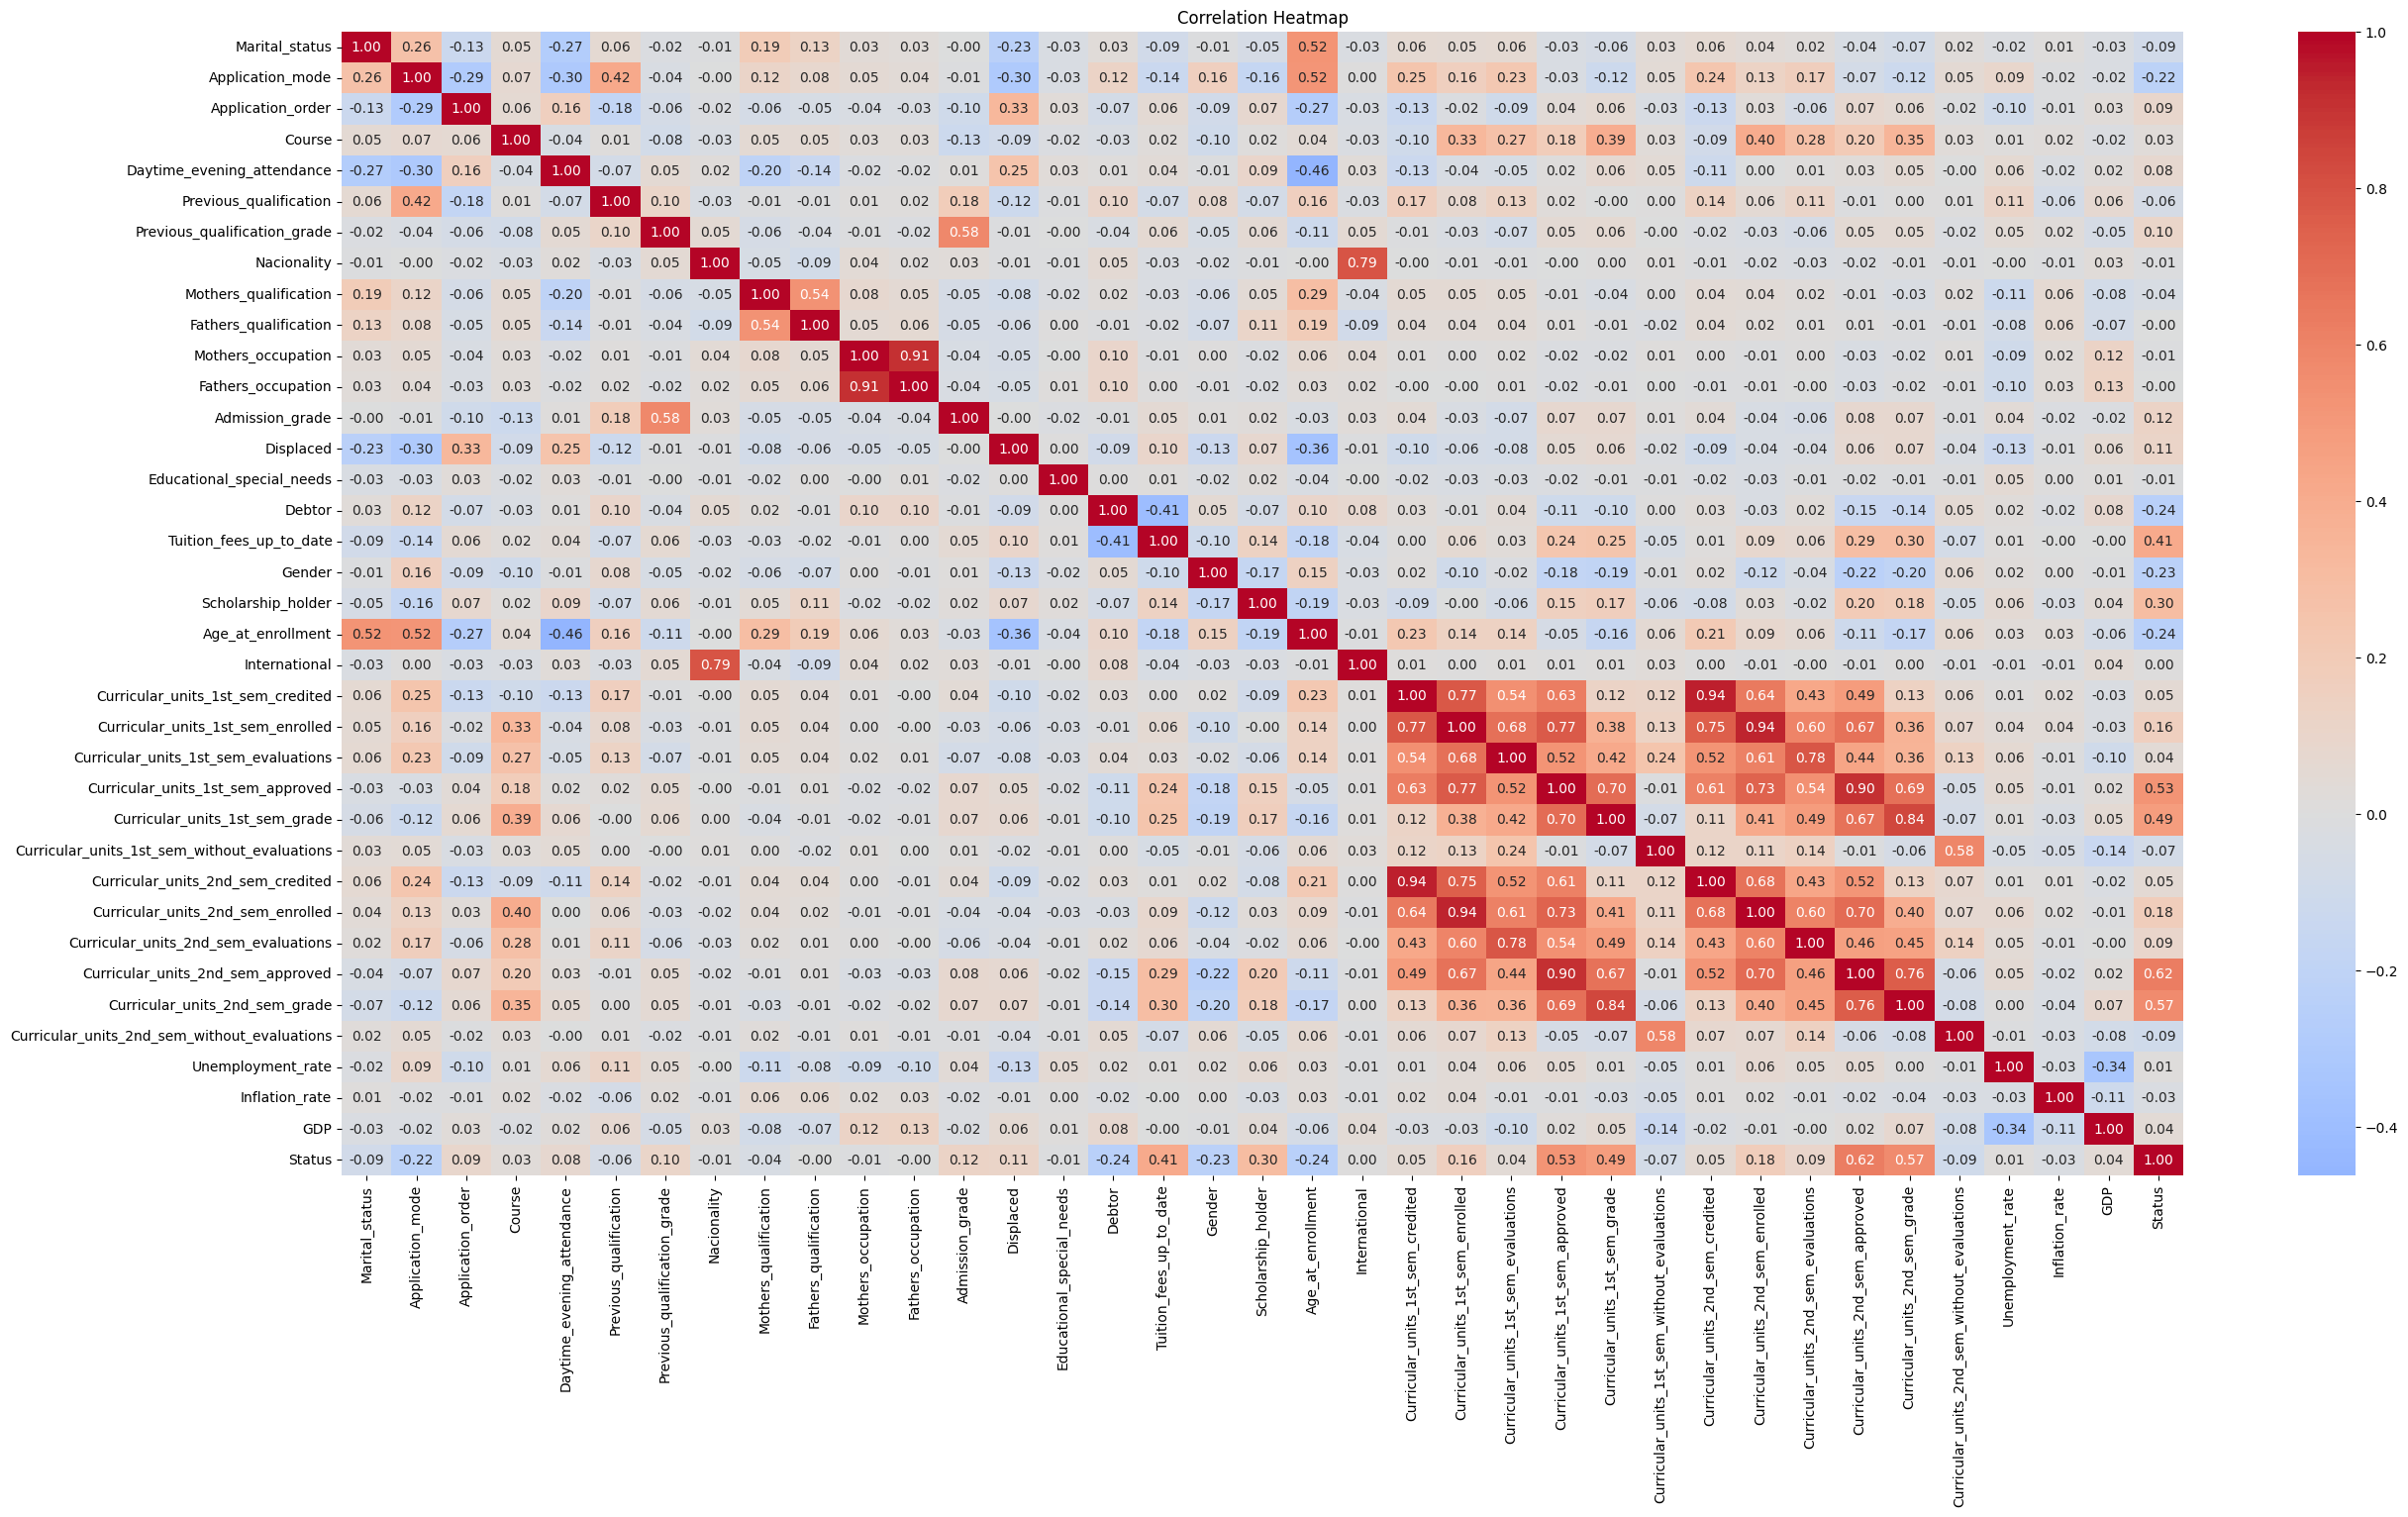

In [50]:
fig, ax = plt.subplots(figsize=(30,15))
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dari grafik korelasi tersebut, didapatkan beberapa features yang memiliki korelasi kuat dengan Status Mahasiswa. Diantaranya adalah :
* Application_mode
* Debtor
* Tuition_fees_up_to_date
* Gender
* Schholarship_holder
* Age_at_enrollment
* Circular_units_1st_sem_approved
* Circular_units_1st_sem_grade
* Circular_units_2nd_sem_approved
* Circular_units_2nd_sem_grade

Selain itu, kita dapatkan bahwa feature circular_unit semuanya memiliki korelasi yang kuat sehingga bisa kita reduksi menggunakan fungsi PCA

### Mengubah Values Pada Data Menjadi Representasinya

In [51]:
data['Marital_status'] = data['Marital_status'].map({1:'single',
                                                     2:'married',
                                                     3:'widower',
                                                     4:'divorced',
                                                     5:'facto union',
                                                     6:'legally separated'})

data['Application_mode'] = data['Application_mode'].map({1:'1st phase - general contingent',
                                                         2:'Ordinance No. 612/93',
                                                         5:'1st phase - special contingent (Azores Island)',
                                                         7:'Holders of other higher courses',
                                                         10:'Ordinance No. 854-B/99',
                                                         15:'International student (bachelor)',
                                                         16:'1st phase - special contingent (Madeira Island)',
                                                         17:'2nd phase - general contingent',
                                                         18:'3rd phase - general contingent',
                                                         26:'Ordinance No. 533-A/99, item b2) (Different Plan)',
                                                         27:'Ordinance No. 533-A/99, item b3 (Other Institution)',
                                                         39:'Over 23 years old',
                                                         42:'Transfer',
                                                         43:'Change of Course',
                                                         44:'Technological specialization diploma holders',
                                                         51:'Change of institution/course',
                                                         53:'Short cycle diploma holders',
                                                         57:'Change of institution/course (International)'})



data['Course'] = data['Course'].map({33:'Biofuel Production Technologies',
                                     171:'Animation and Multimedia Design',
                                     8014:'Social Service (evening attendance)',
                                     9003:'Agronomy',
                                     9070:'Communication Design',
                                     9085:'Veterinary Nursing ',
                                     9119:' Informatics Engineering',
                                     9130:'Equinculture',
                                     9147:'Management',
                                     9238:'Social Service',
                                     9254:'Tourism',
                                     9500:'Nursing',
                                     9556:'Oral Hygiene',
                                     9670:'Advertising and Marketing Management',
                                     9773:'Journalism and Communication',
                                     9853:'Basic Education',
                                     9991:'Management (evening attendance)'})

data['Daytime_evening_attendance'] = data['Daytime_evening_attendance'].map({1:'Daytime',
                                                                            0:'Evening'})

for feature in ['Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']:
    data[feature] = data[feature].map({1:'Yes',
                                           0:'No'})
data['Gender'] = data['Gender'].map({1:'Male',
                                    0:'Female'})

data['Status'] = data['Status'].map({0:'Dropout',
                                       1:'Enrolled',
                                       2:'Graduate'})

### Visualisasikan Data

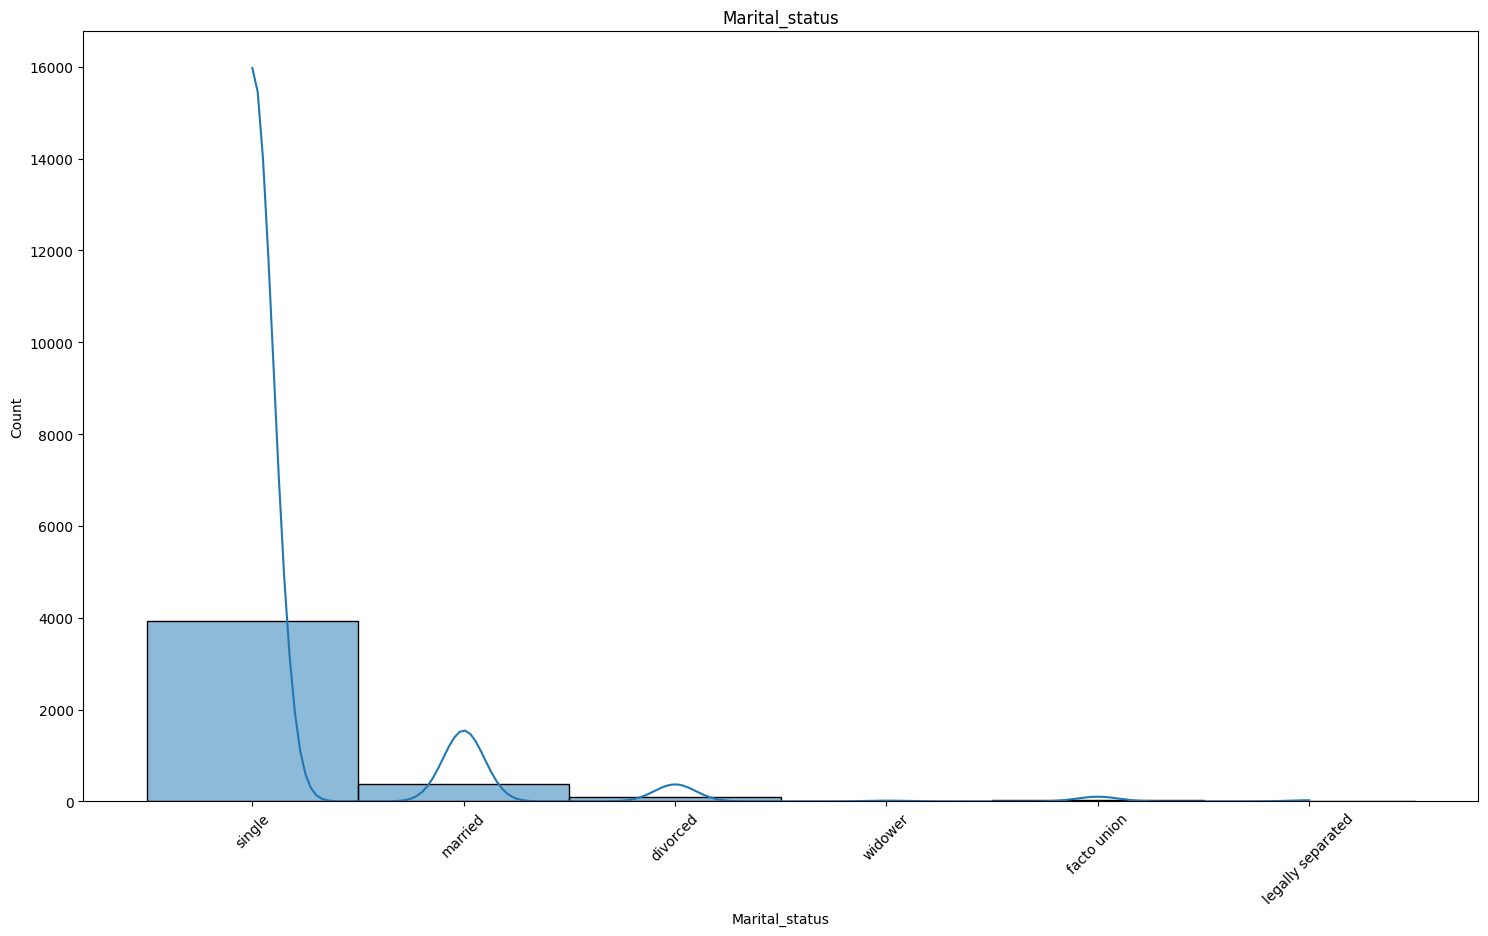

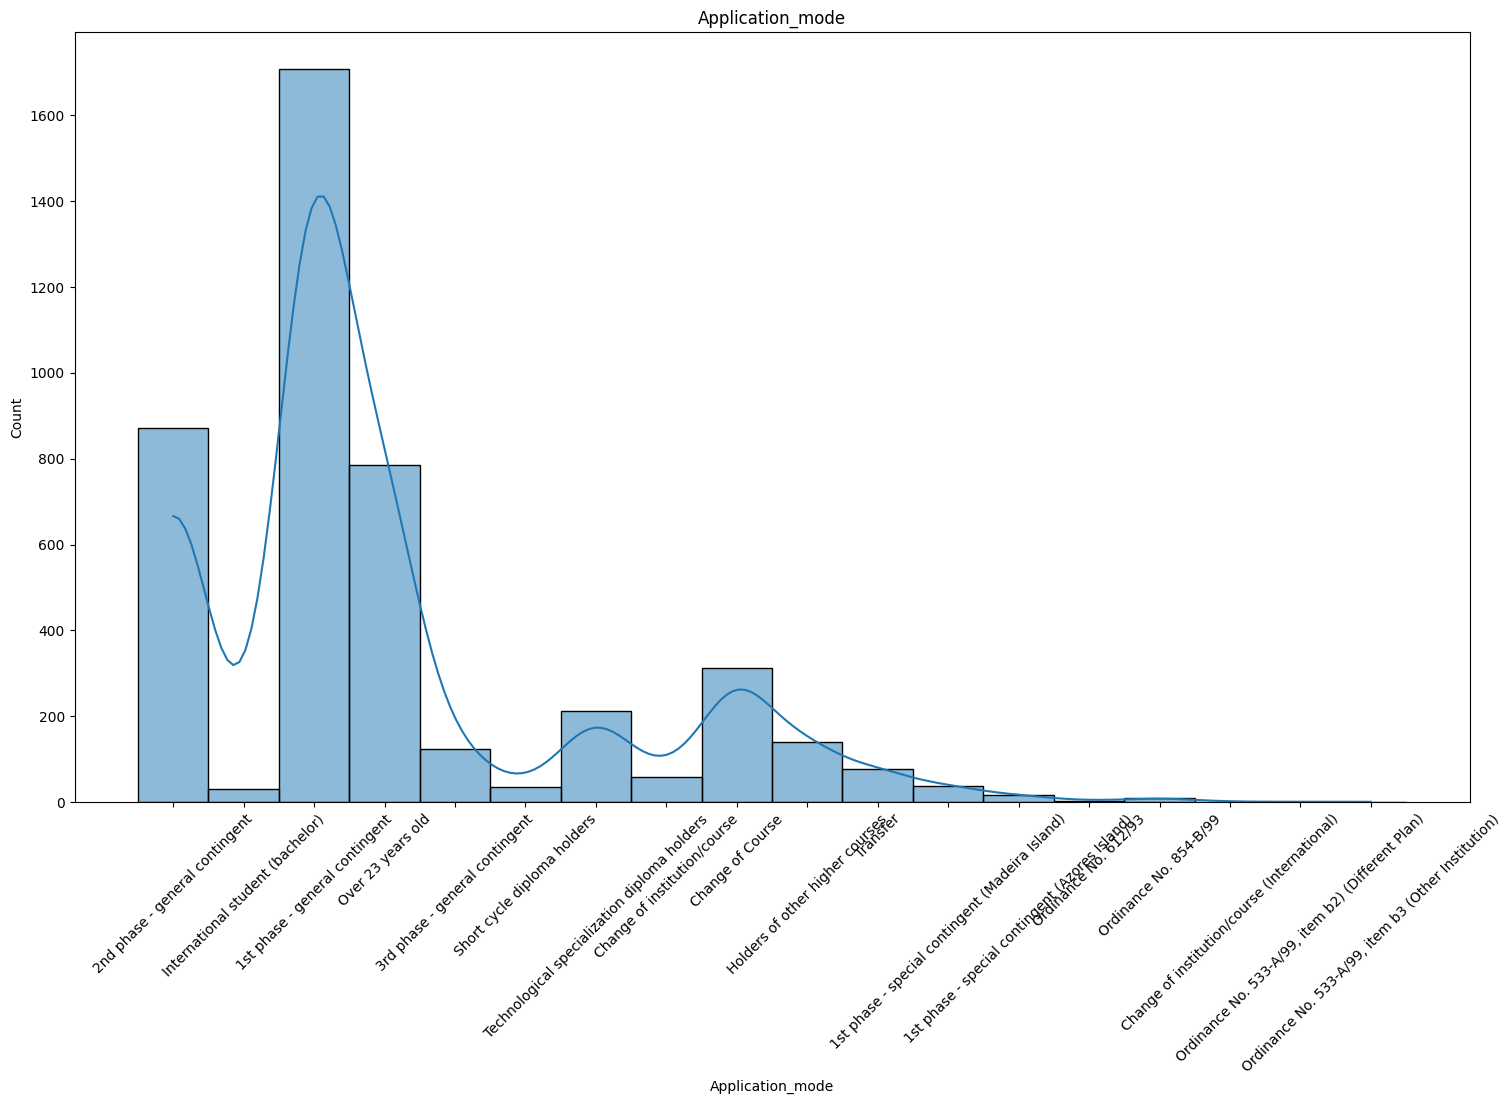

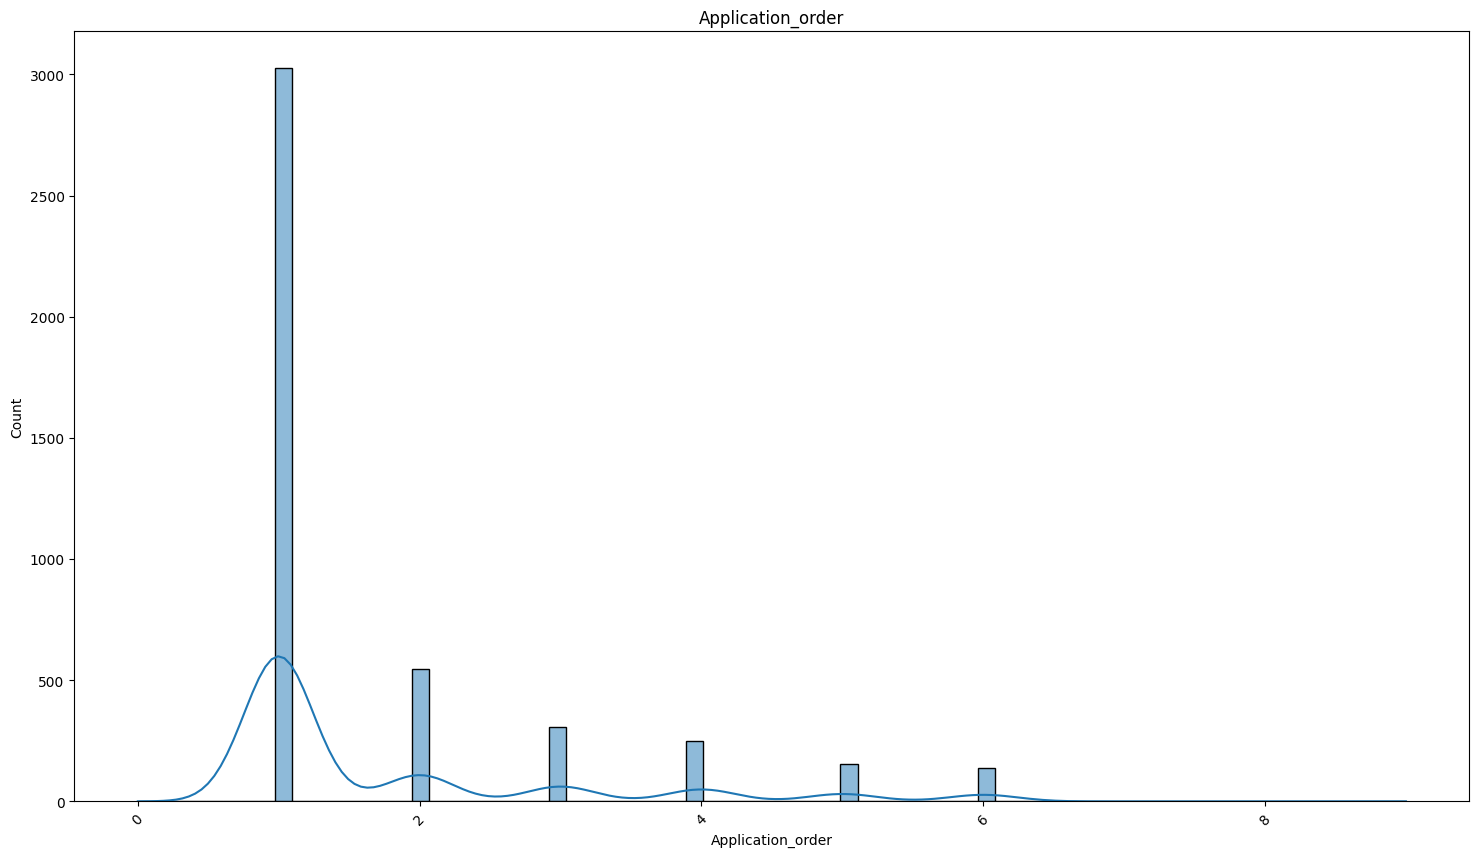

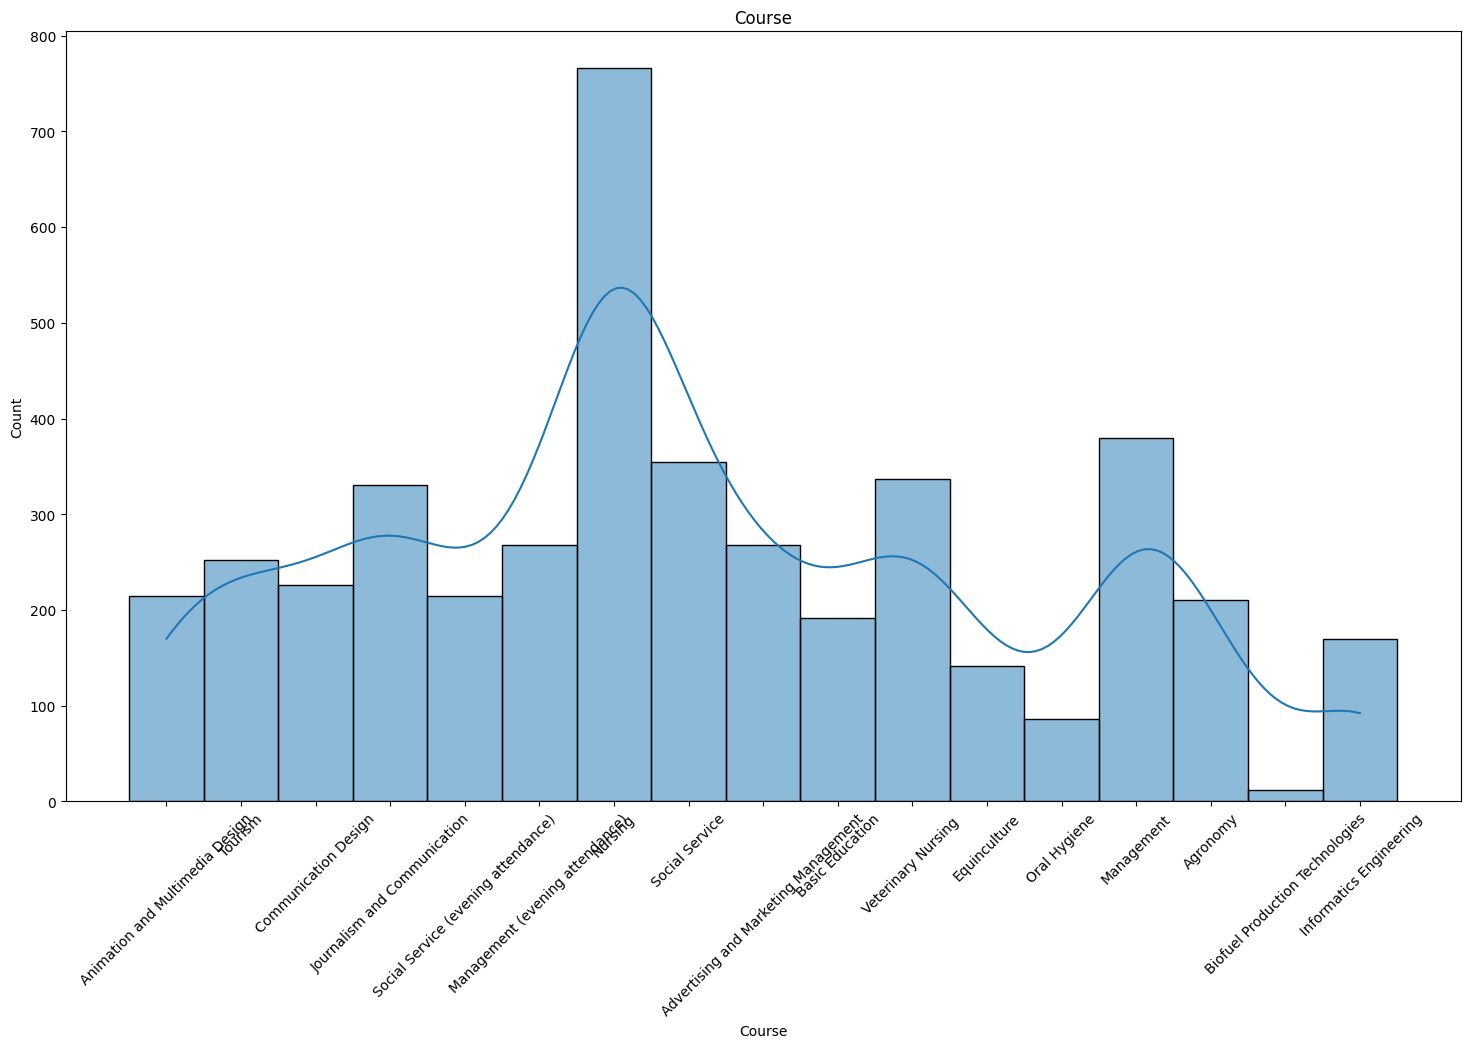

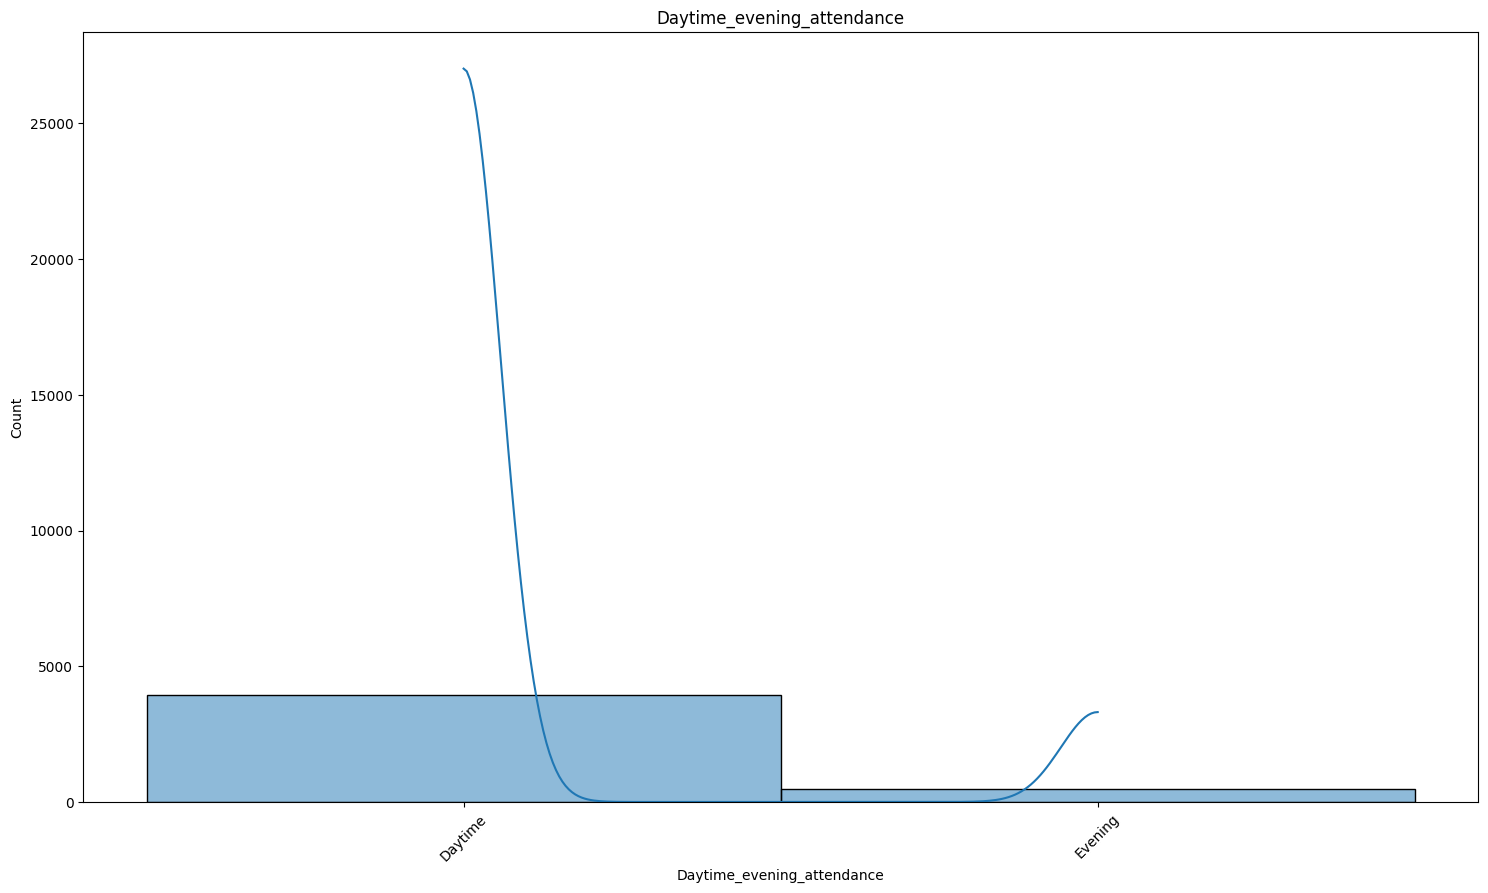

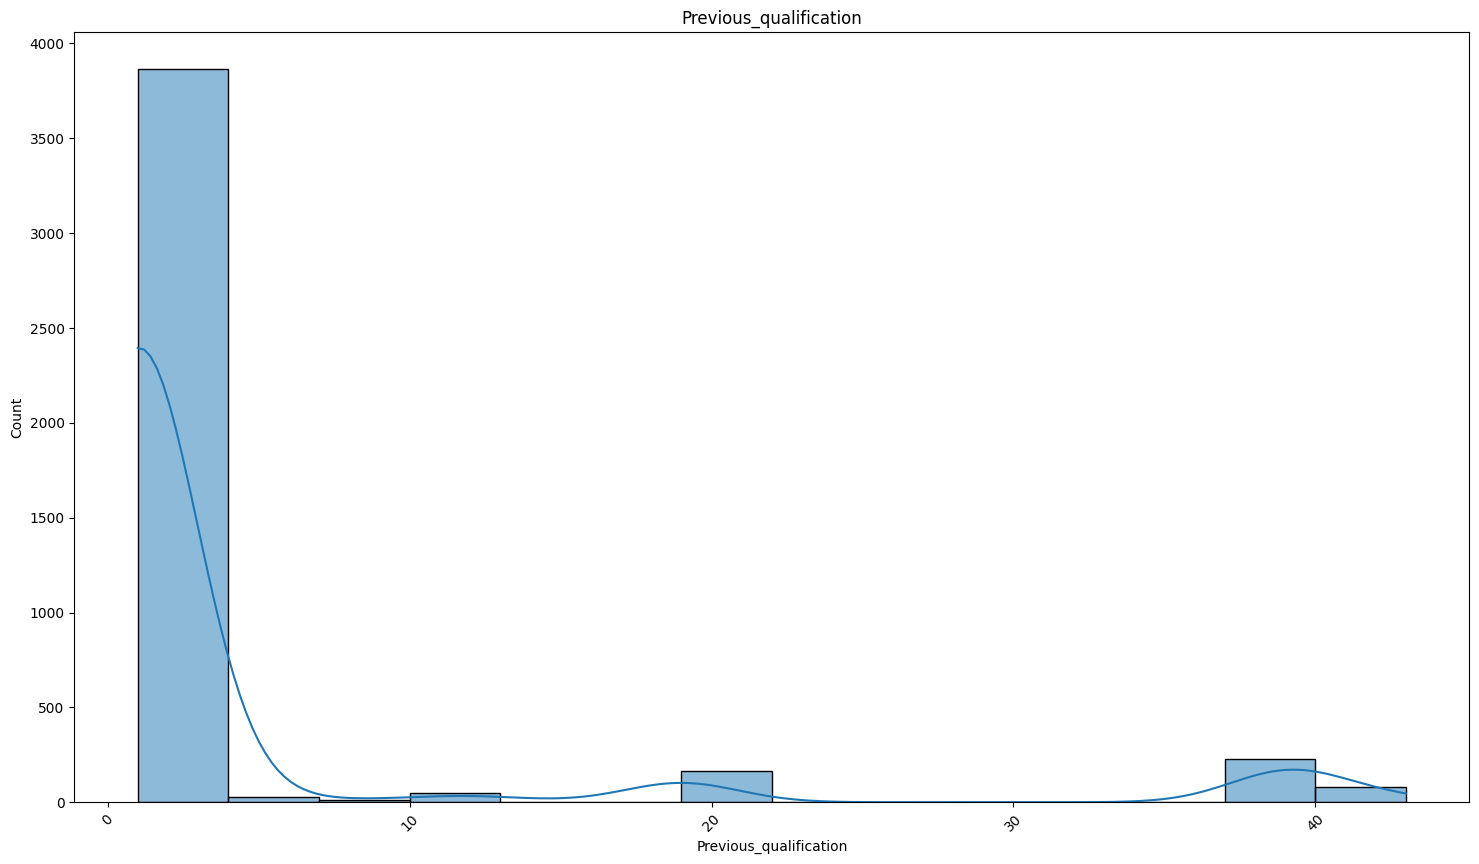

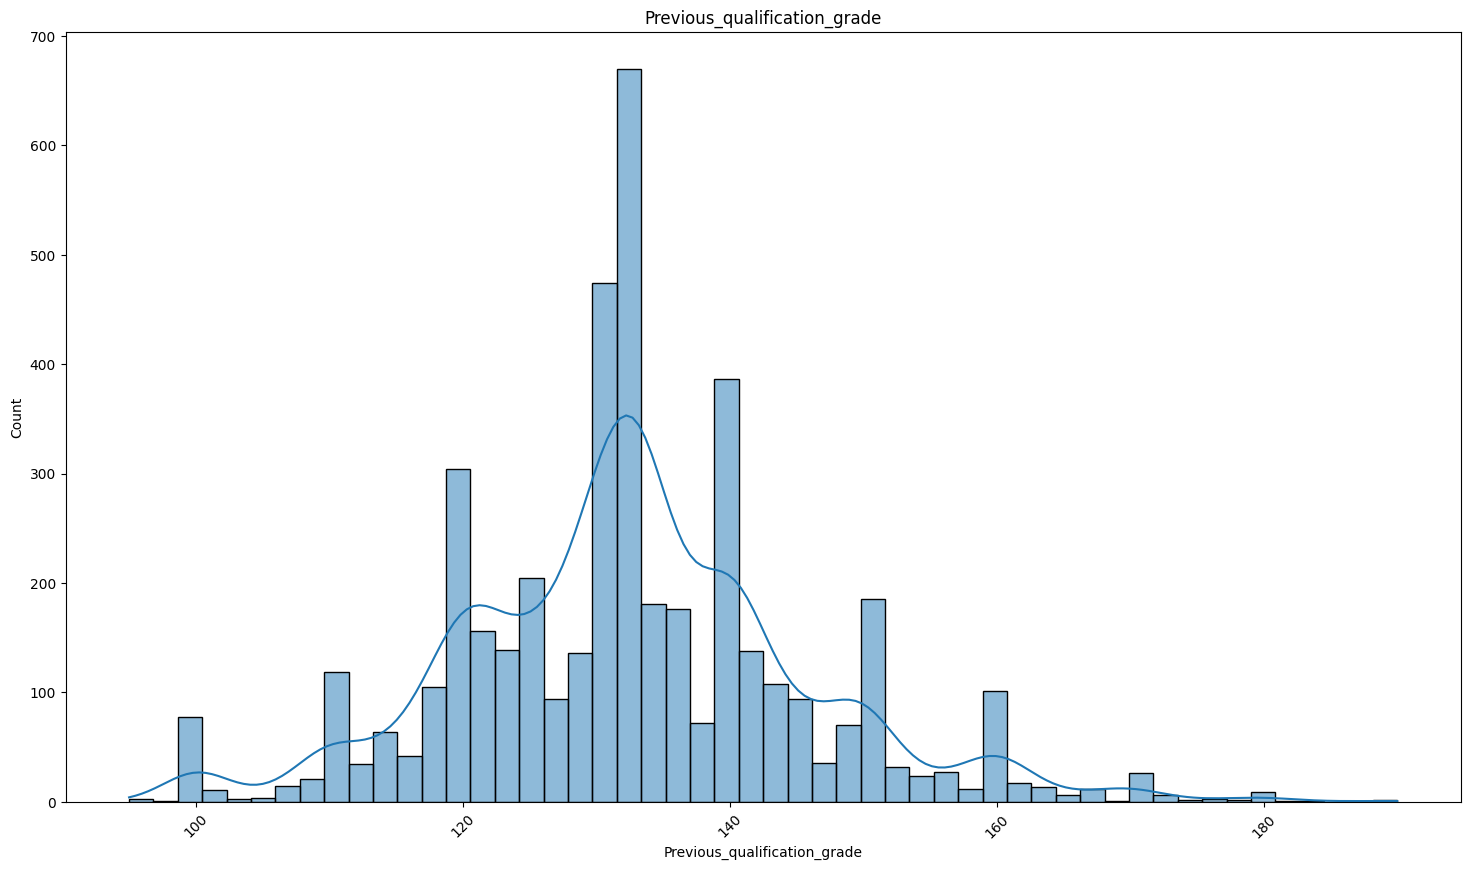

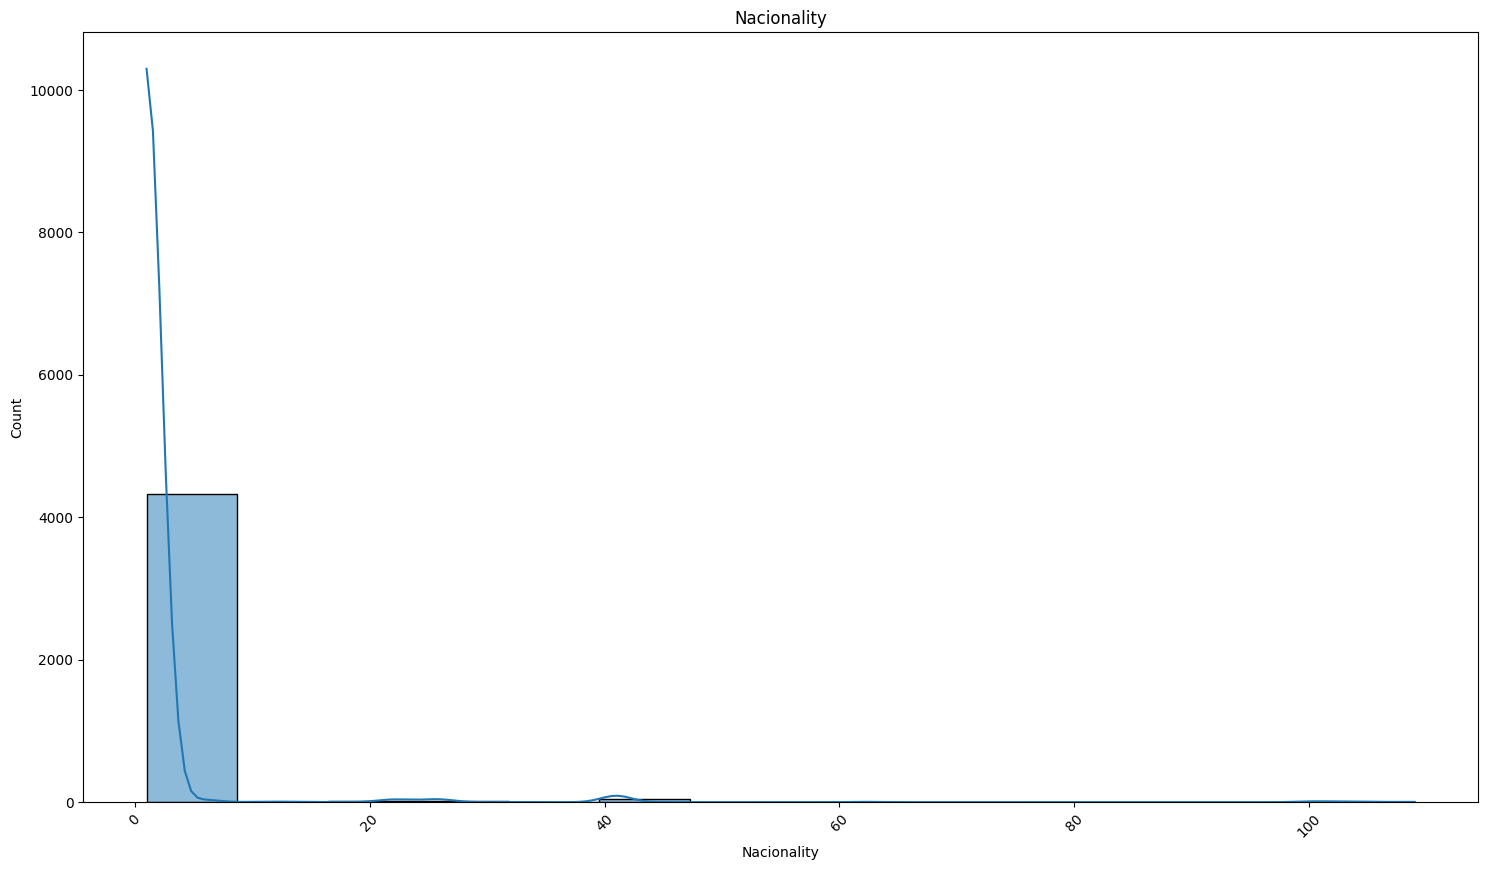

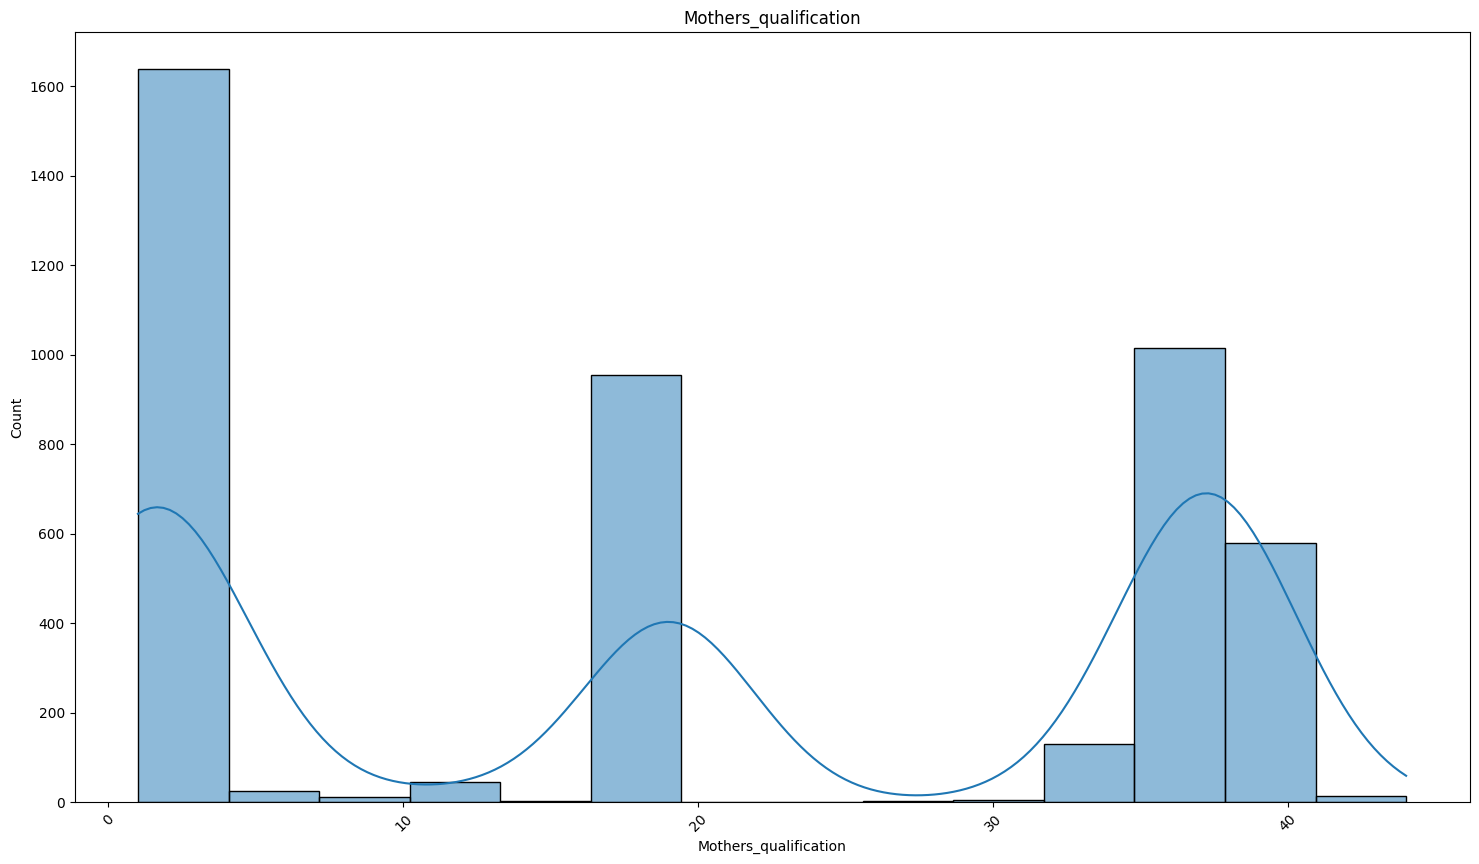

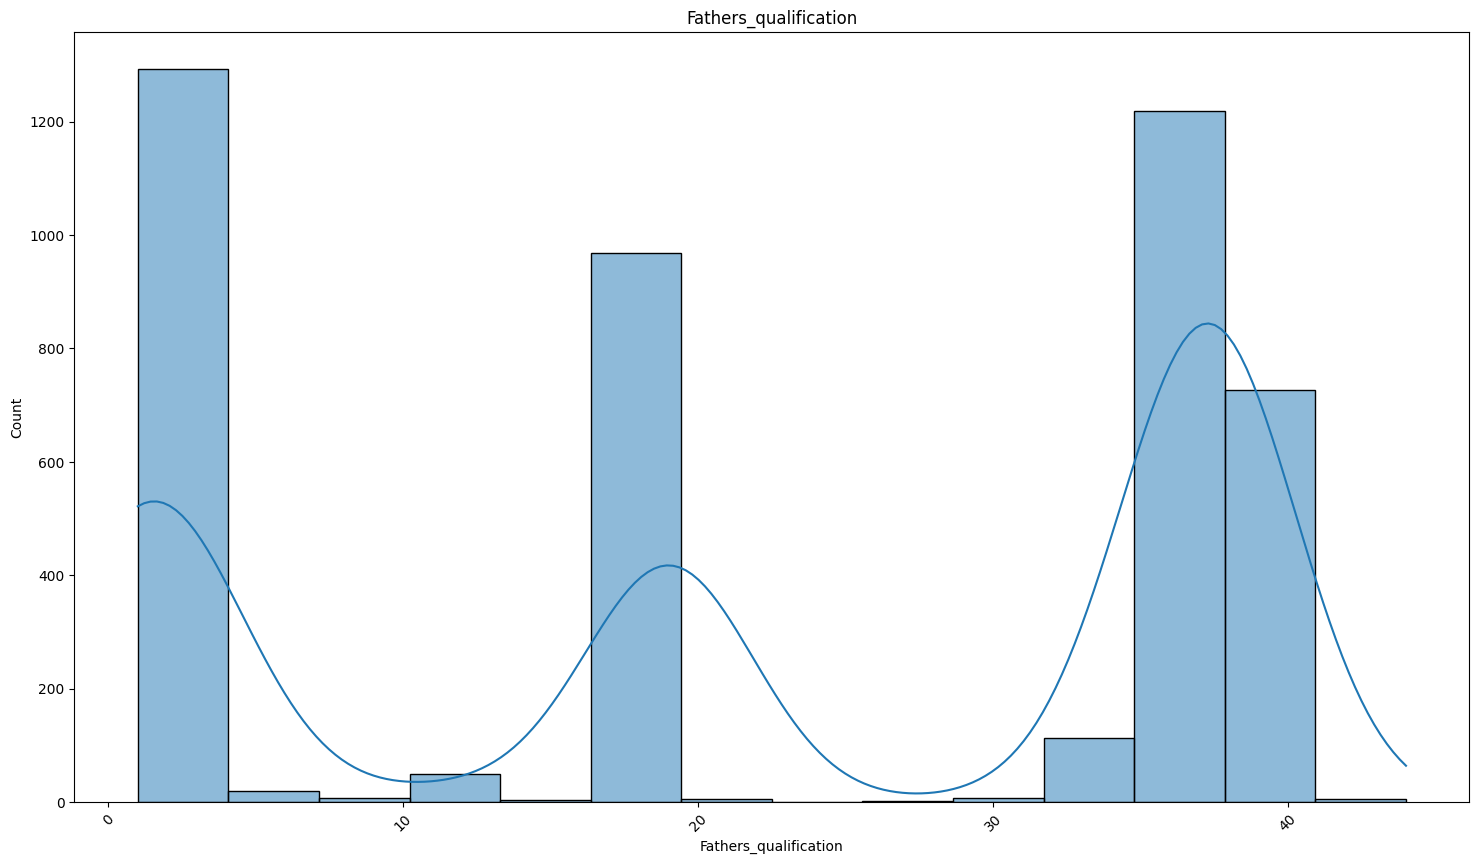

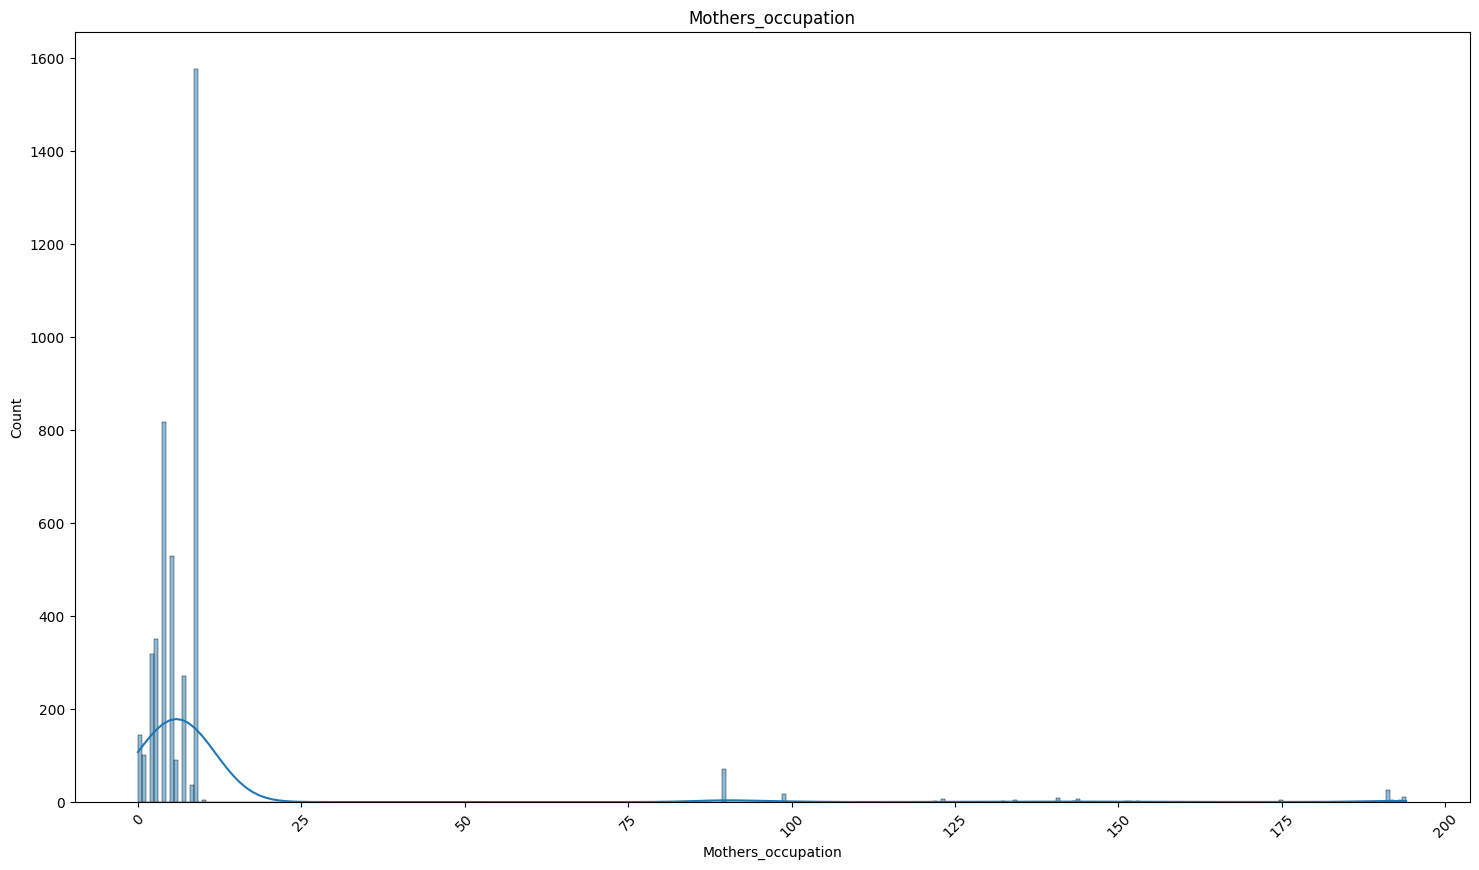

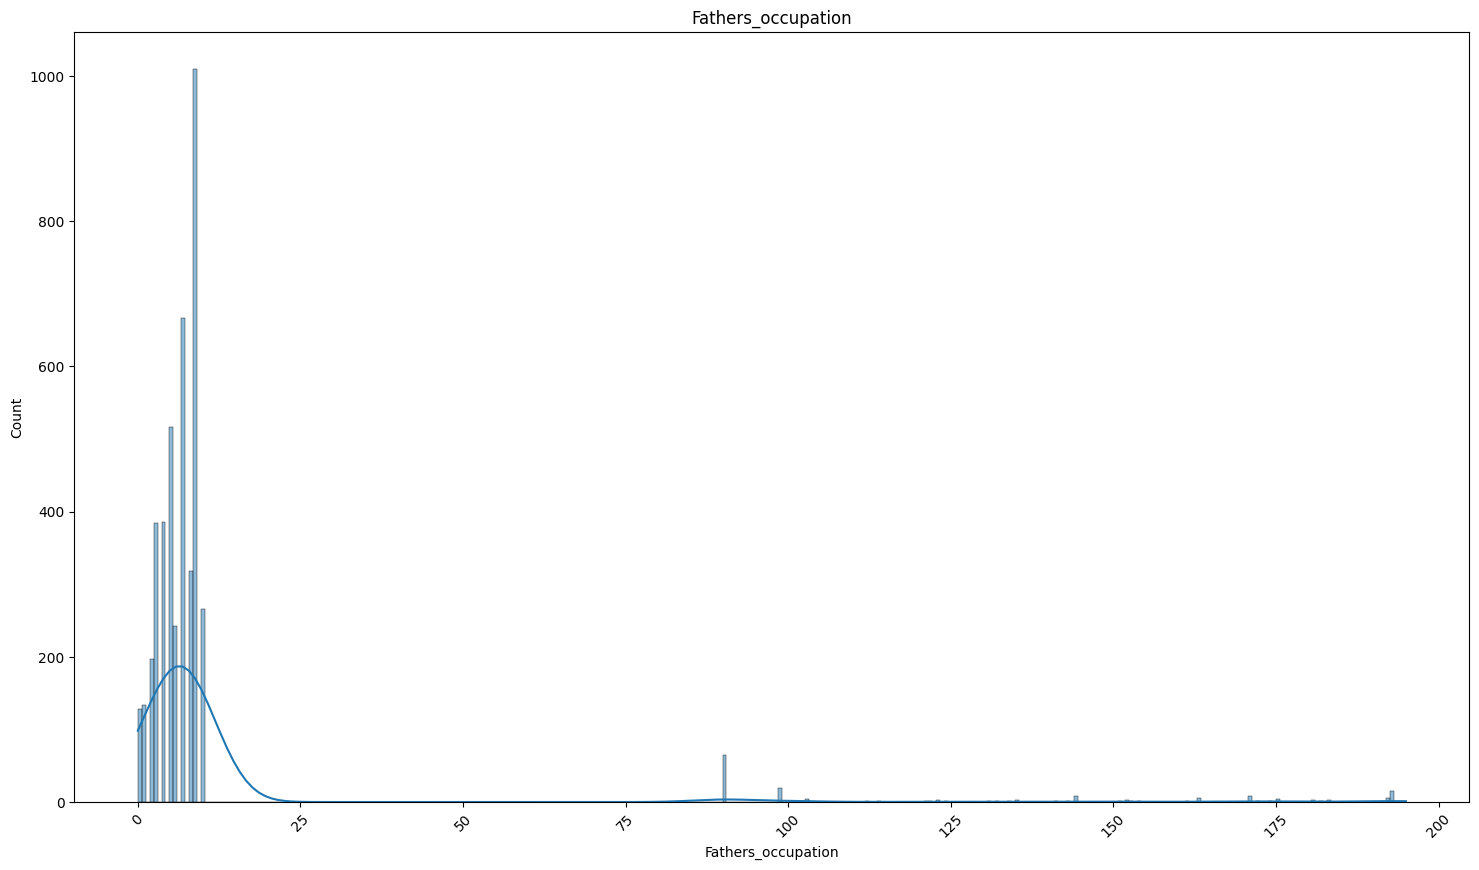

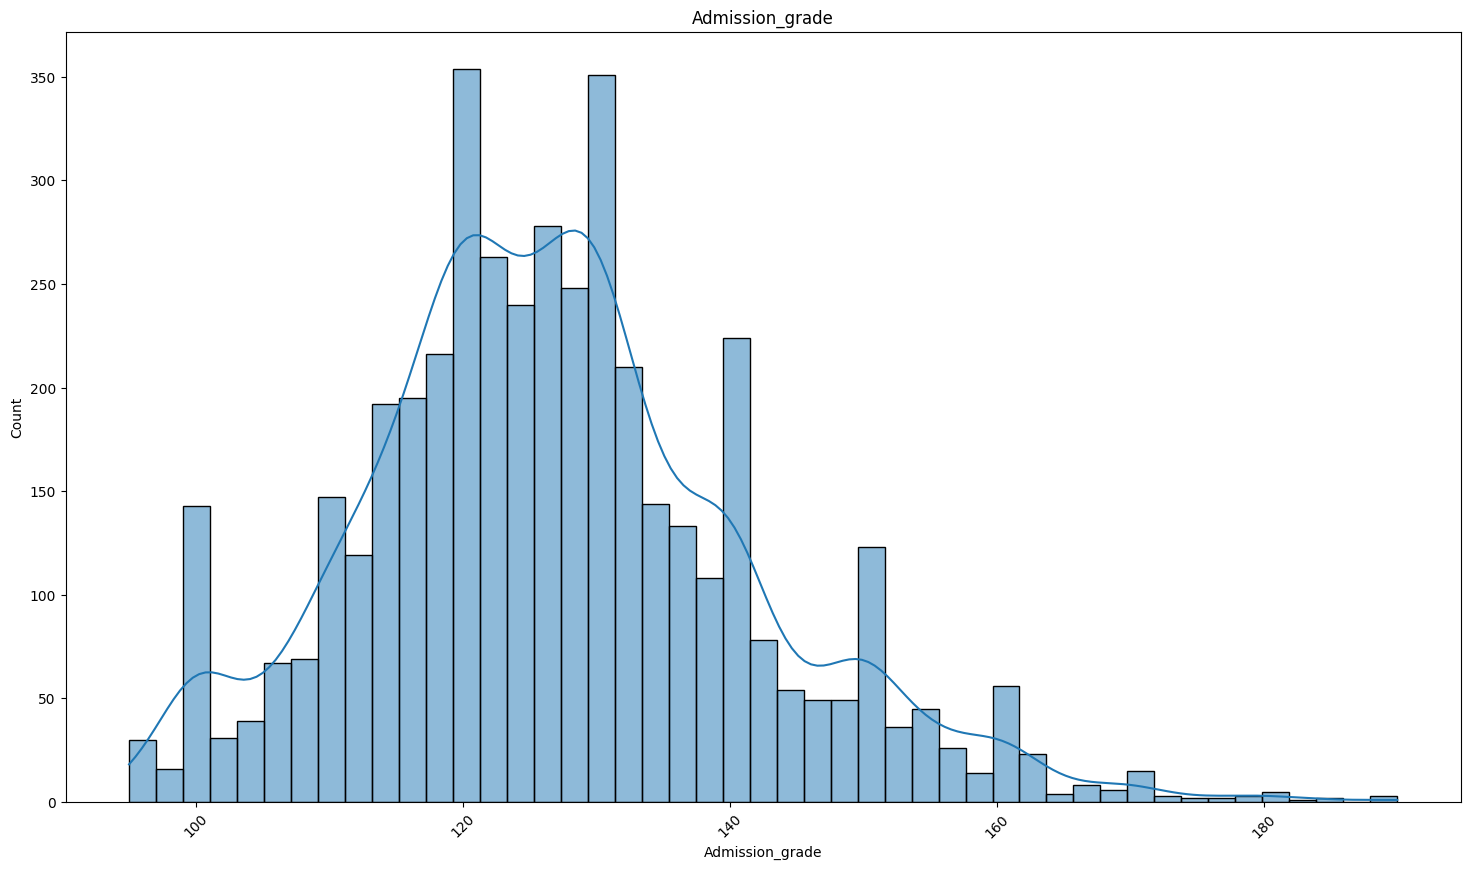

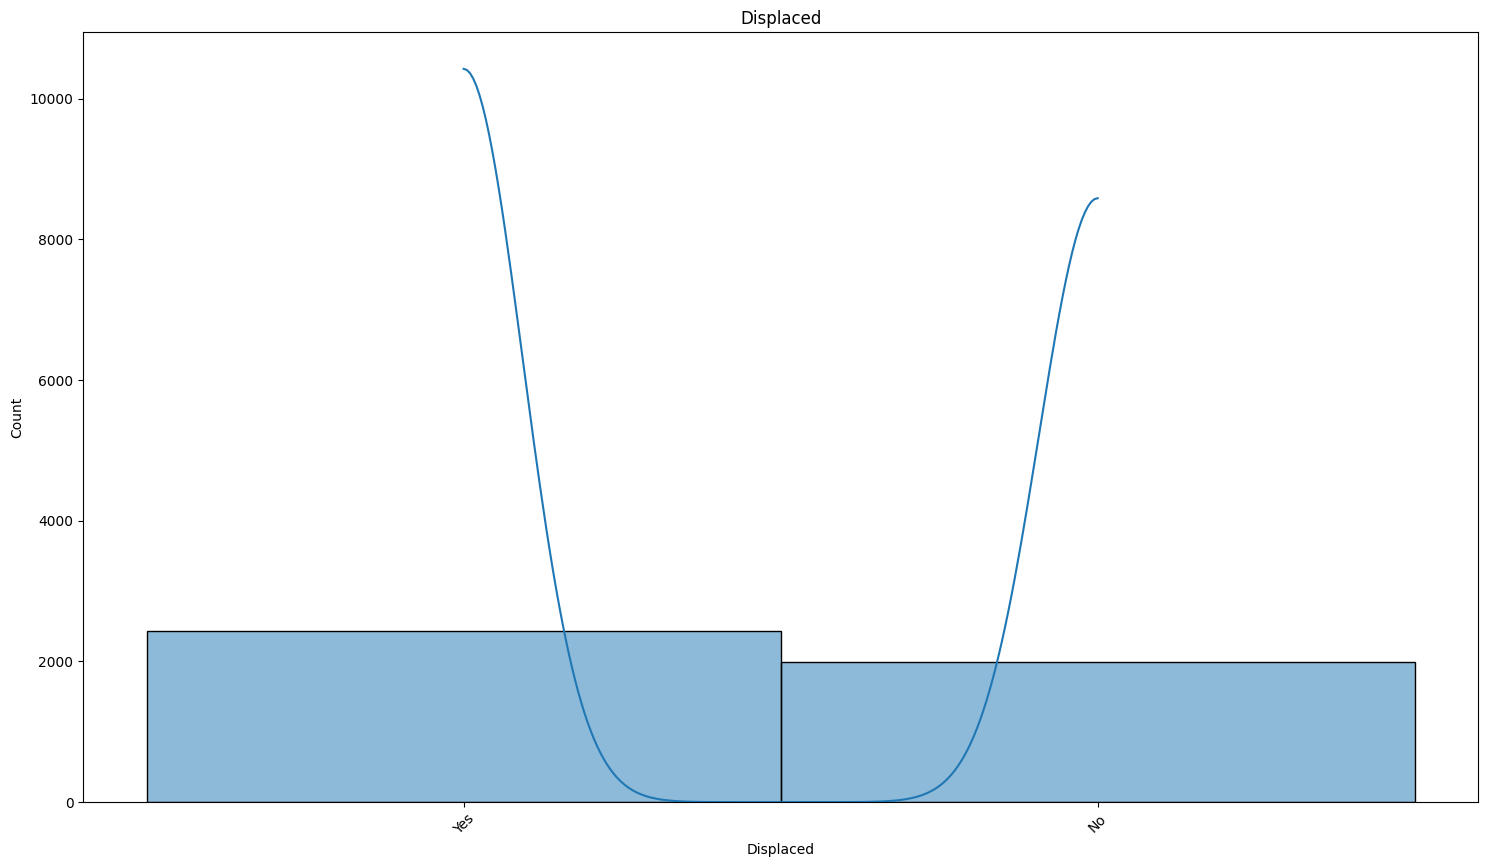

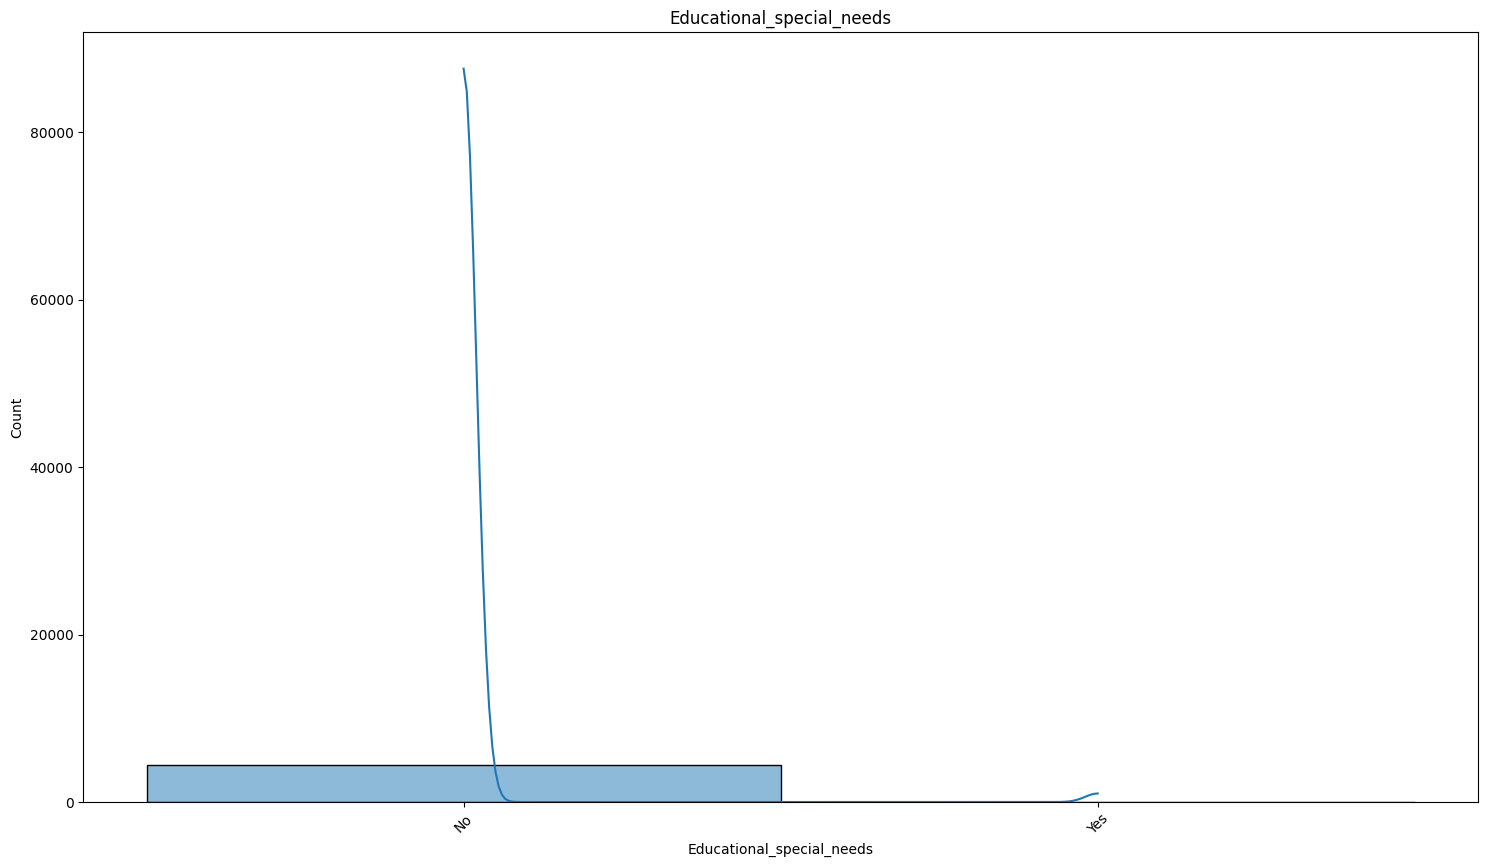

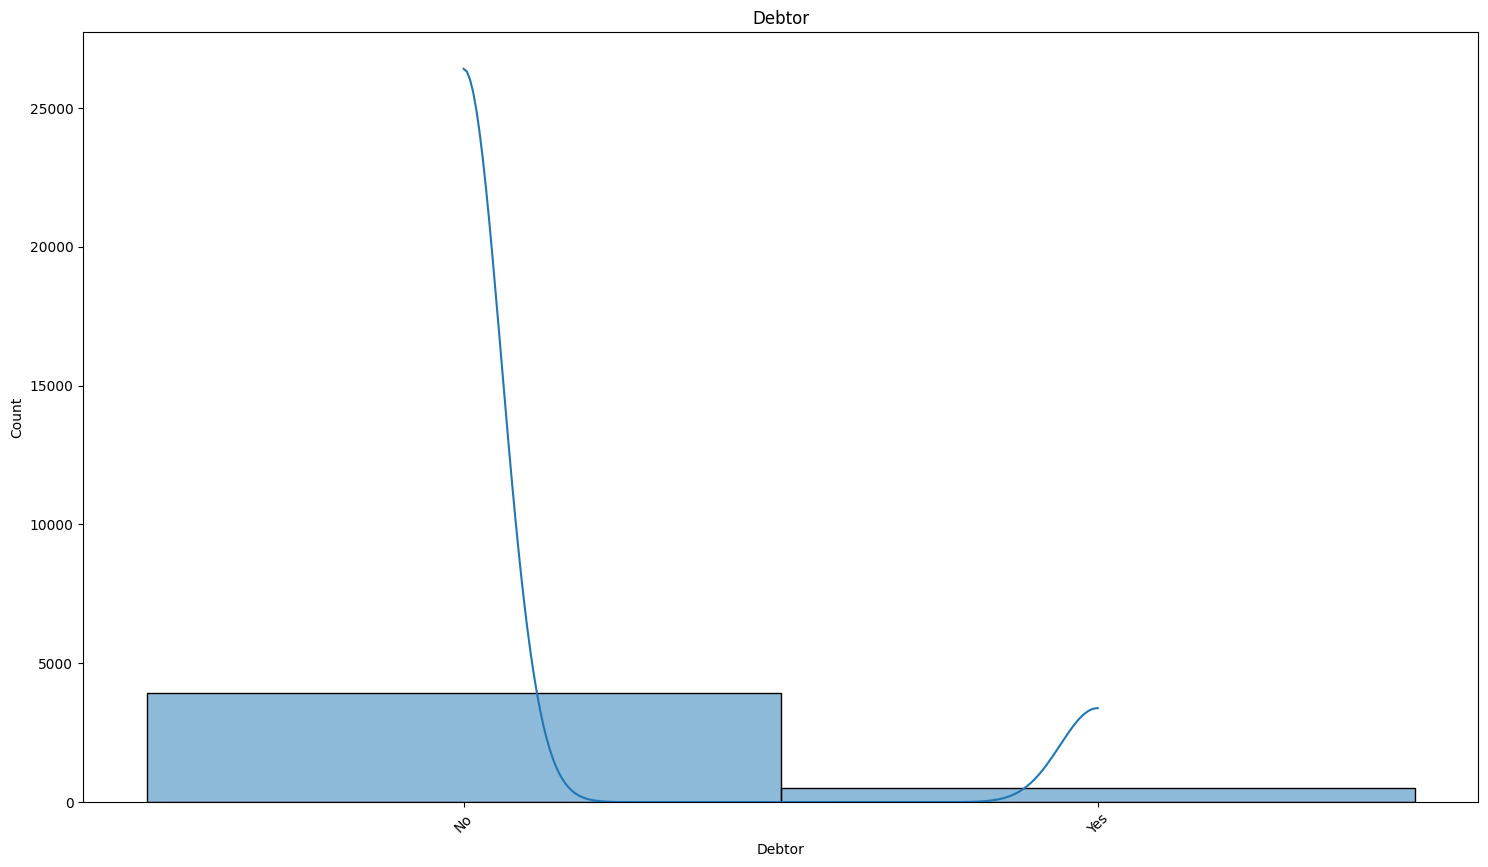

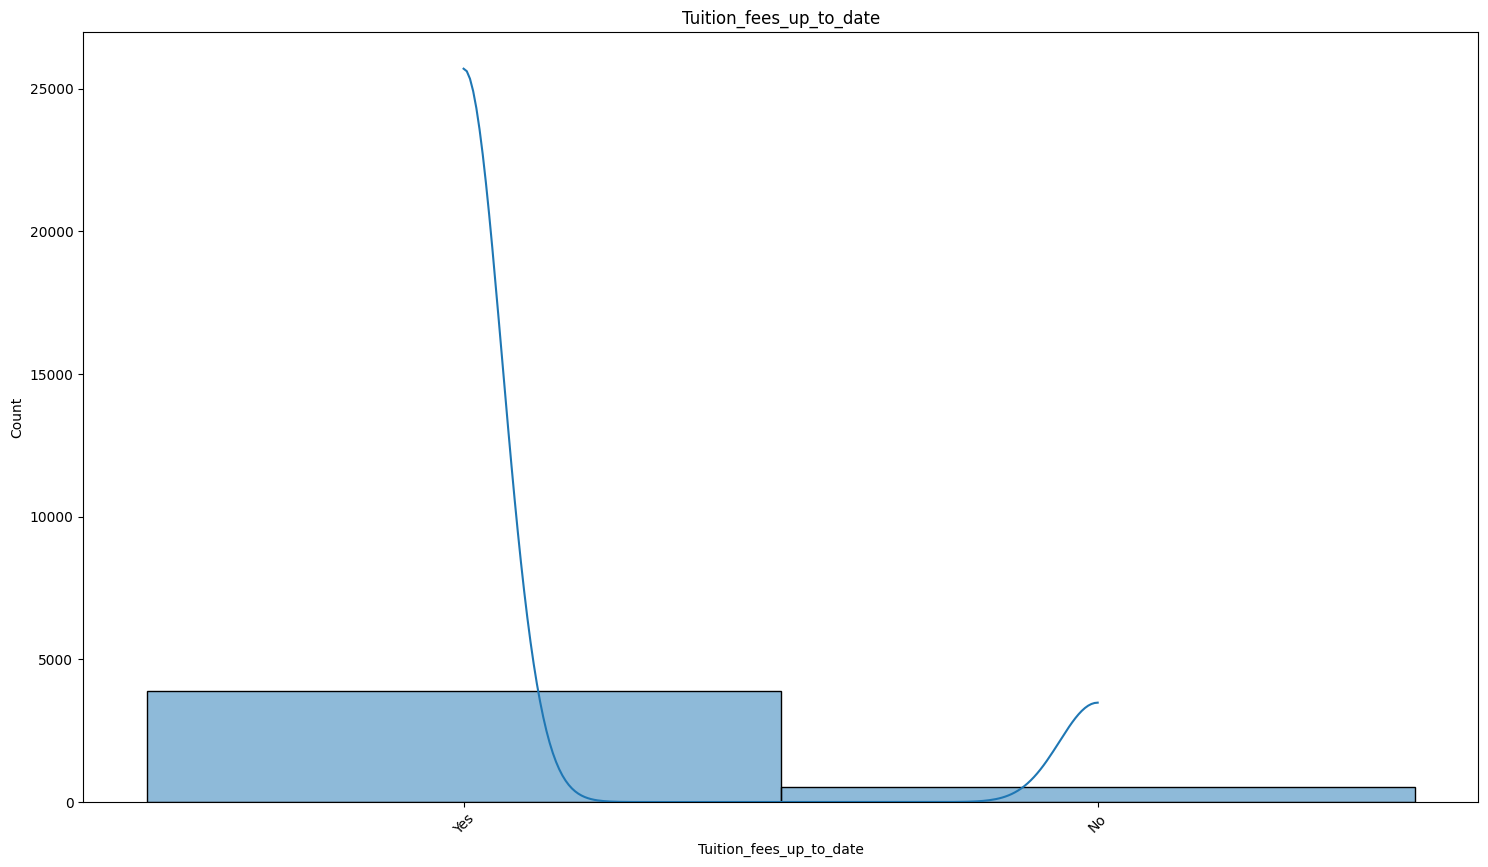

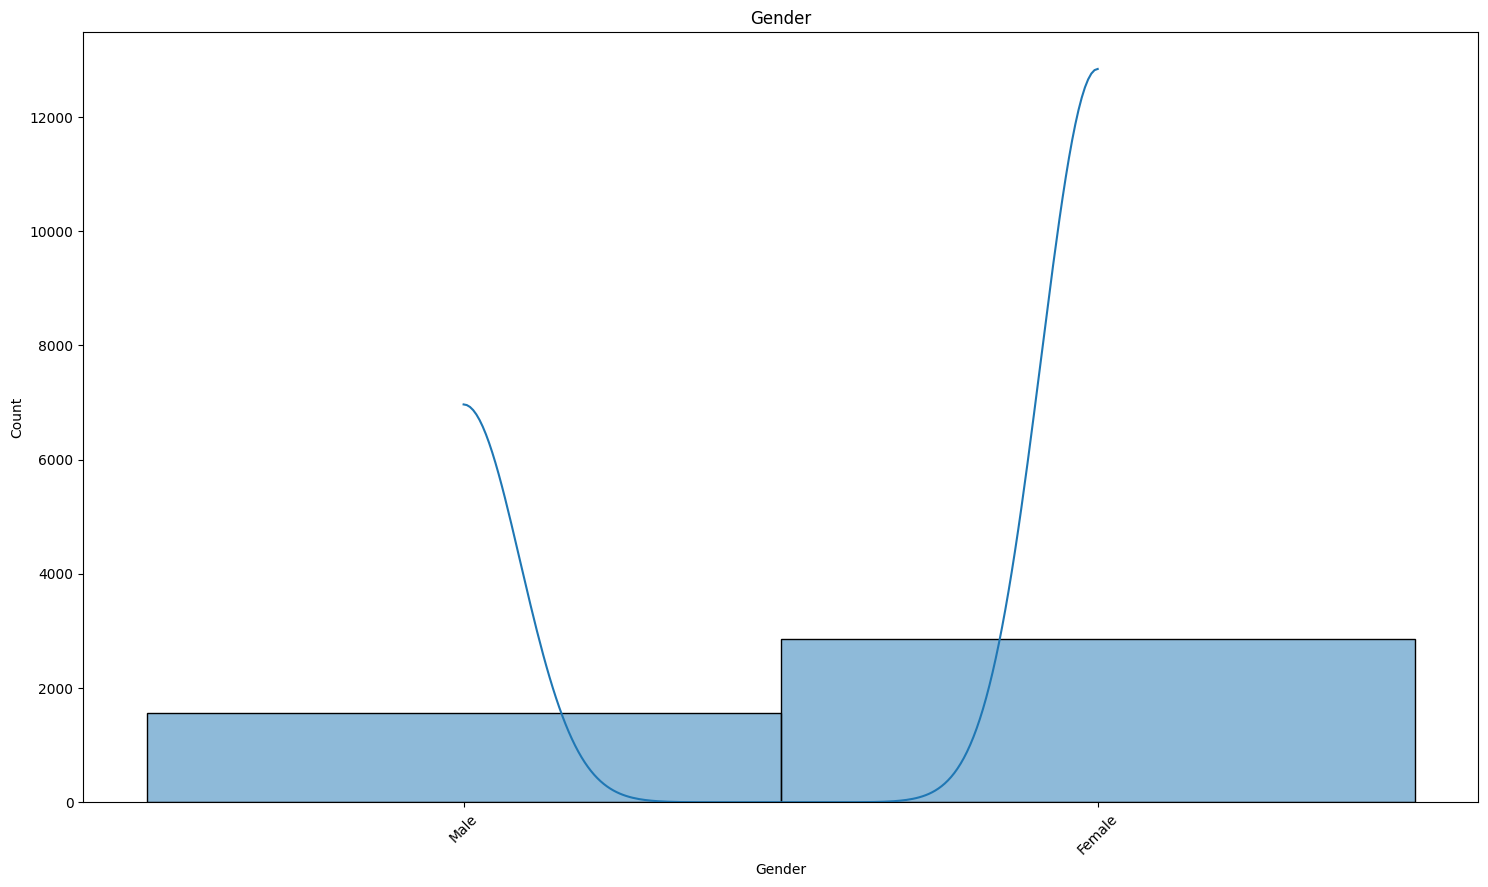

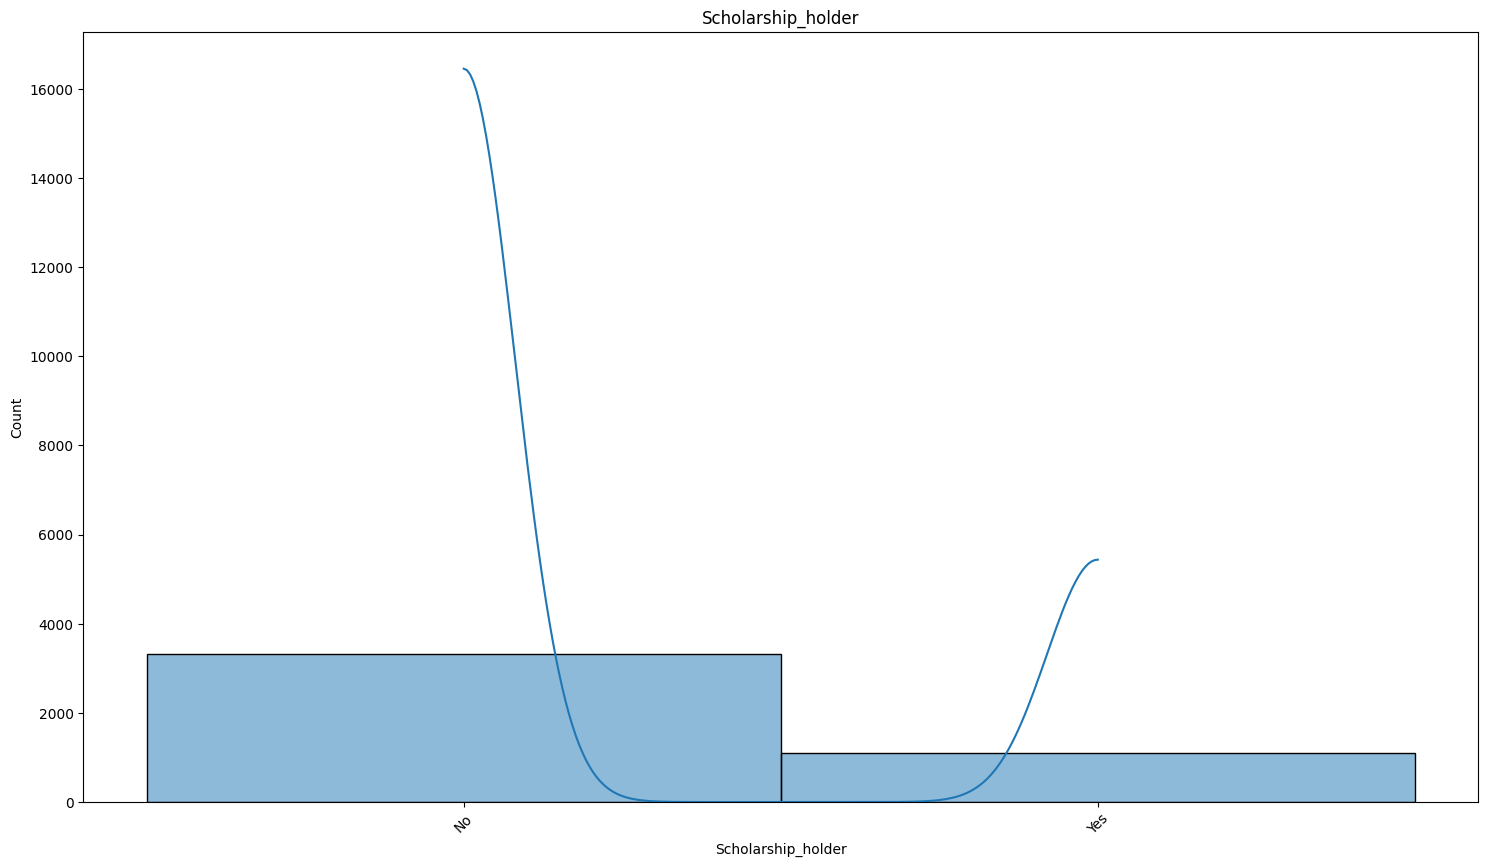

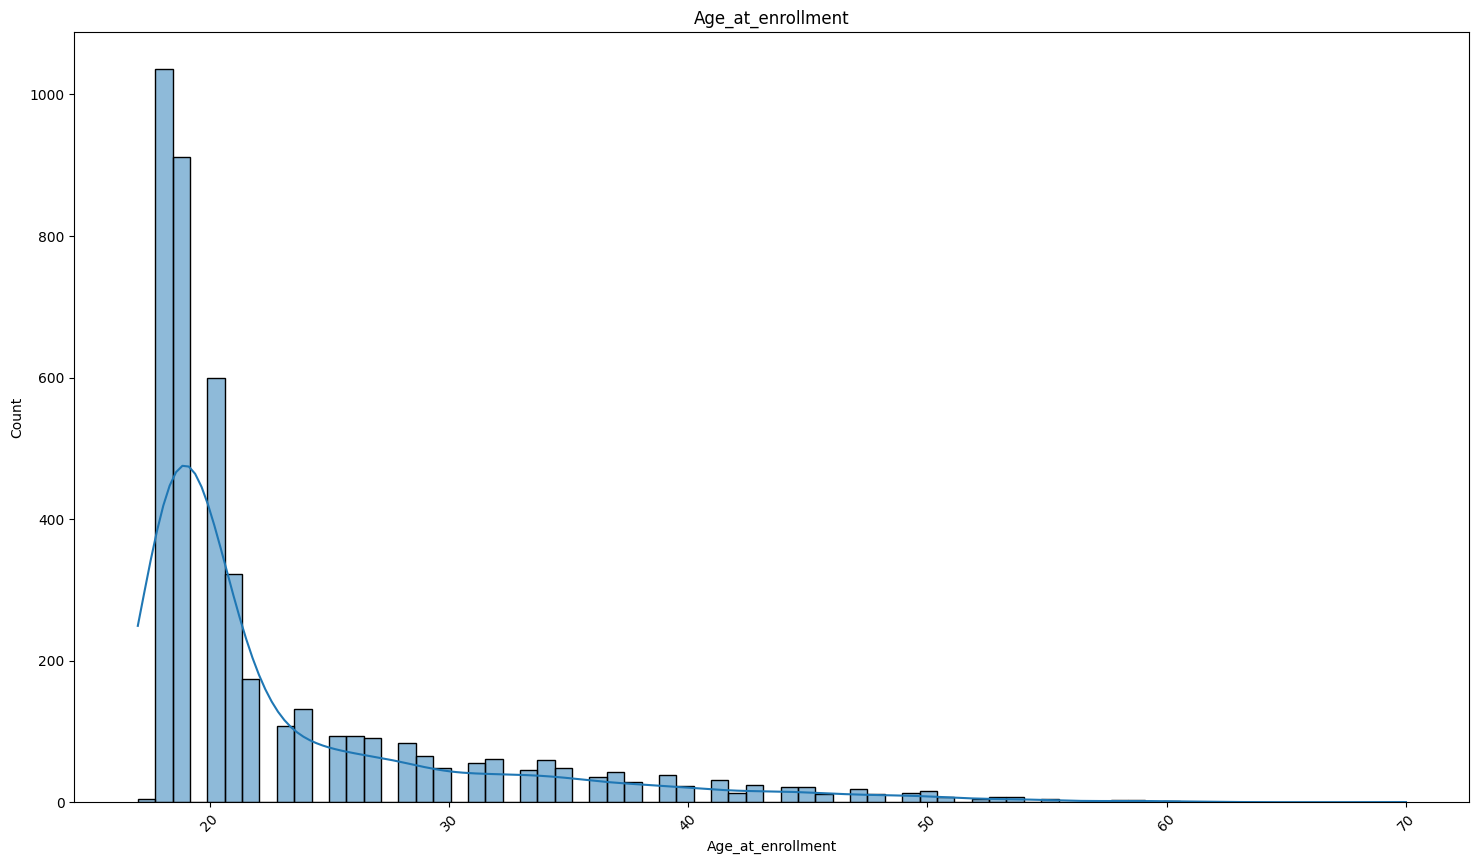

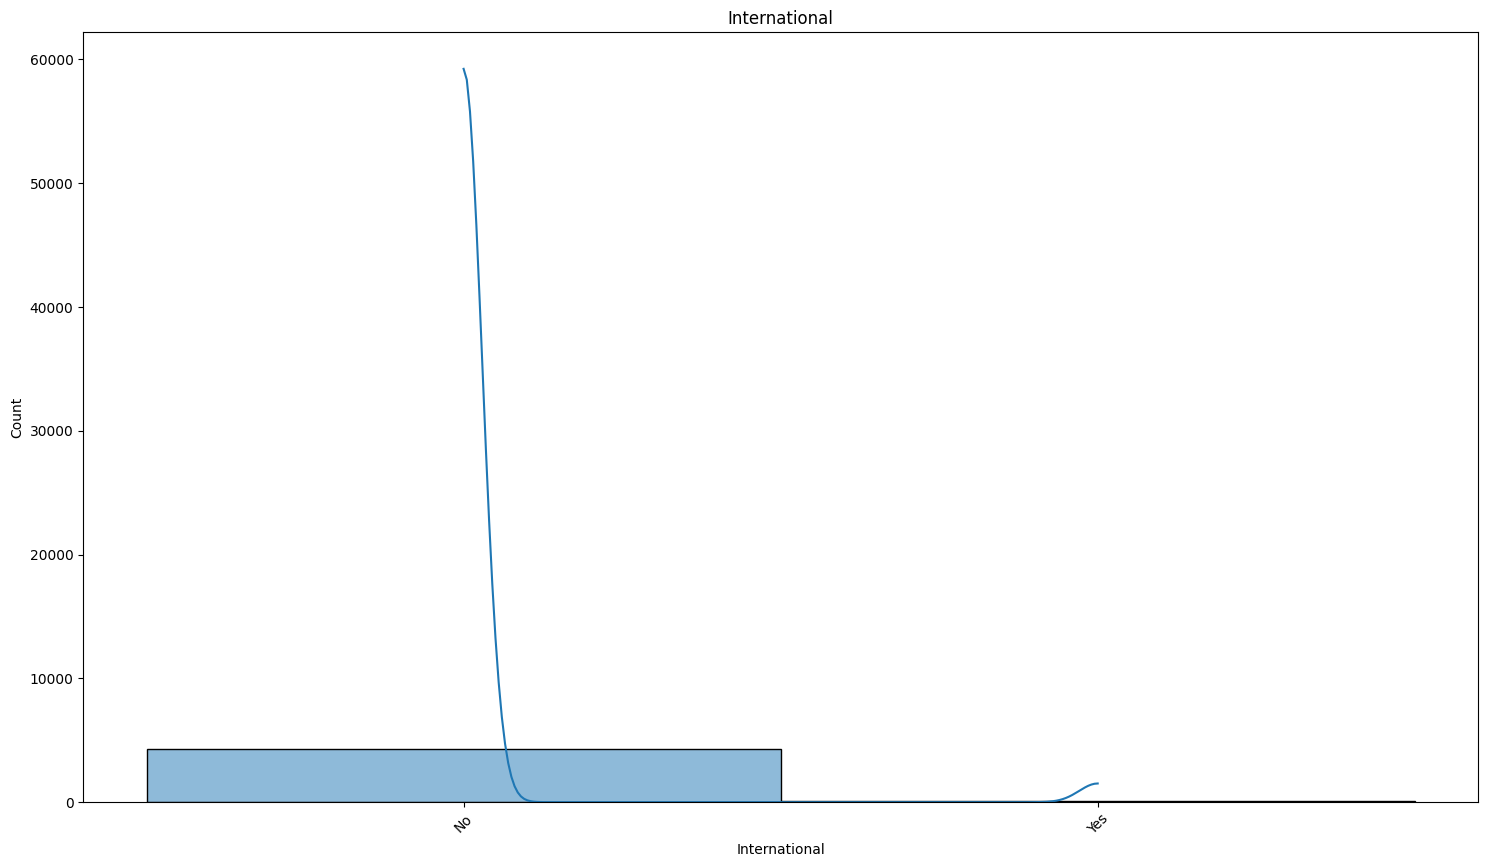

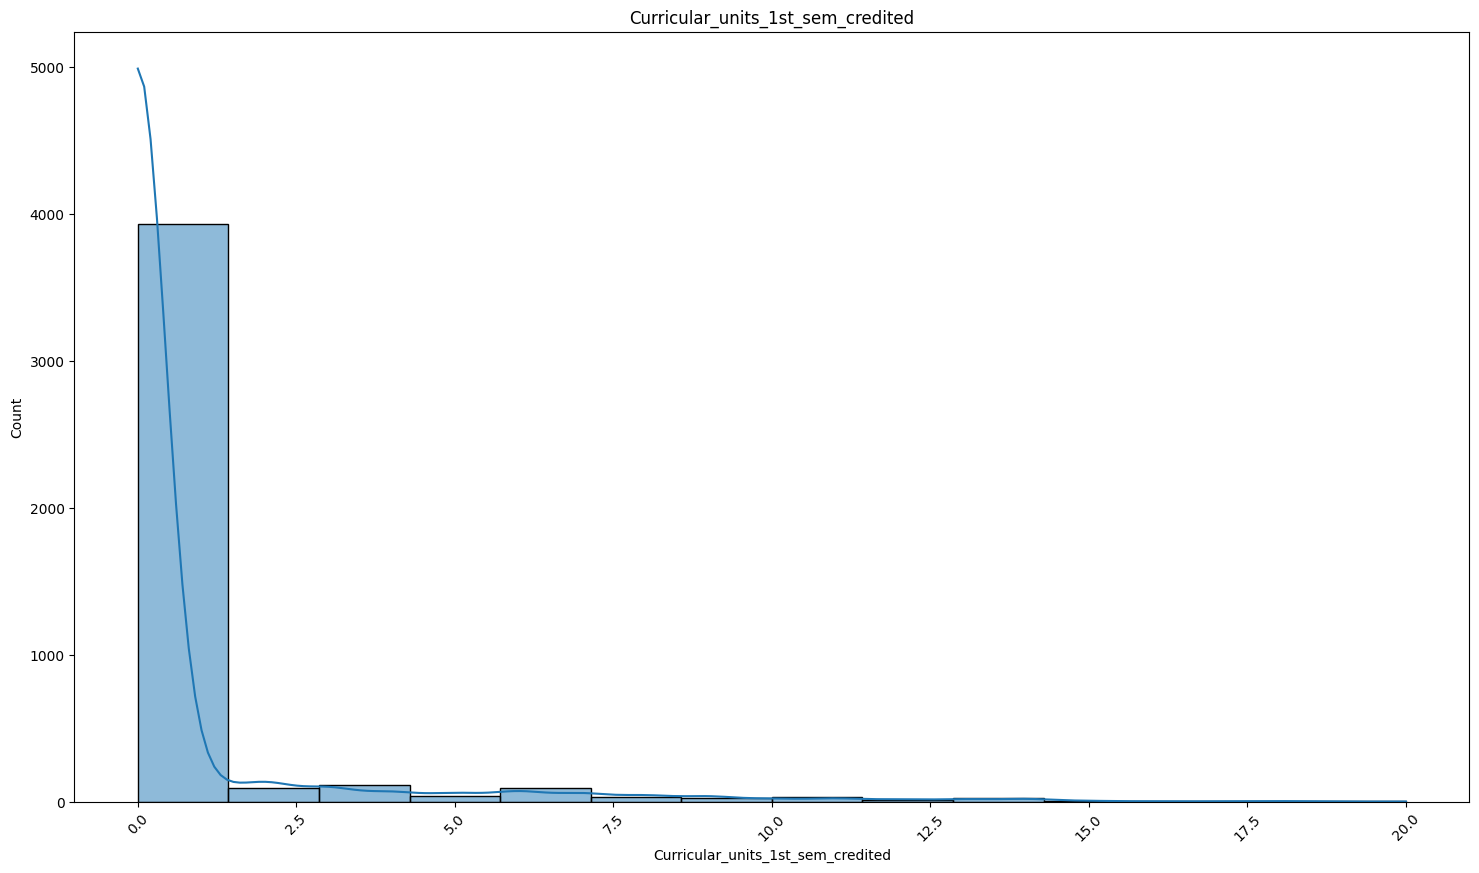

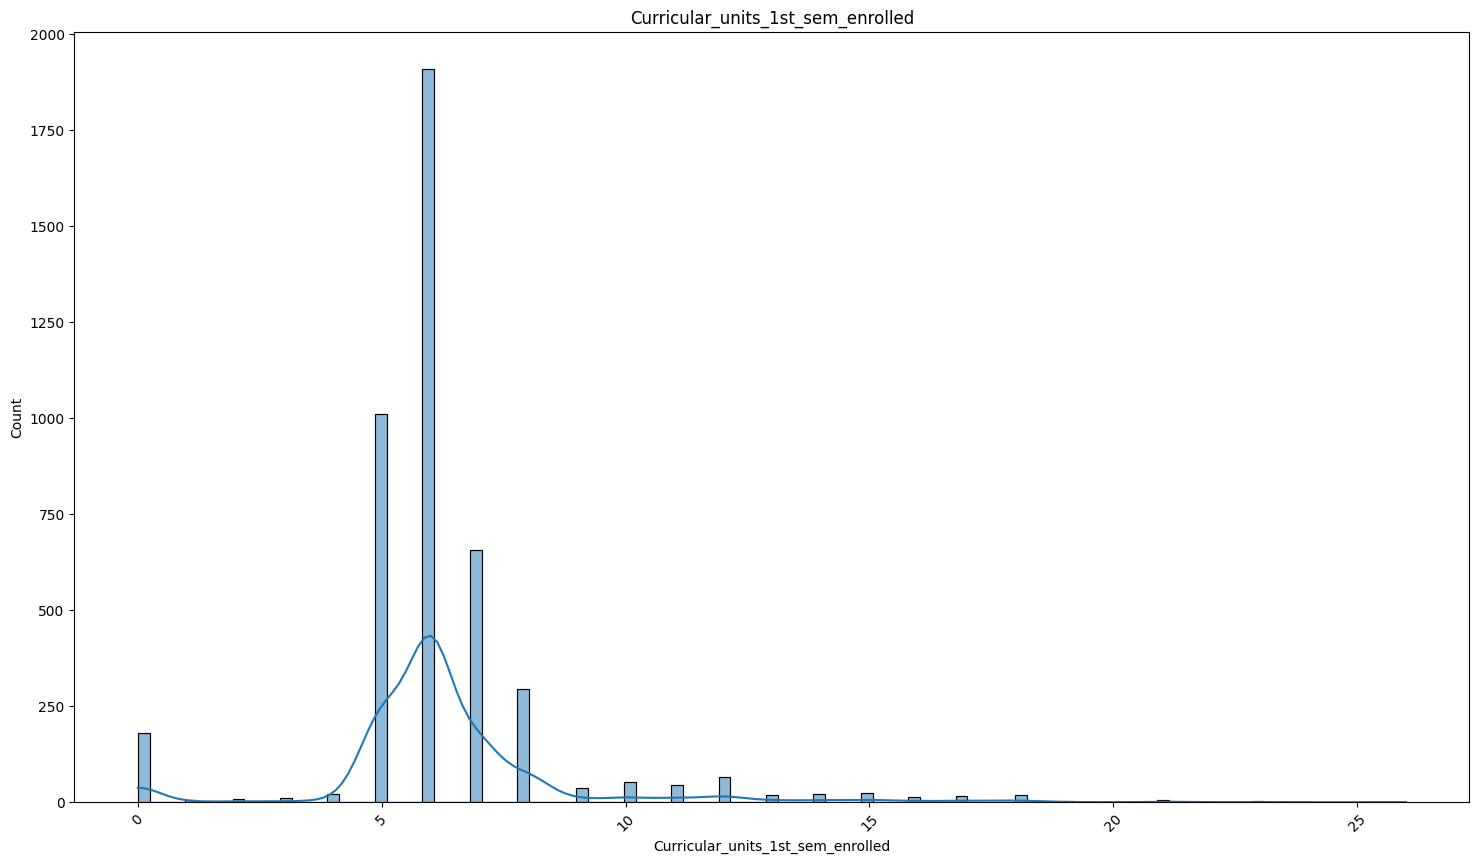

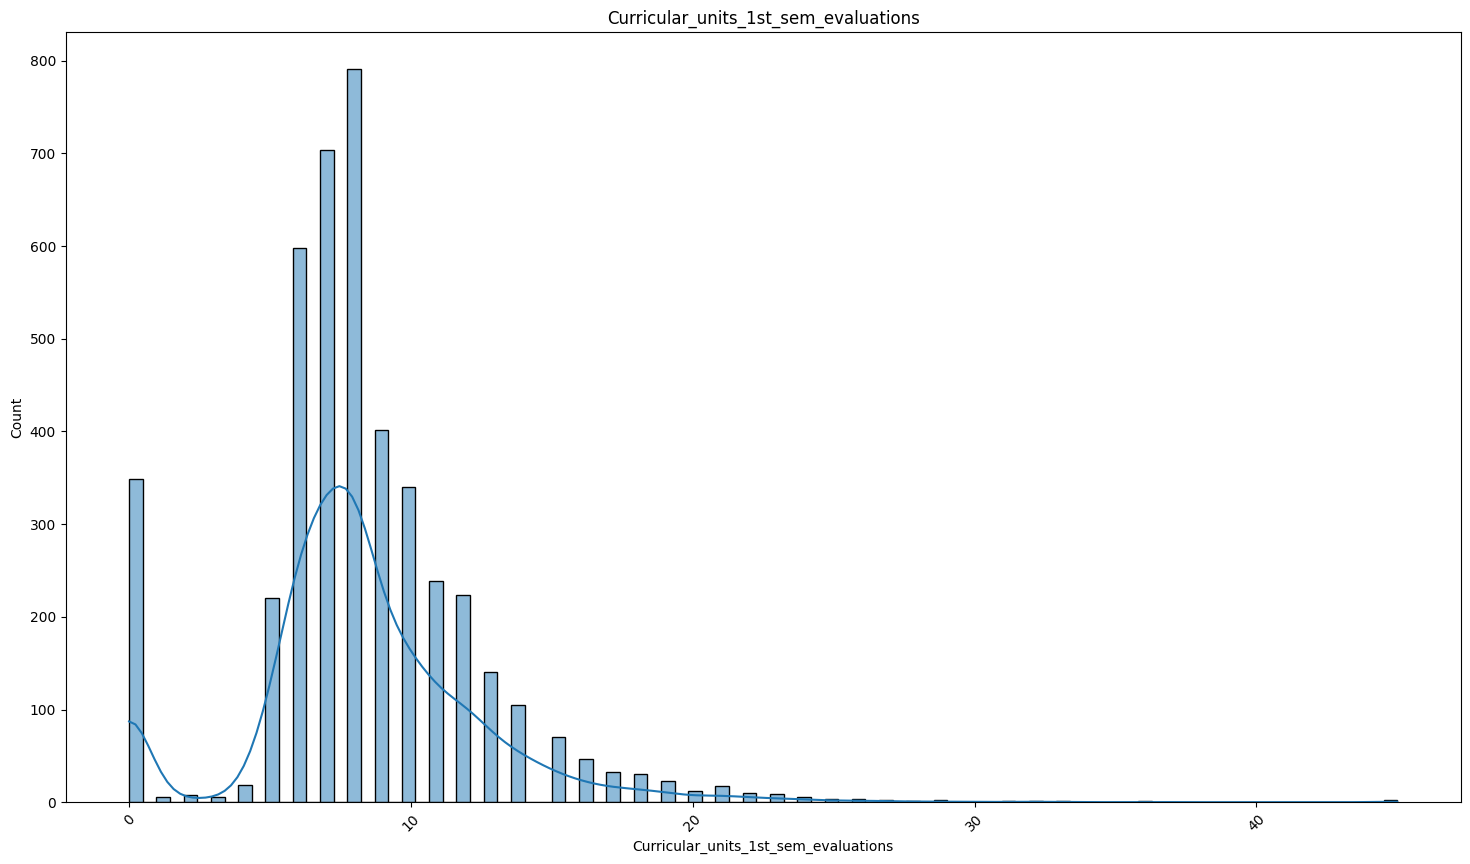

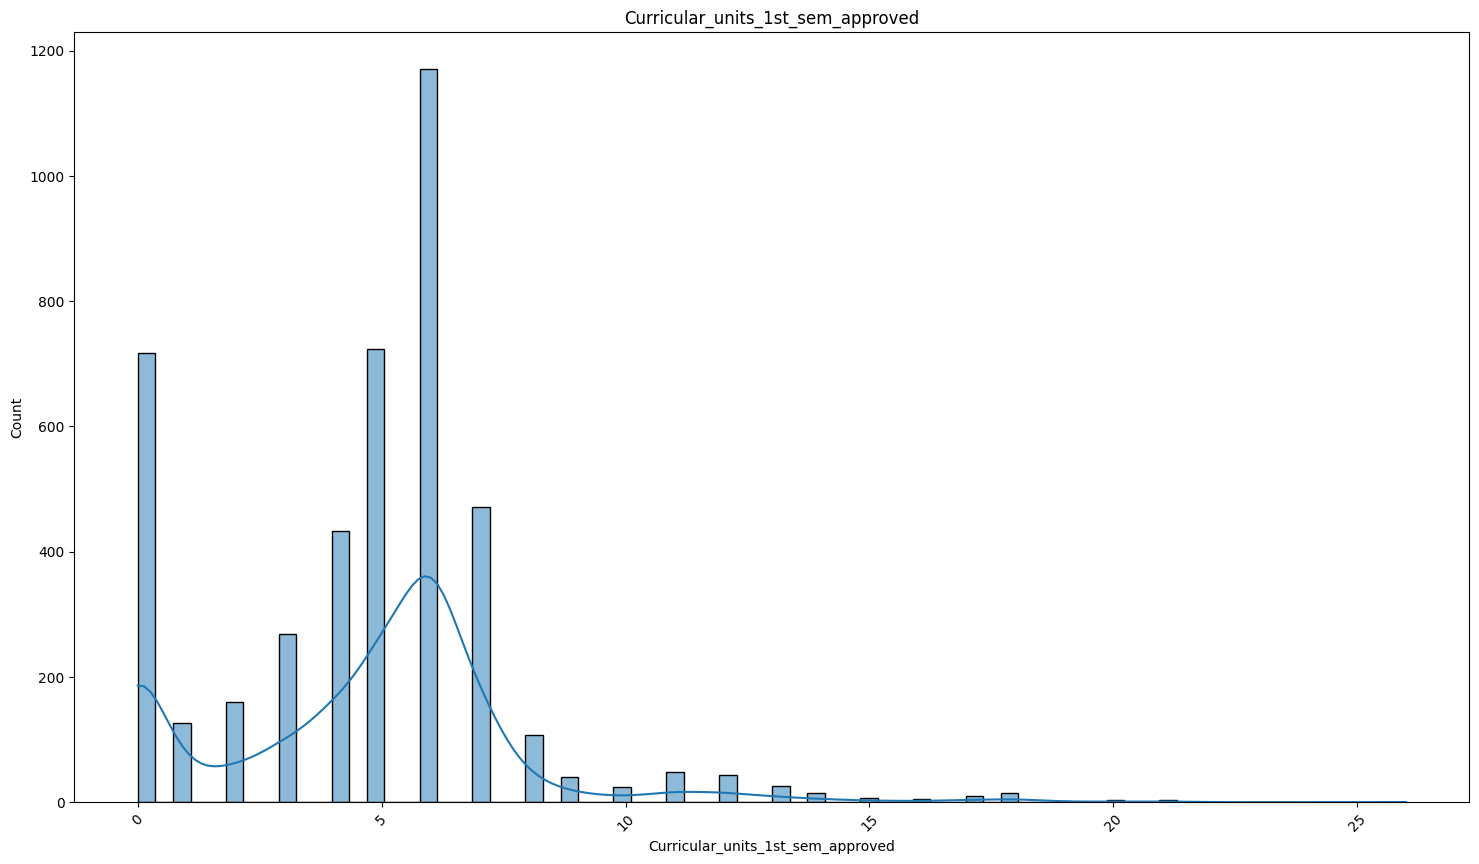

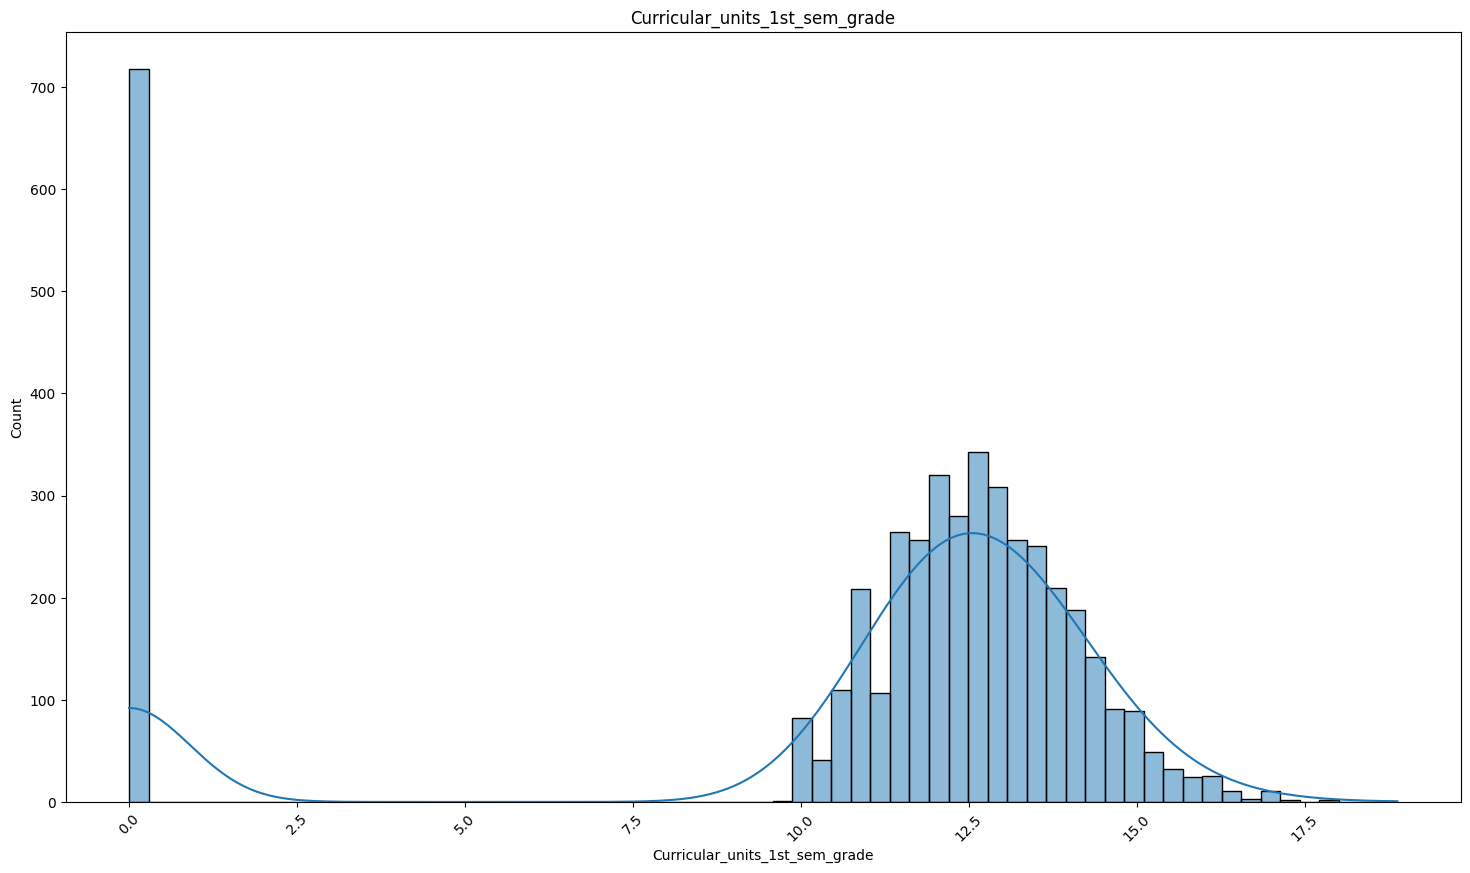

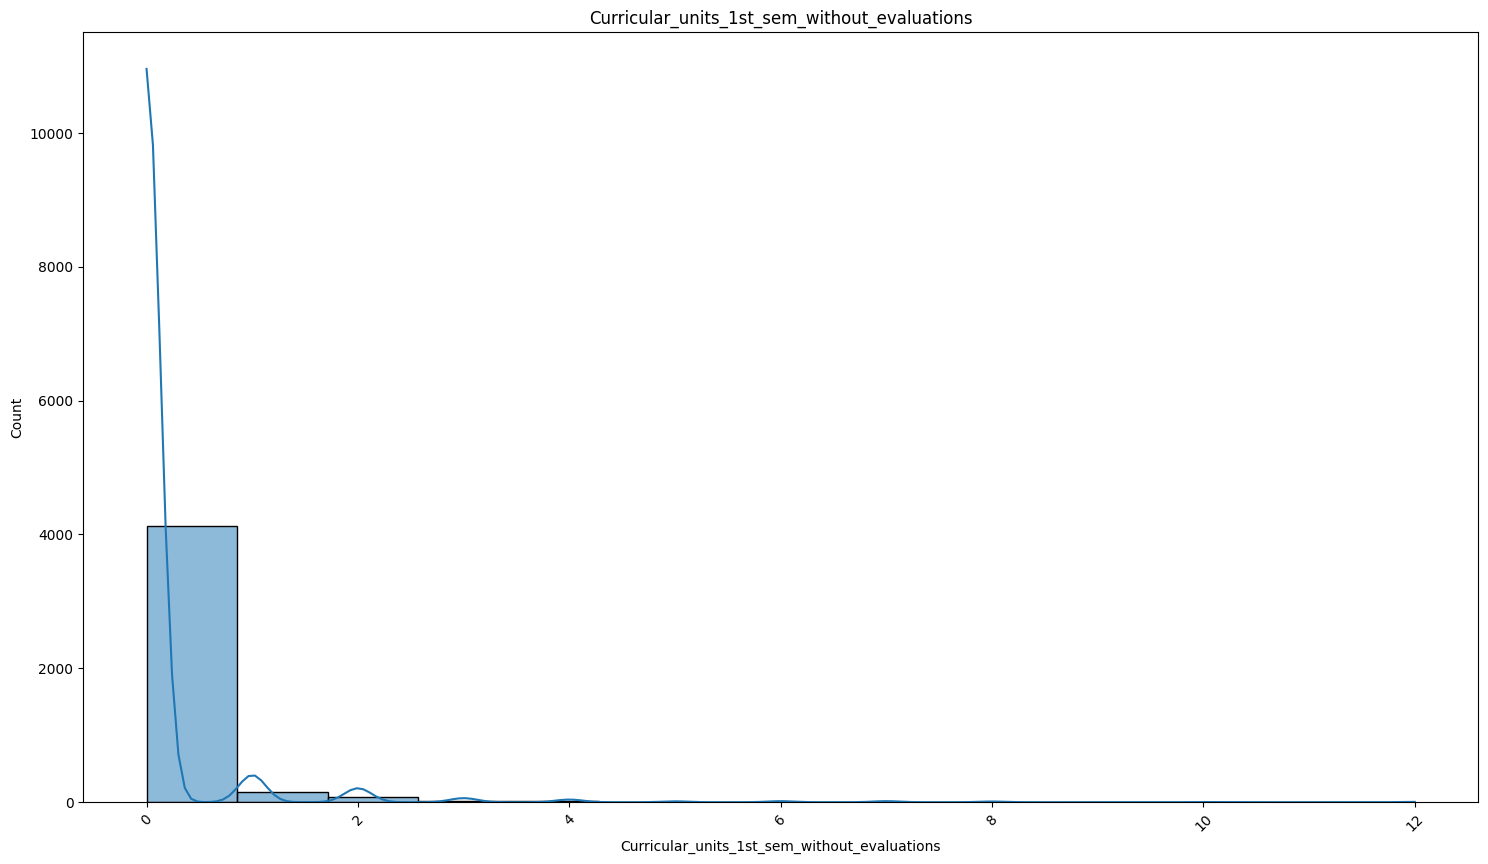

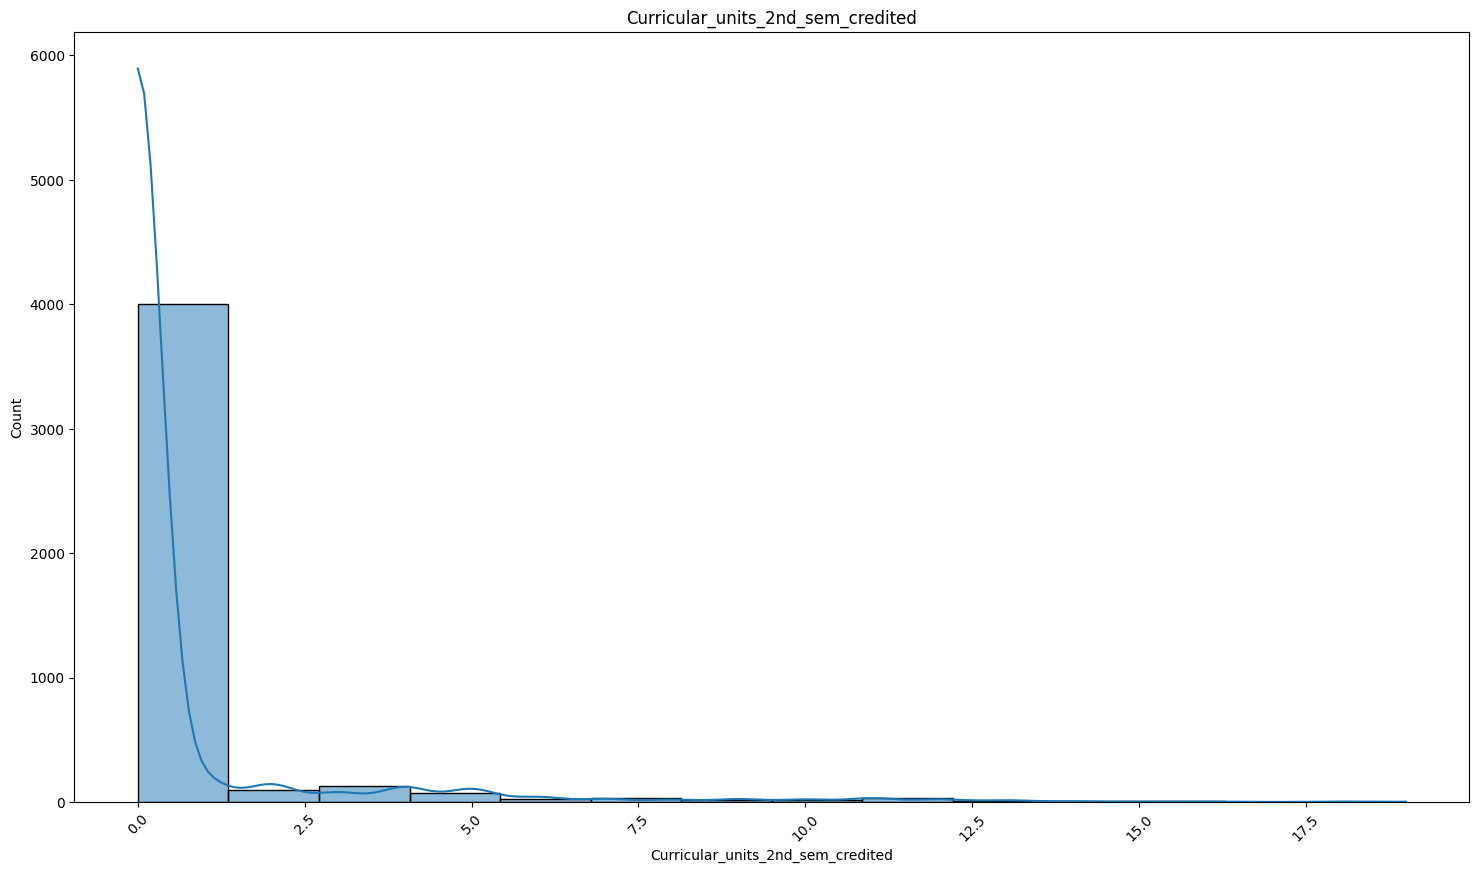

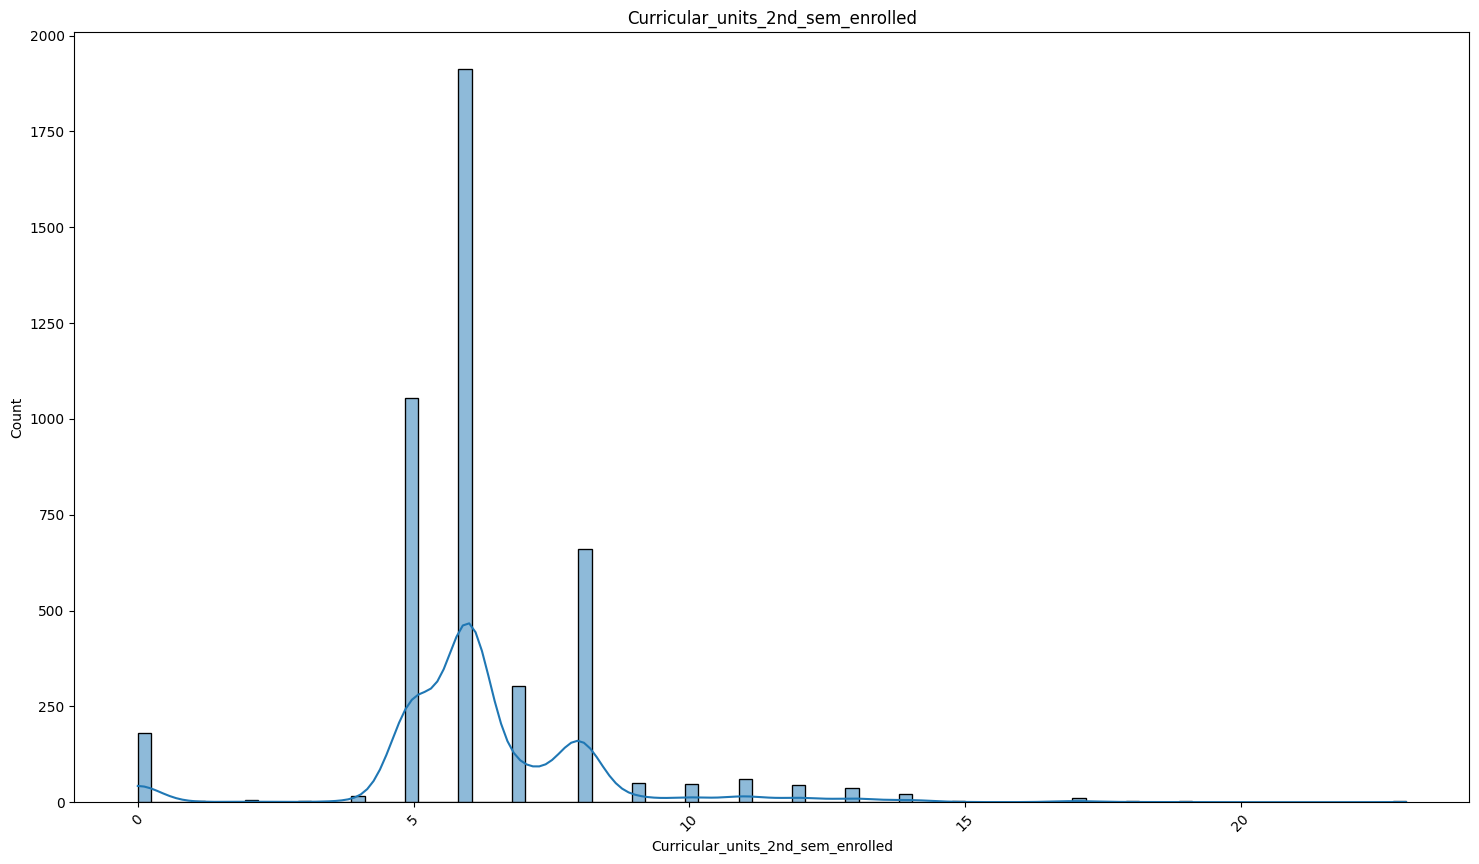

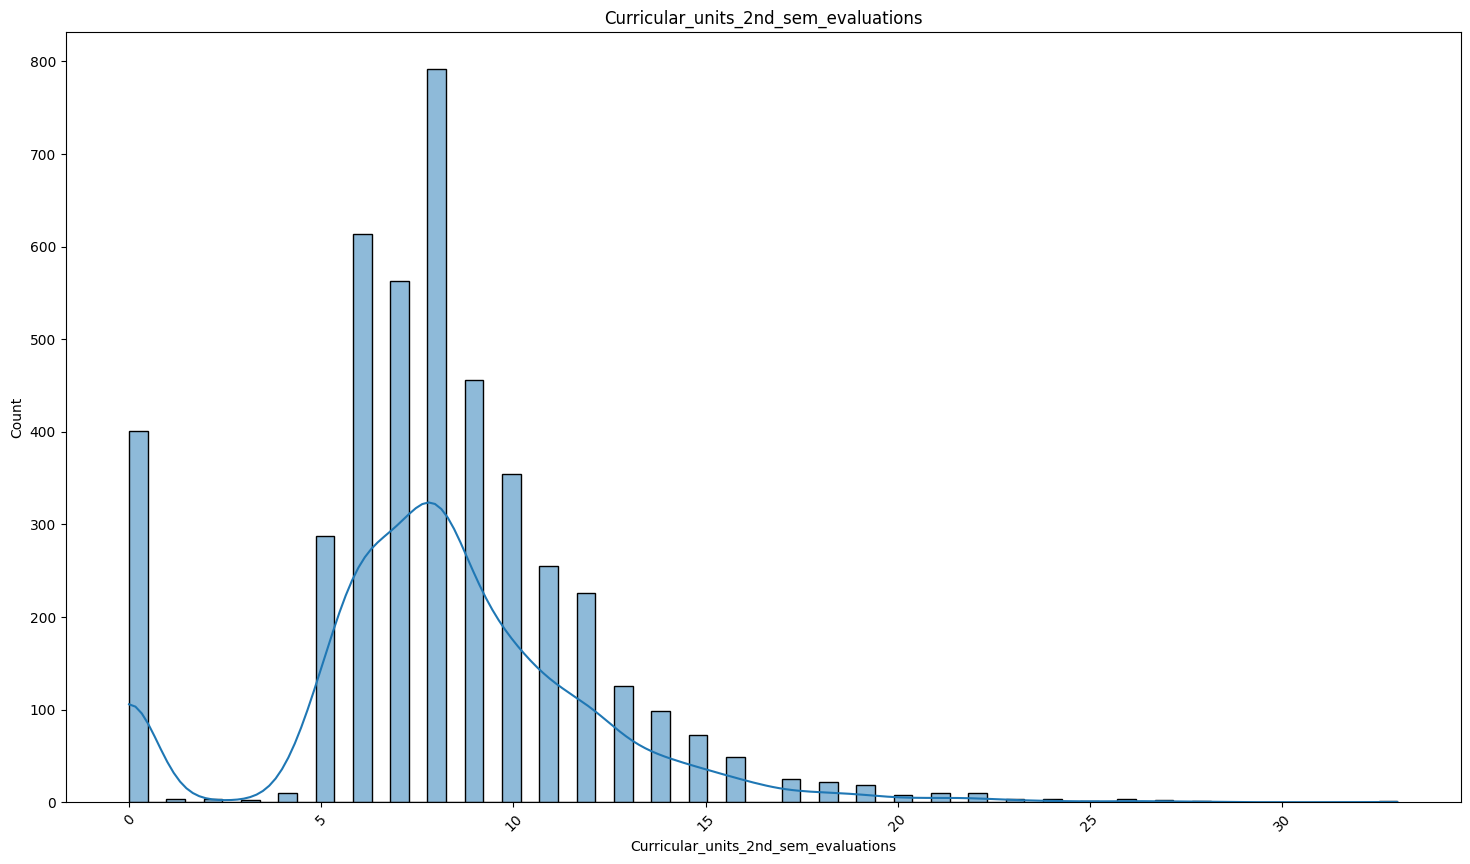

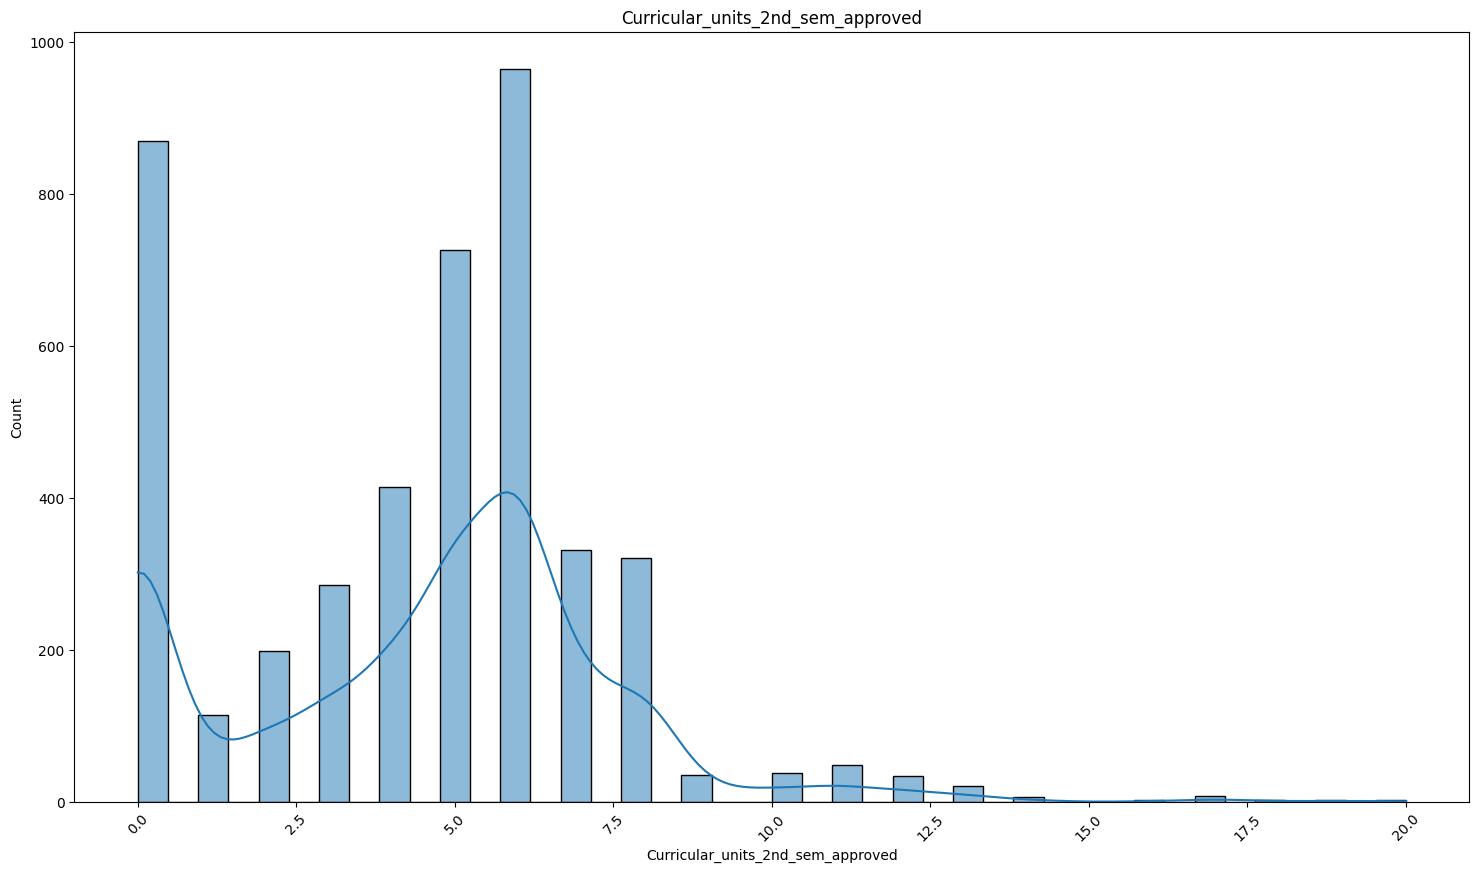

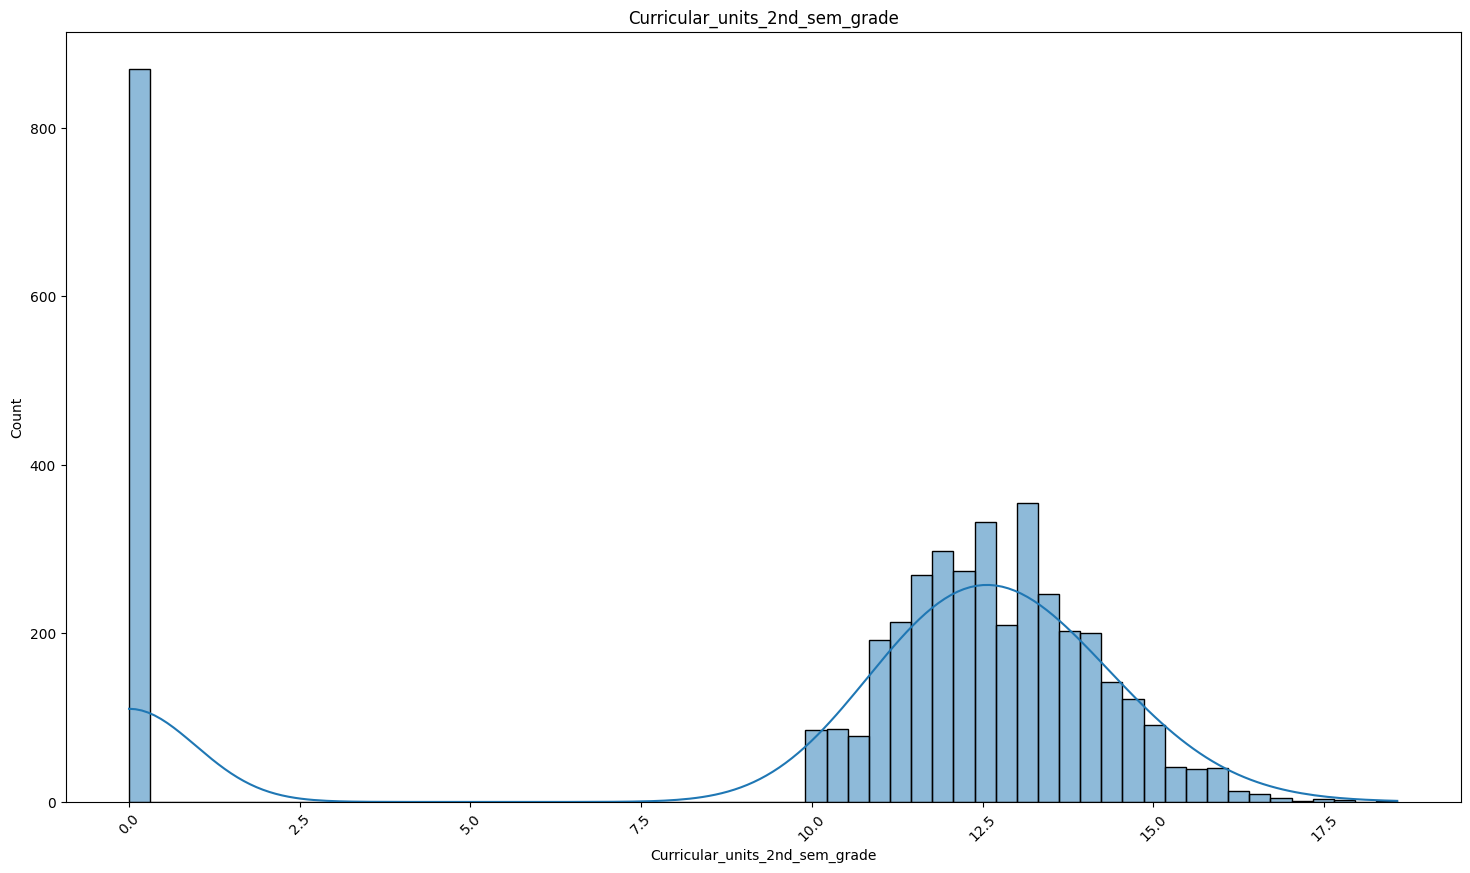

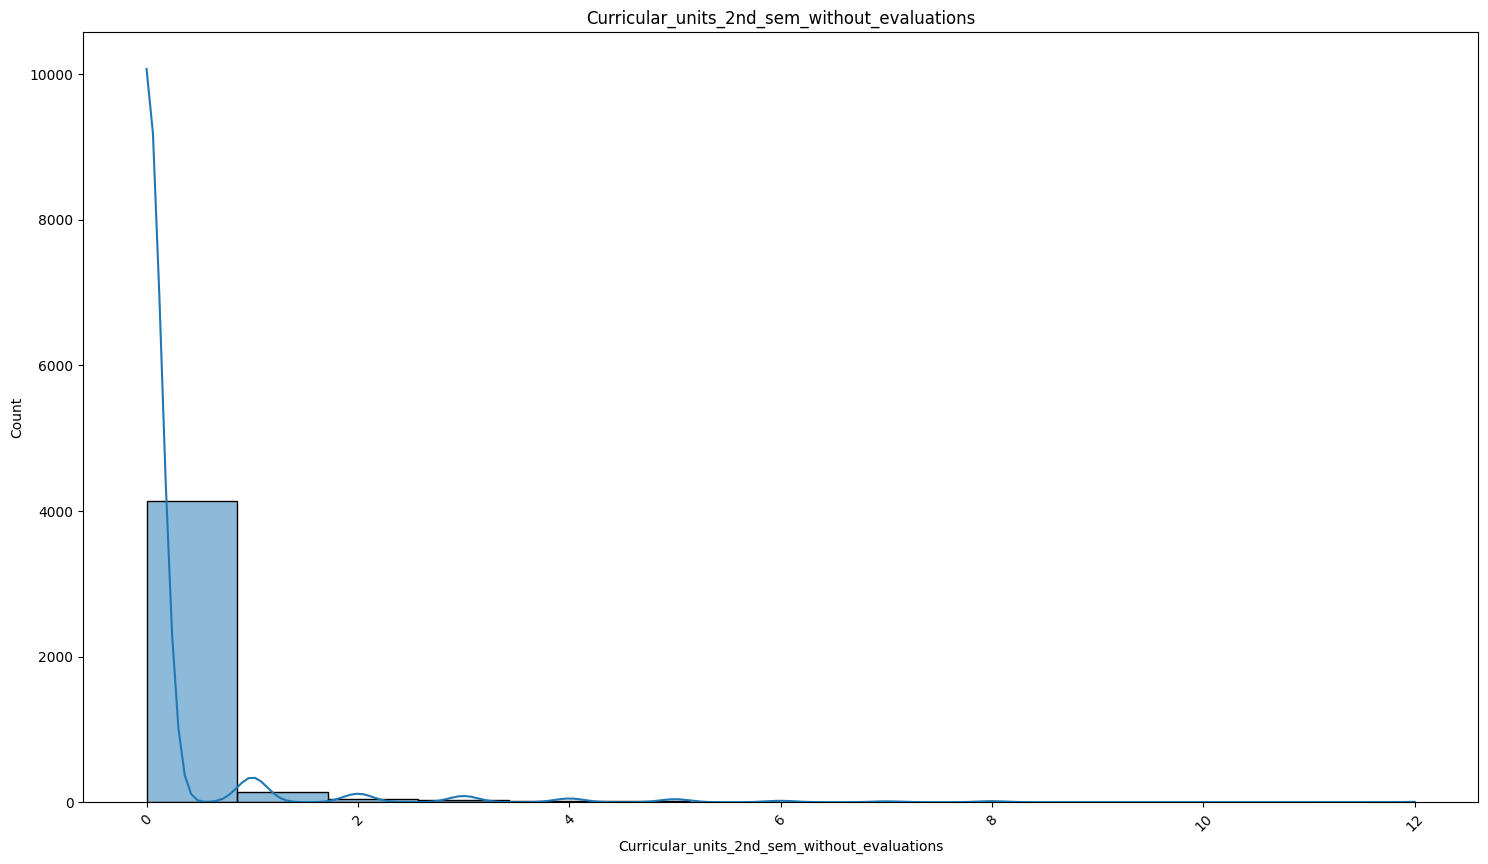

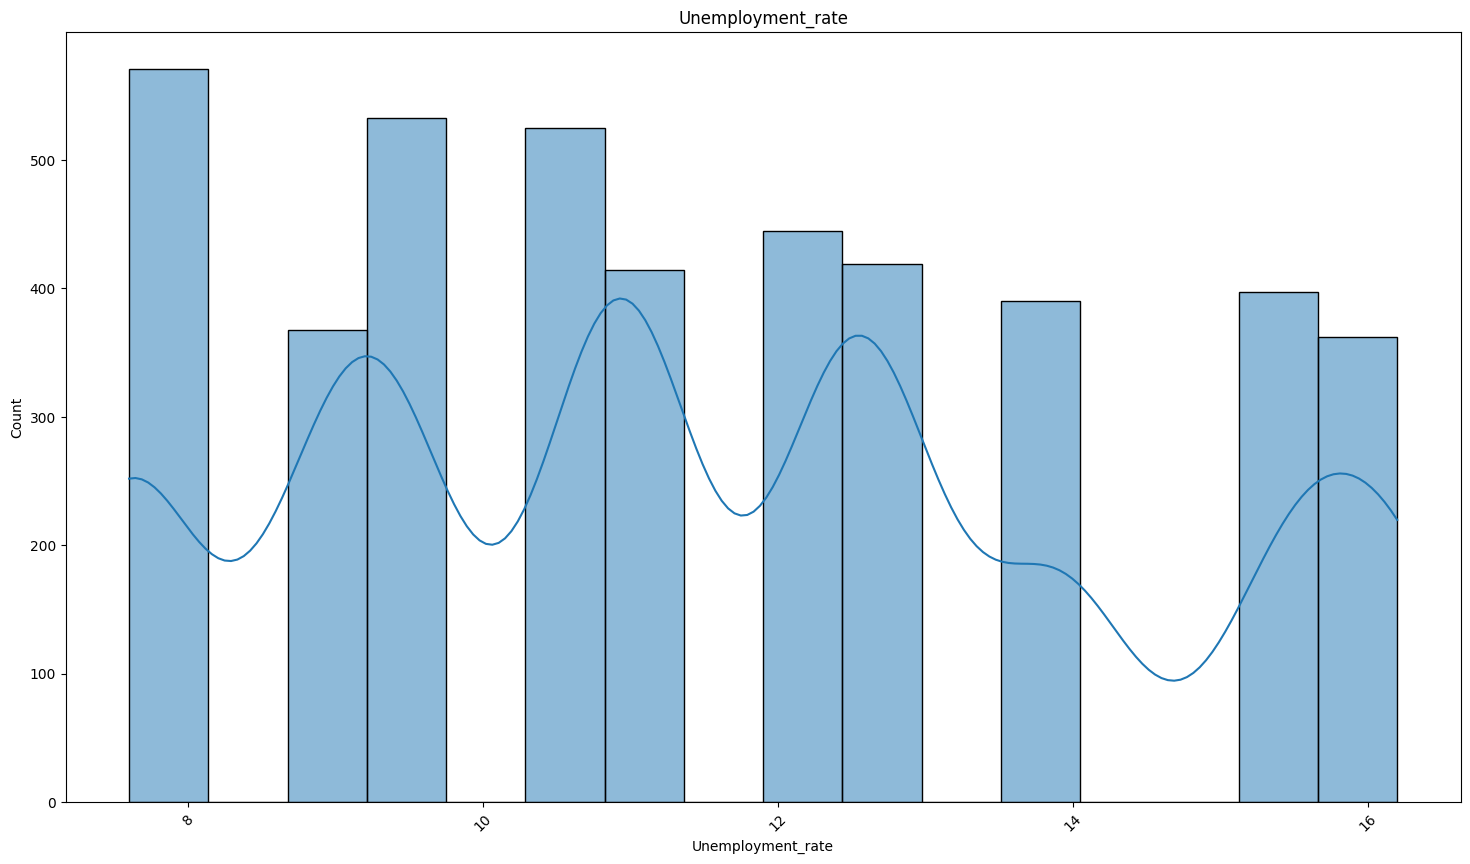

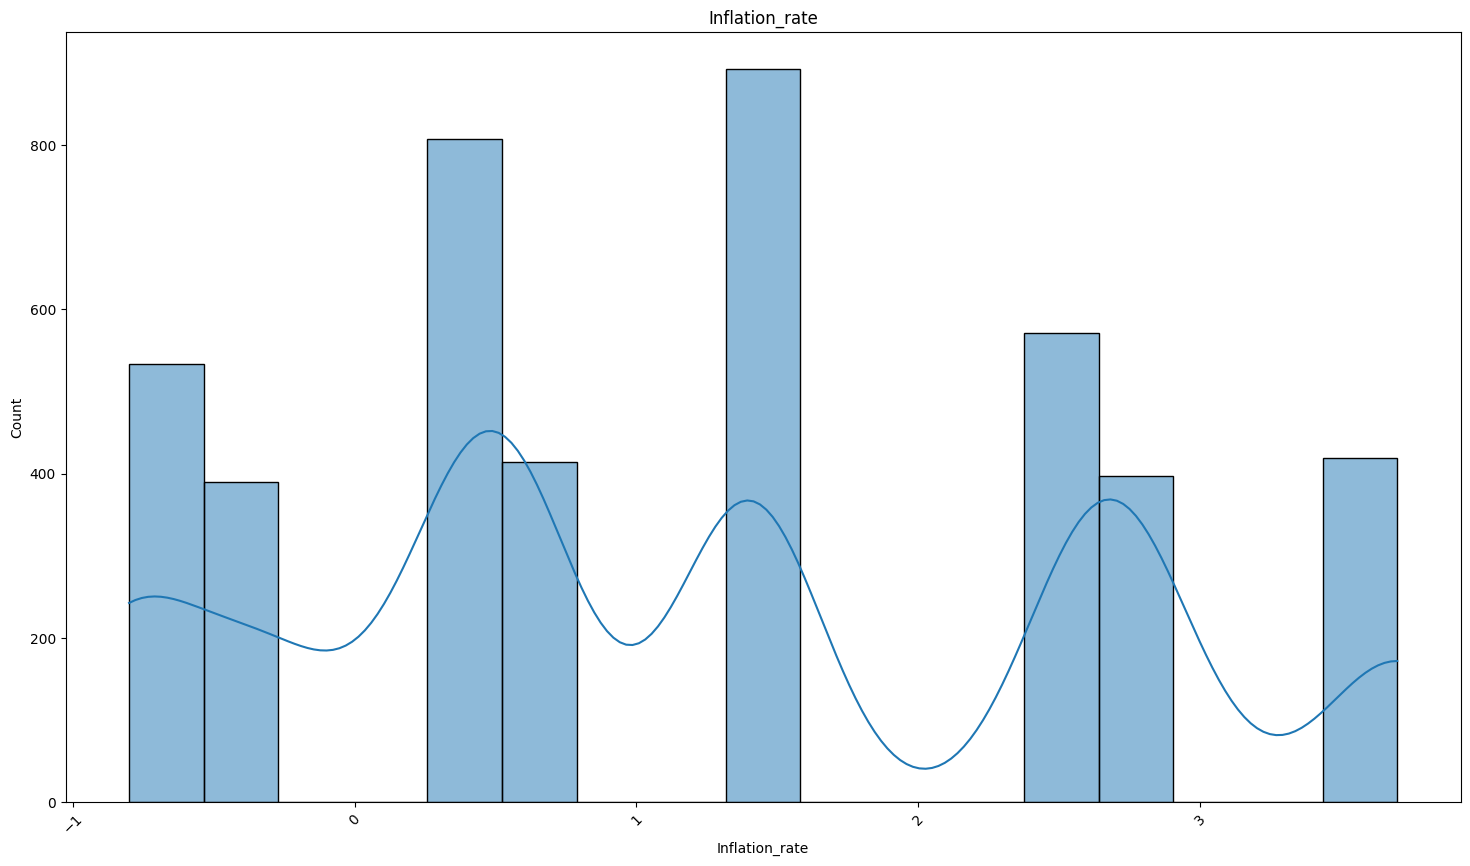

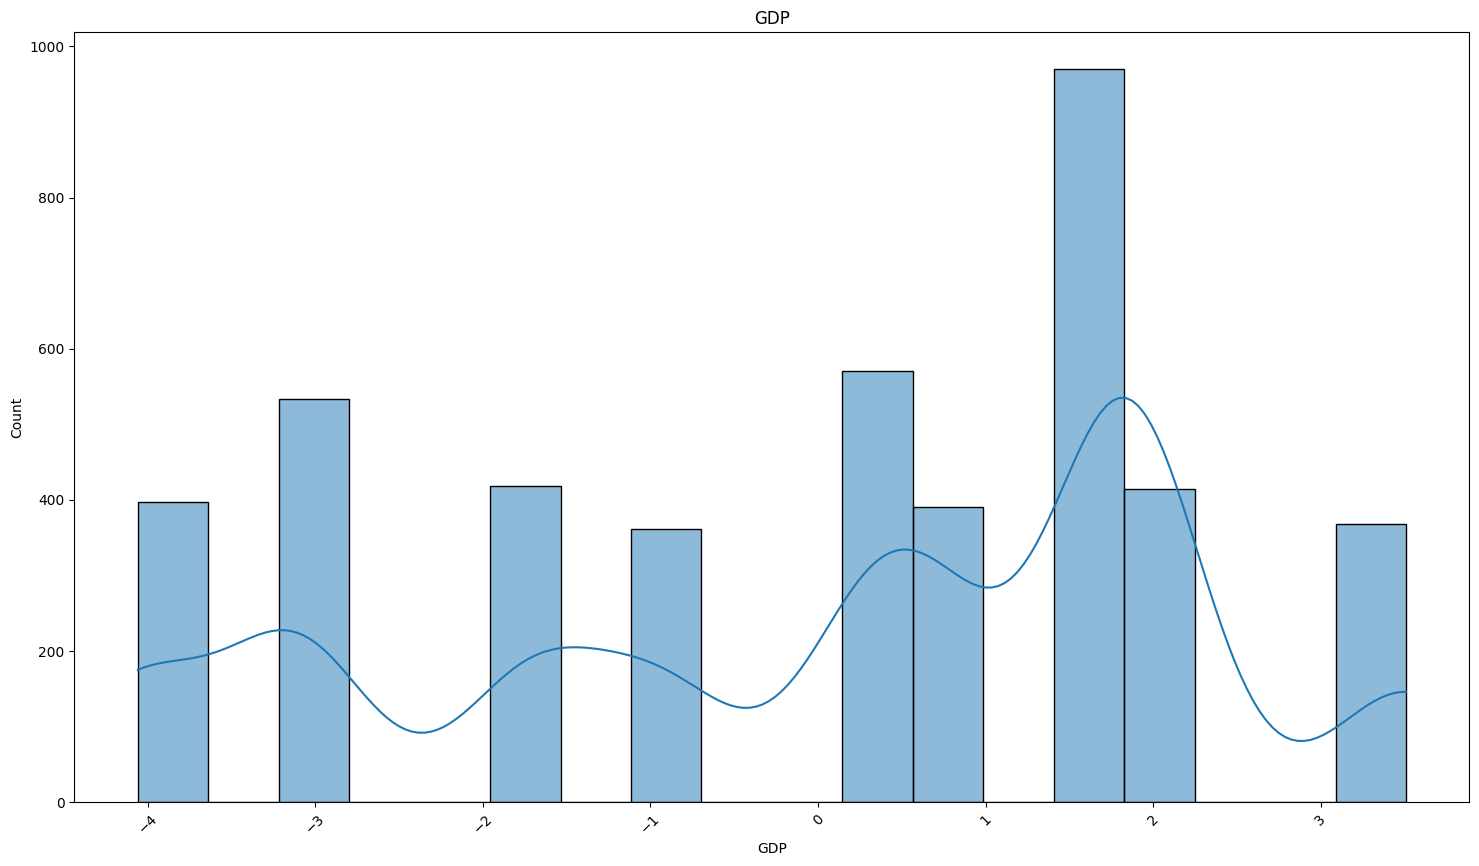

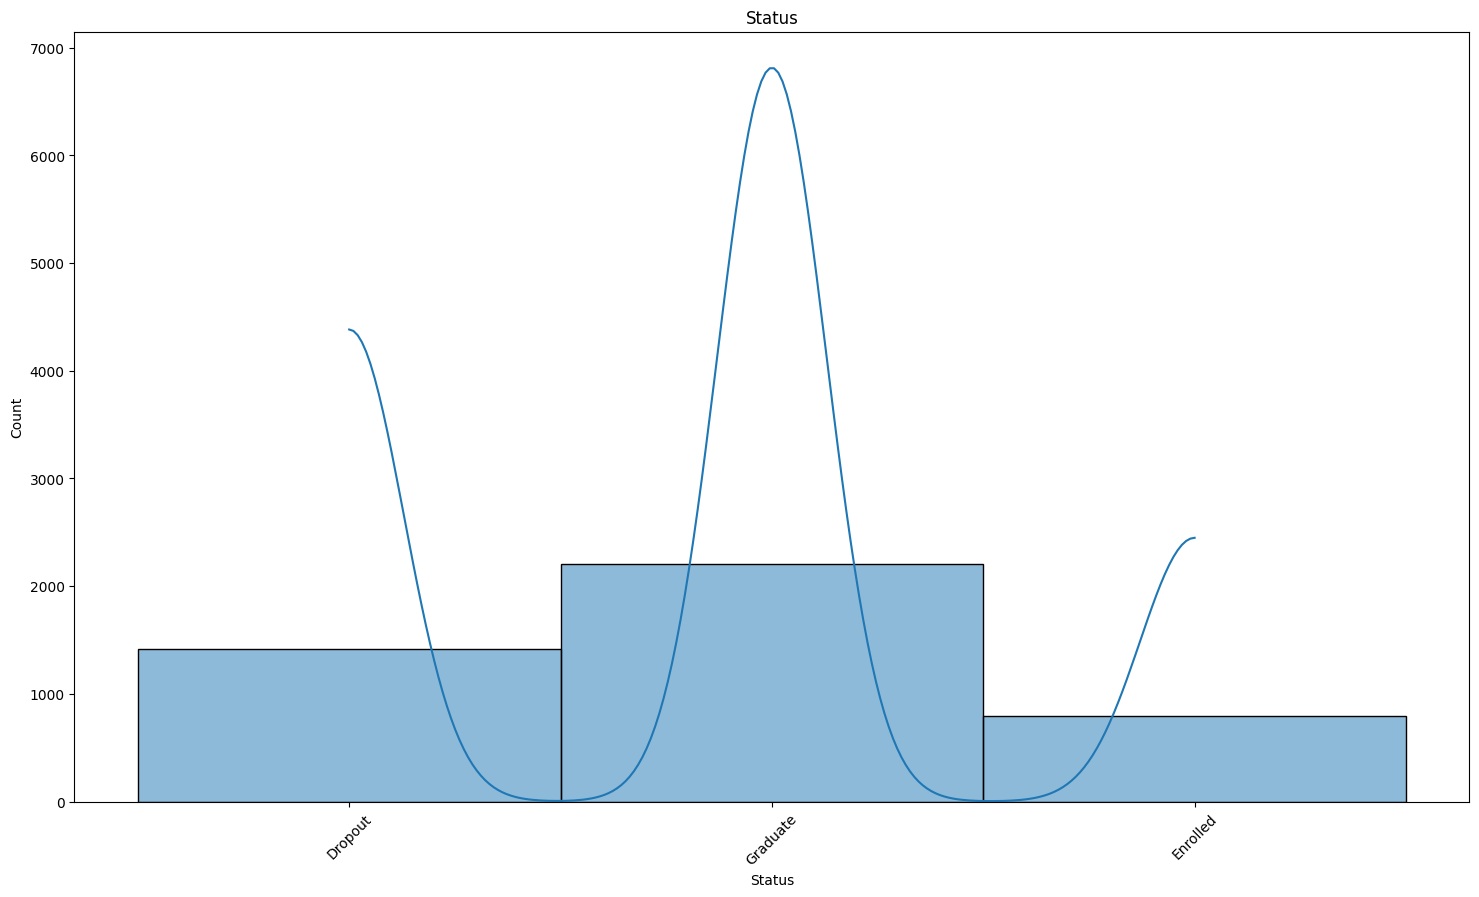

In [52]:
for col in data.columns:
    plt.subplots(figsize=(18,10))
    sns.histplot(data, x=col, kde=True)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

### Memisah Data Untuk yang Dropout dengan yang Lulus lalu Bandingkan

In [53]:
dropOut = data.loc[data['Status']=='Dropout']
graduate = data.loc[data['Status']=='Graduate']
enrolled = data.loc[data['Status']=='Enrolled']

print(f'Shape of Dropout Data : {dropOut.shape}')
print(f'Shape of Graduate Data : {graduate.shape}')
print(f'Shape of Enrolled Data : {enrolled.shape}')

Shape of Dropout Data : (1421, 37)
Shape of Graduate Data : (2209, 37)
Shape of Enrolled Data : (794, 37)


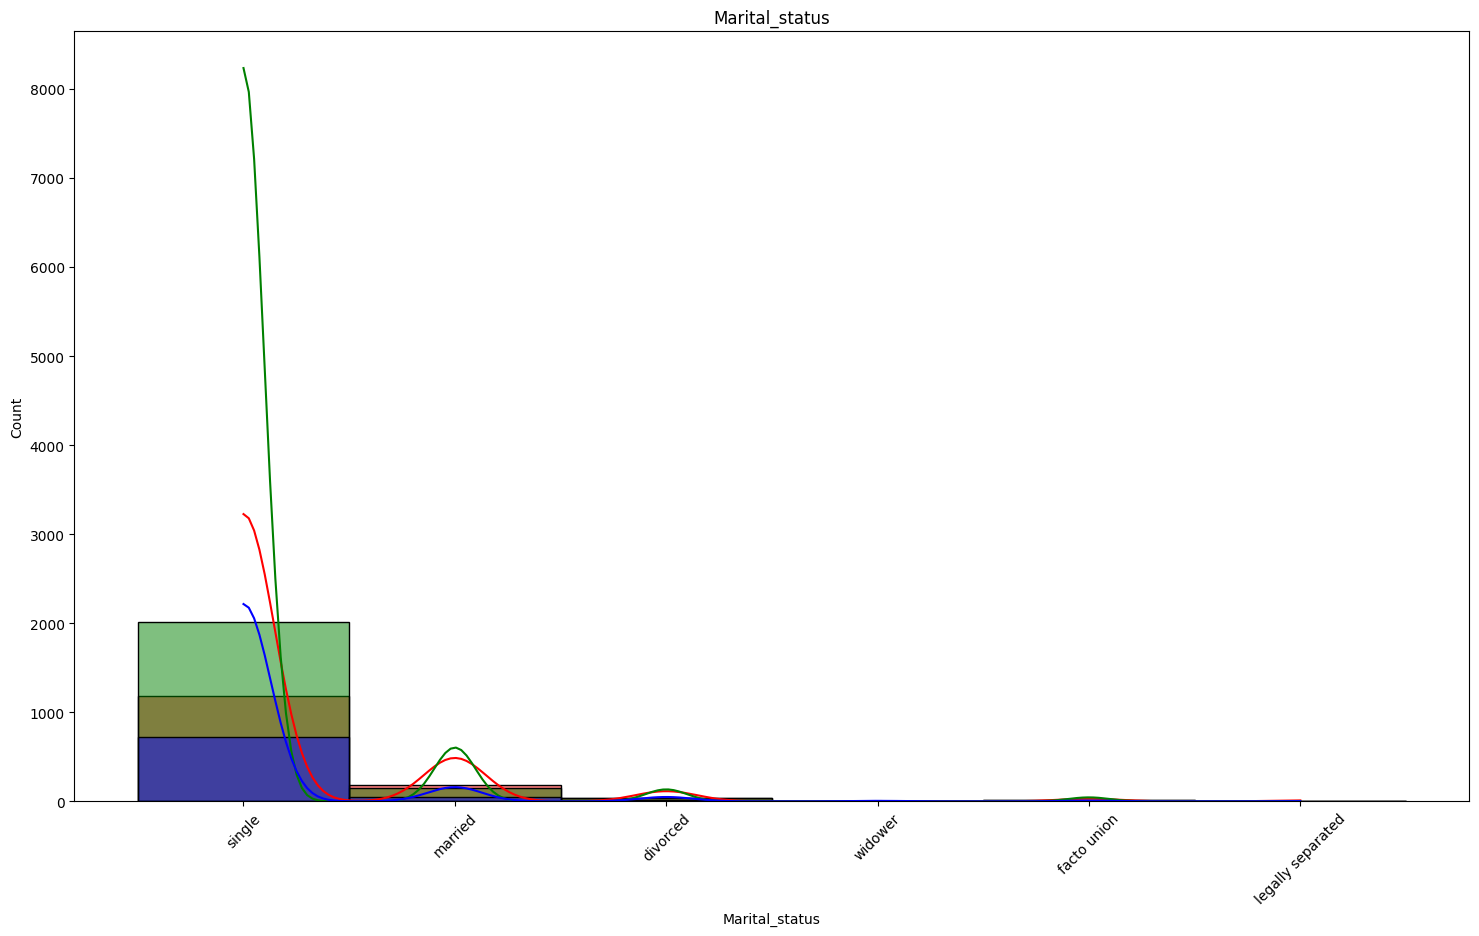

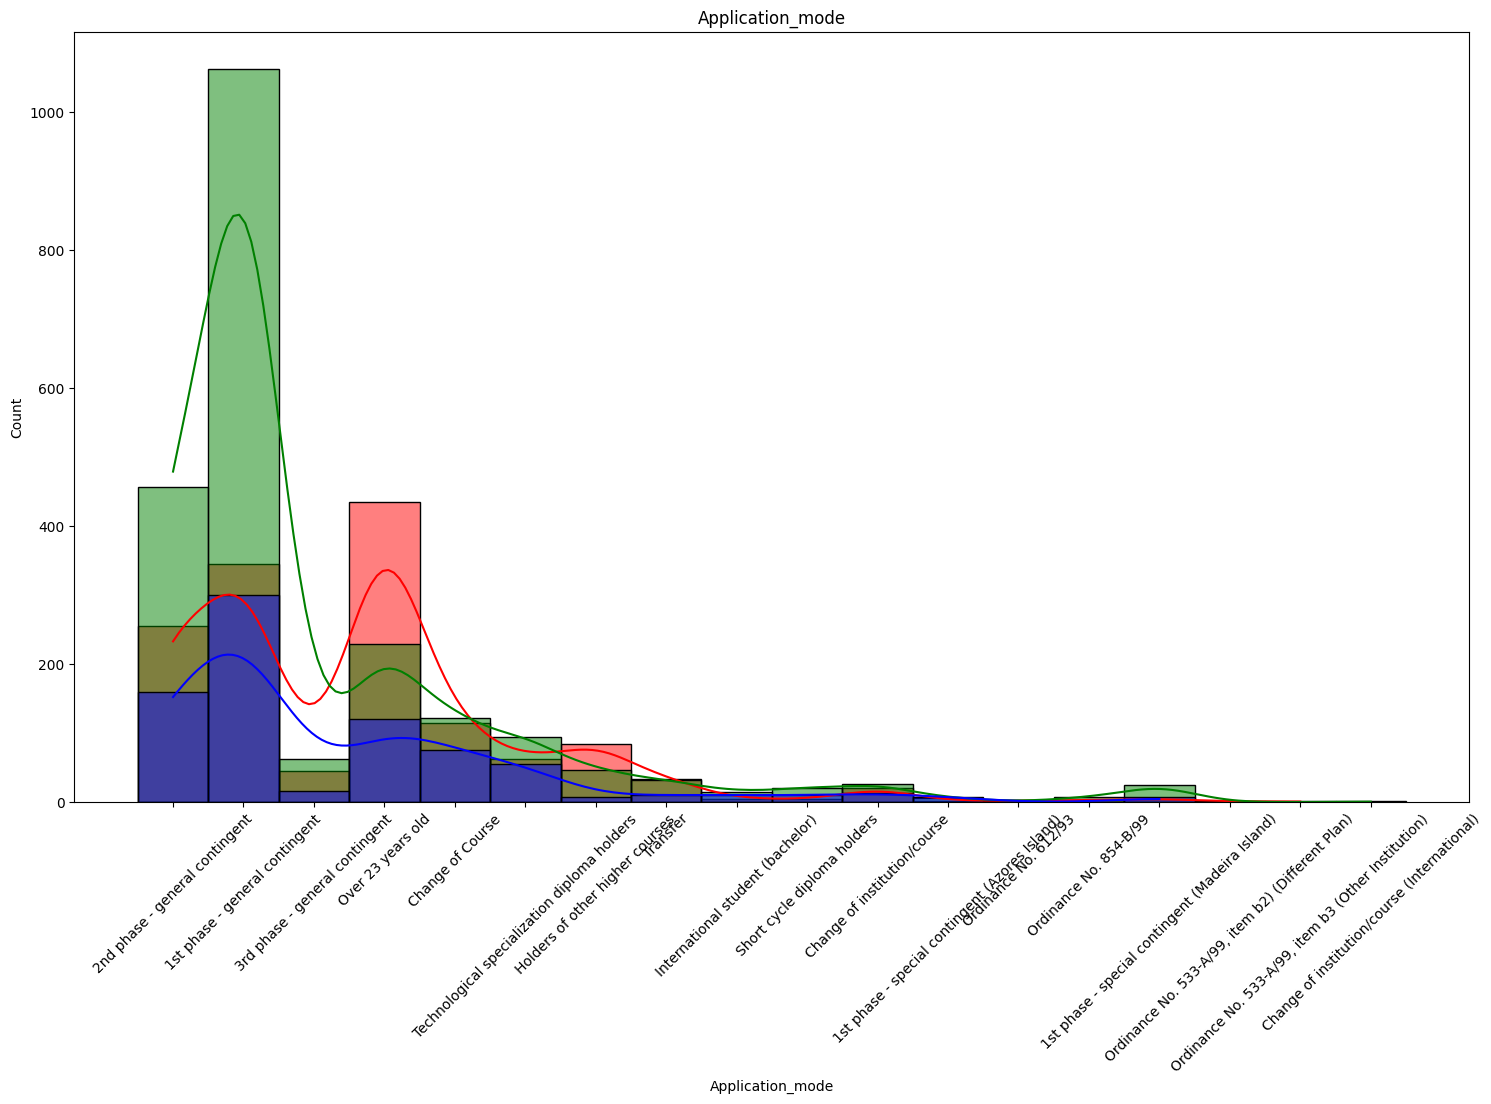

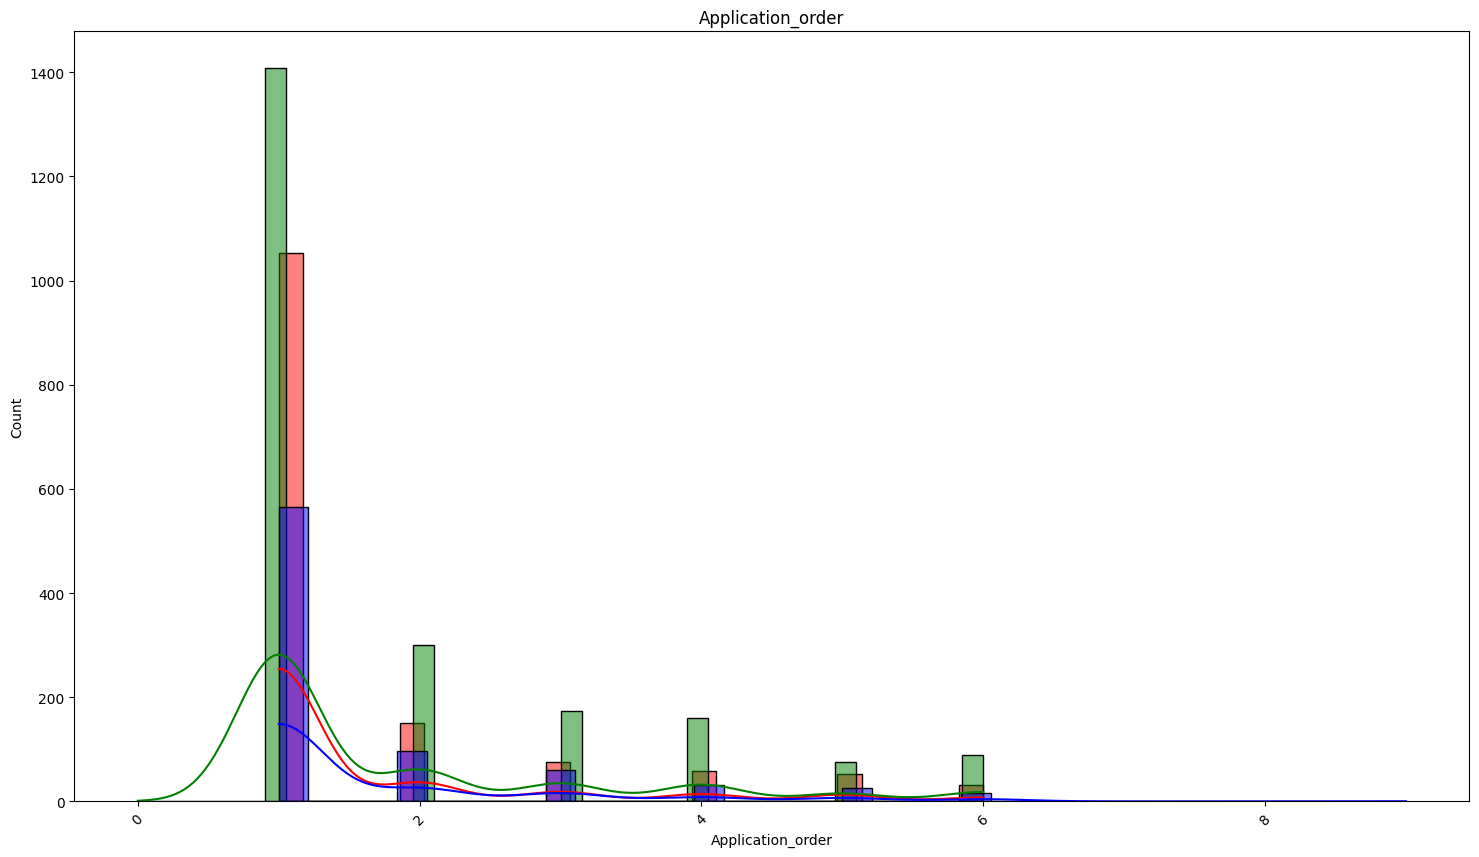

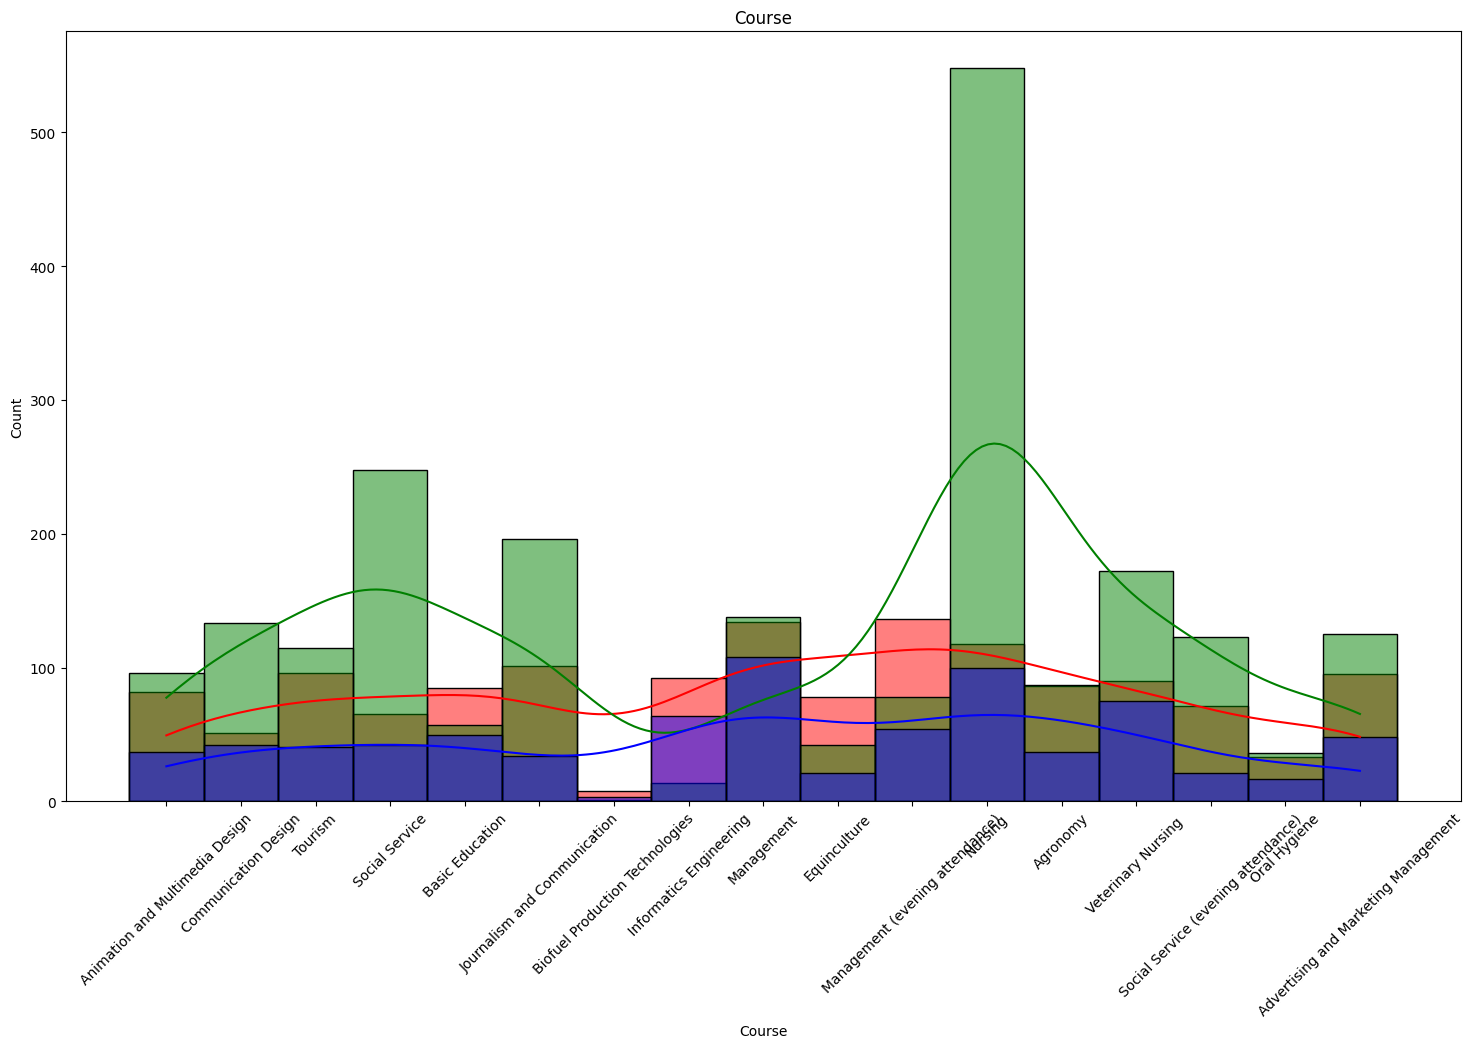

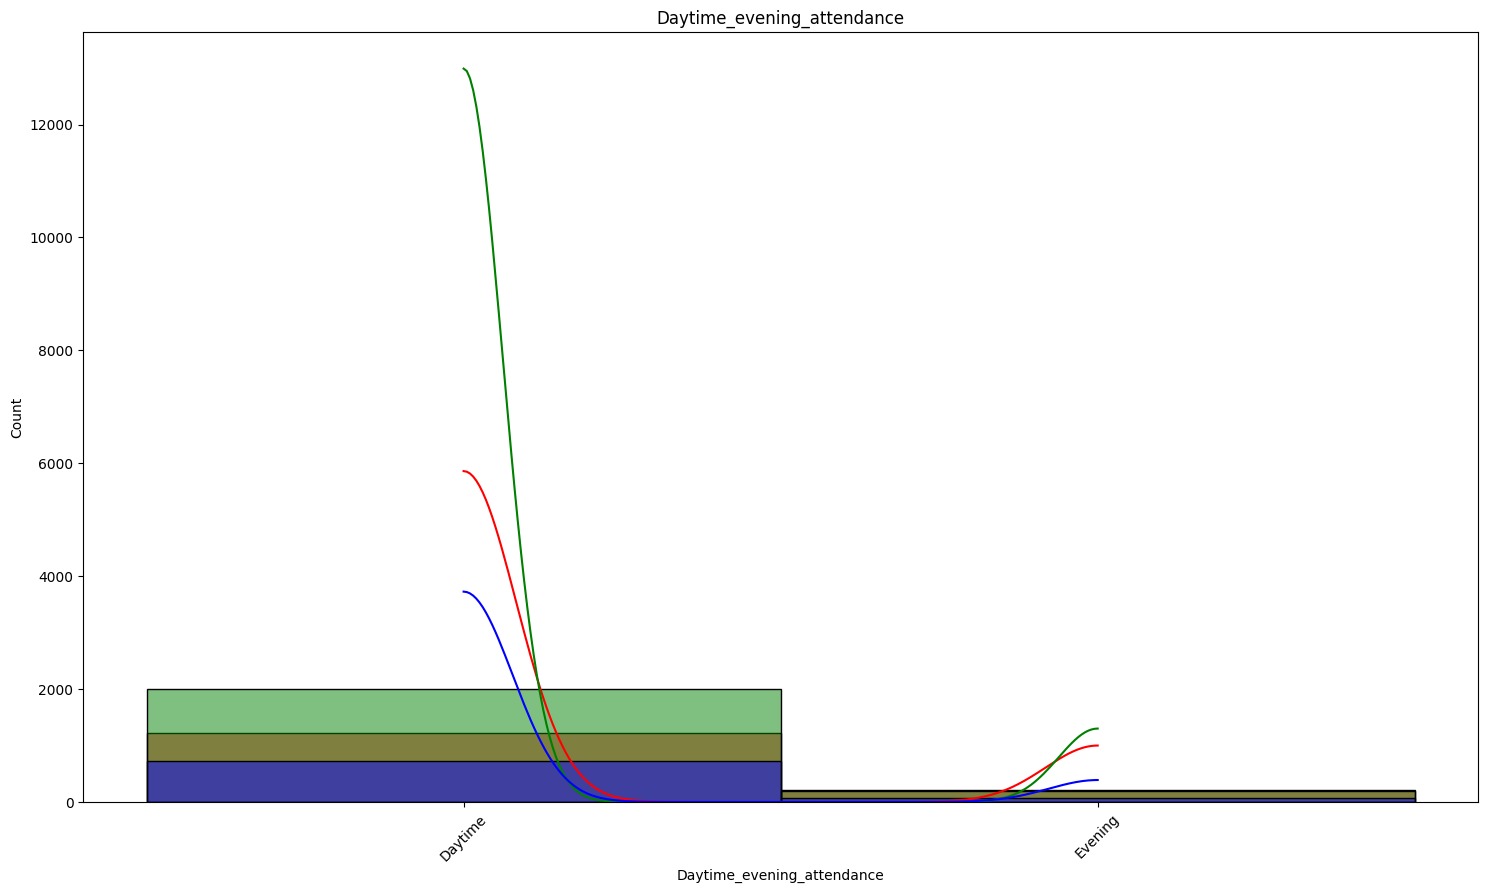

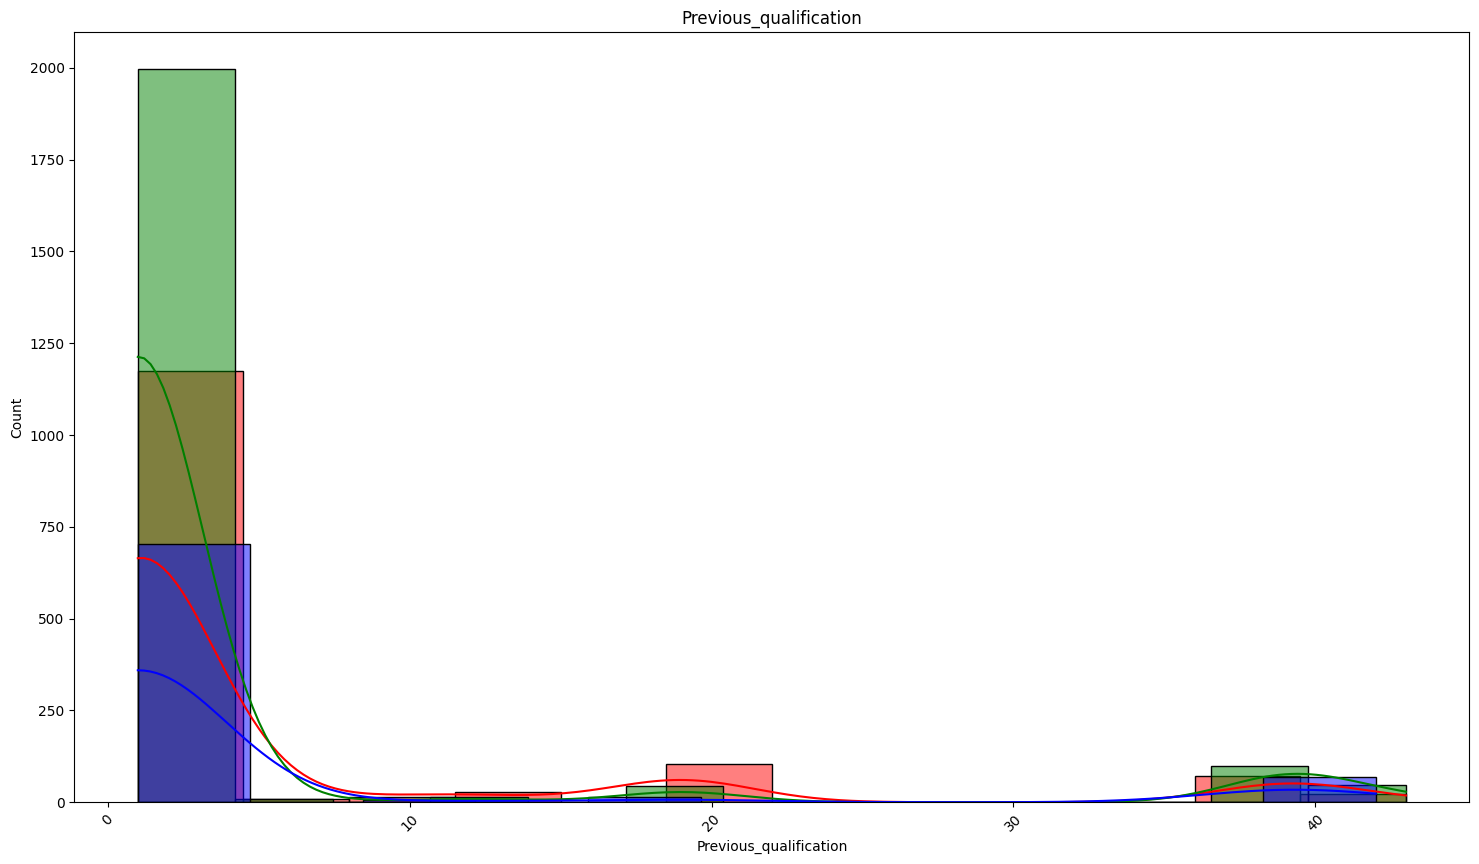

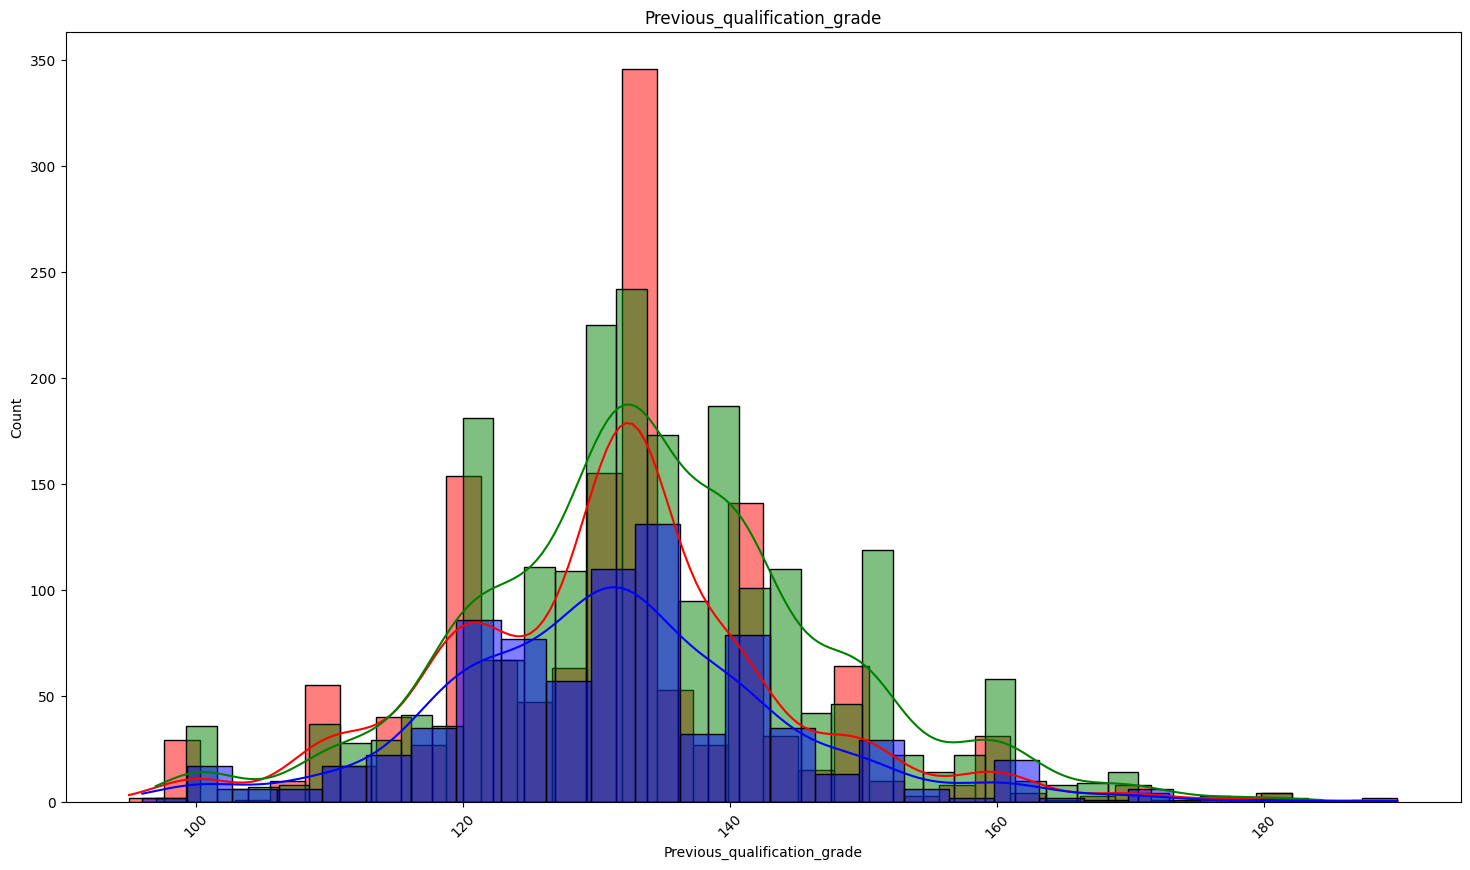

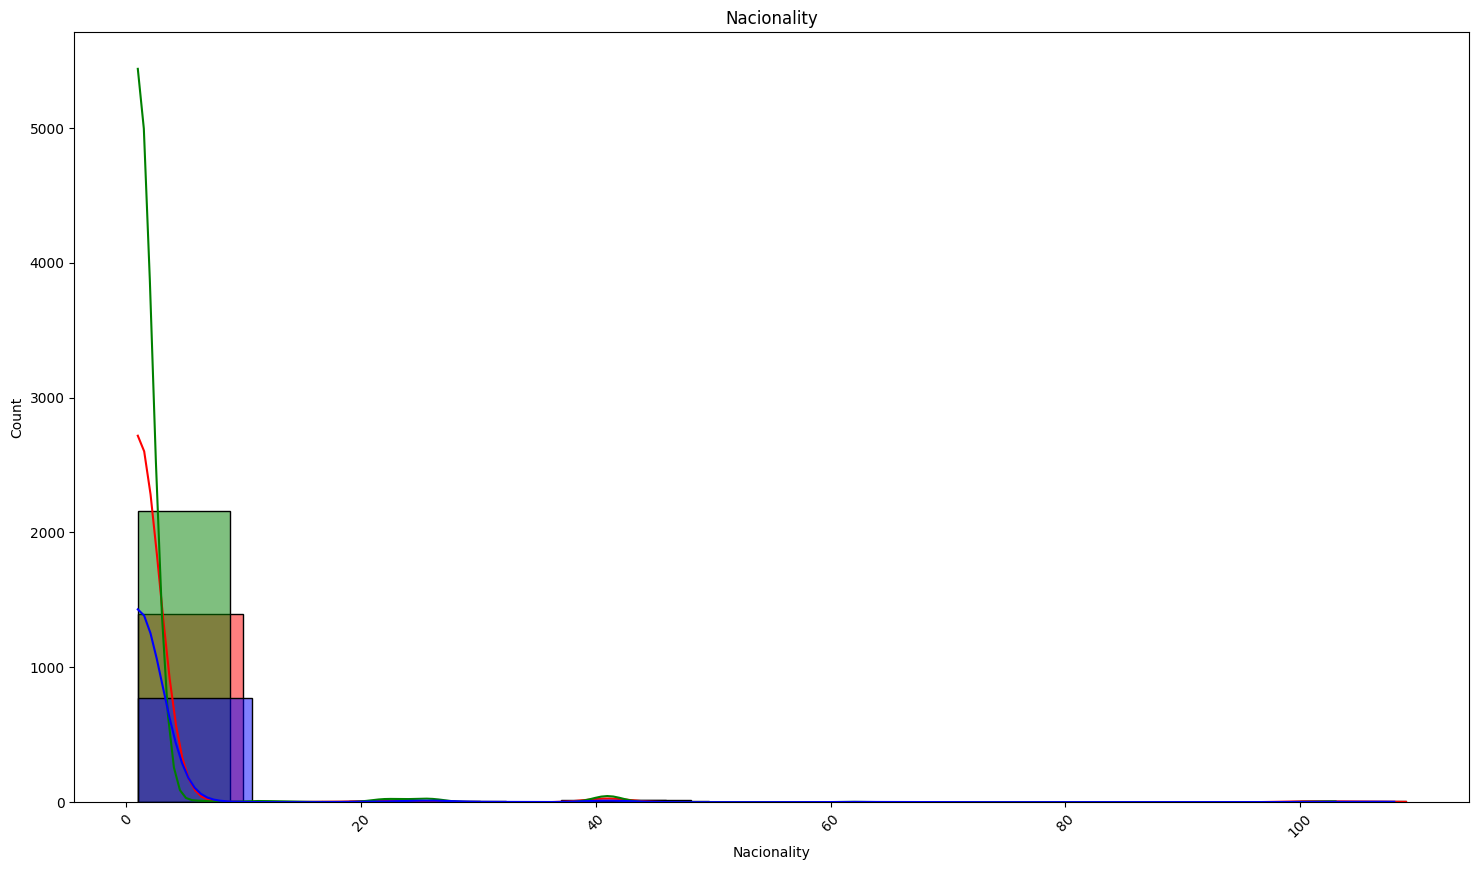

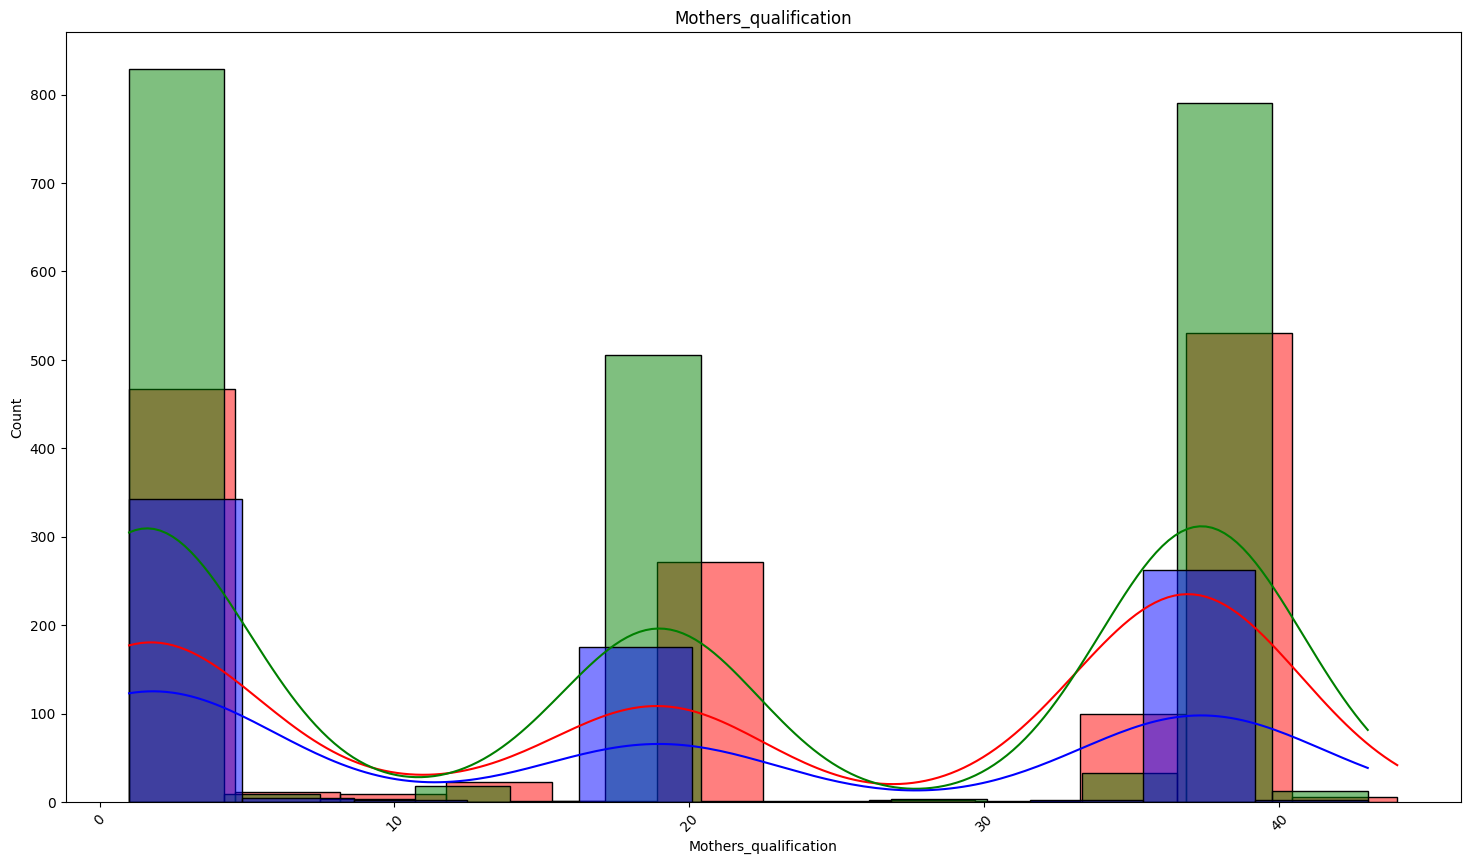

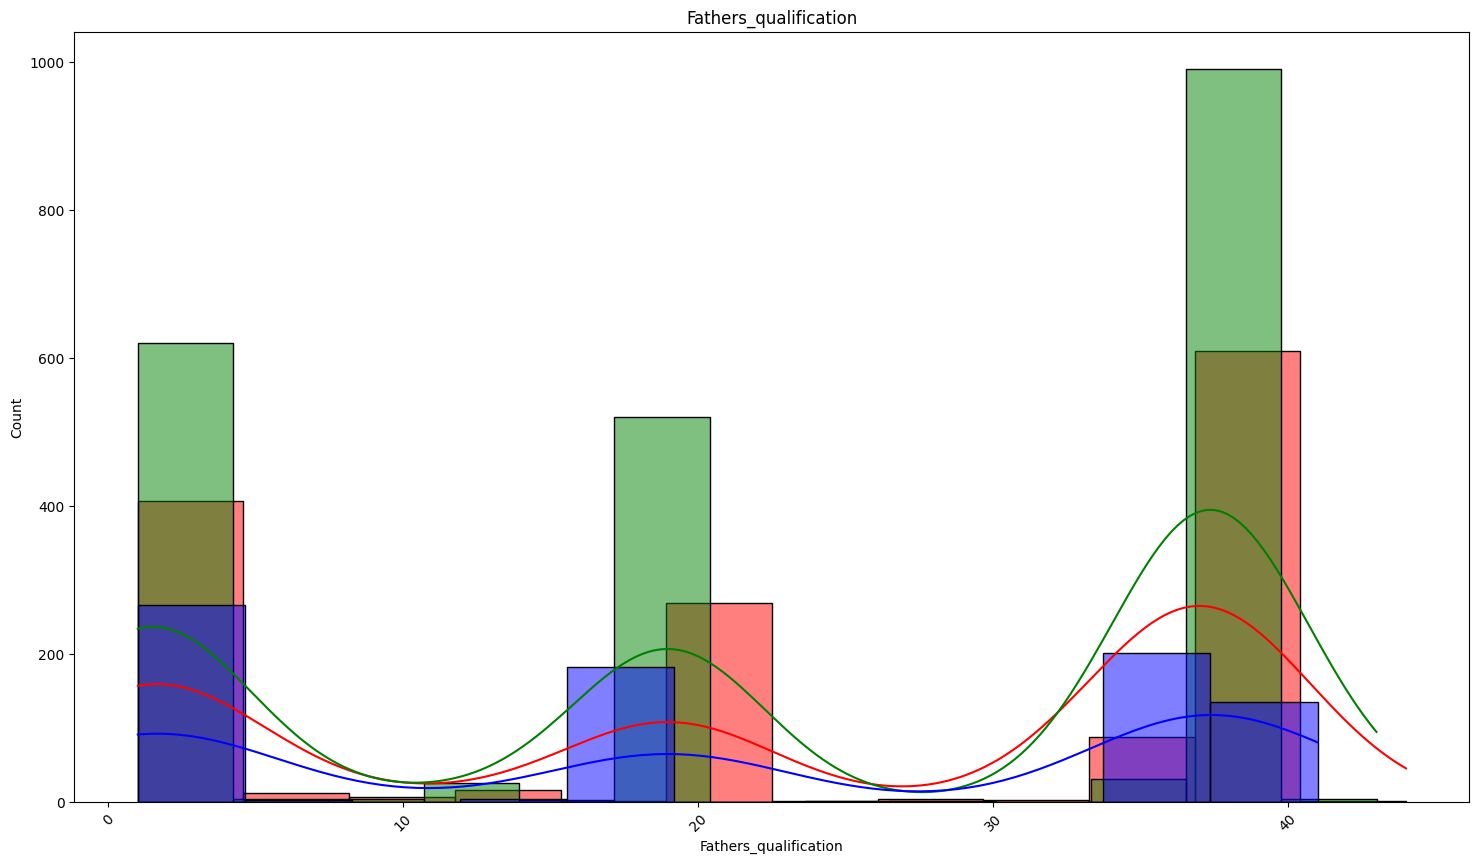

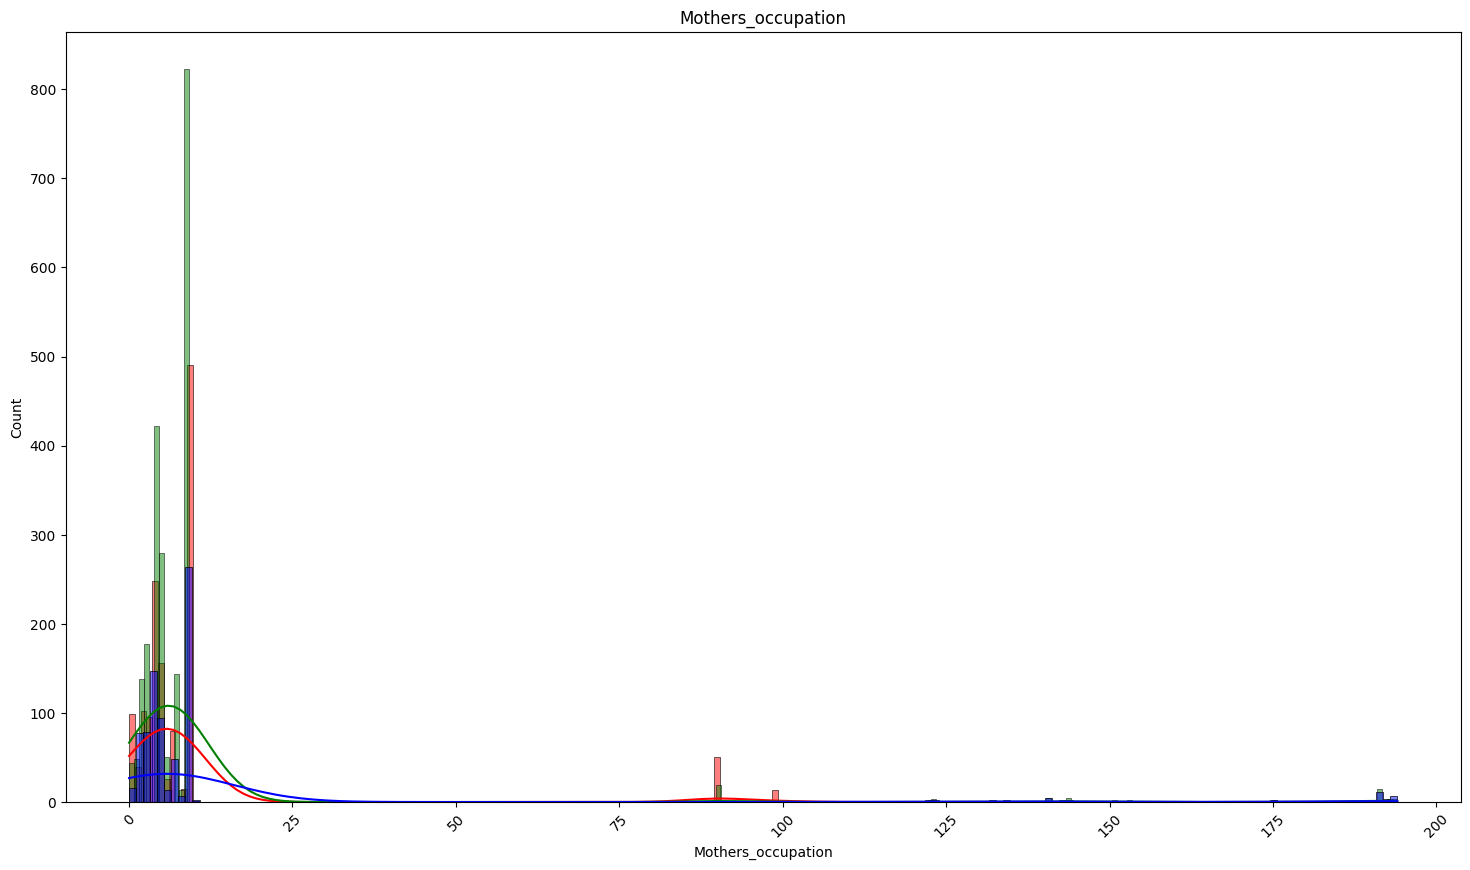

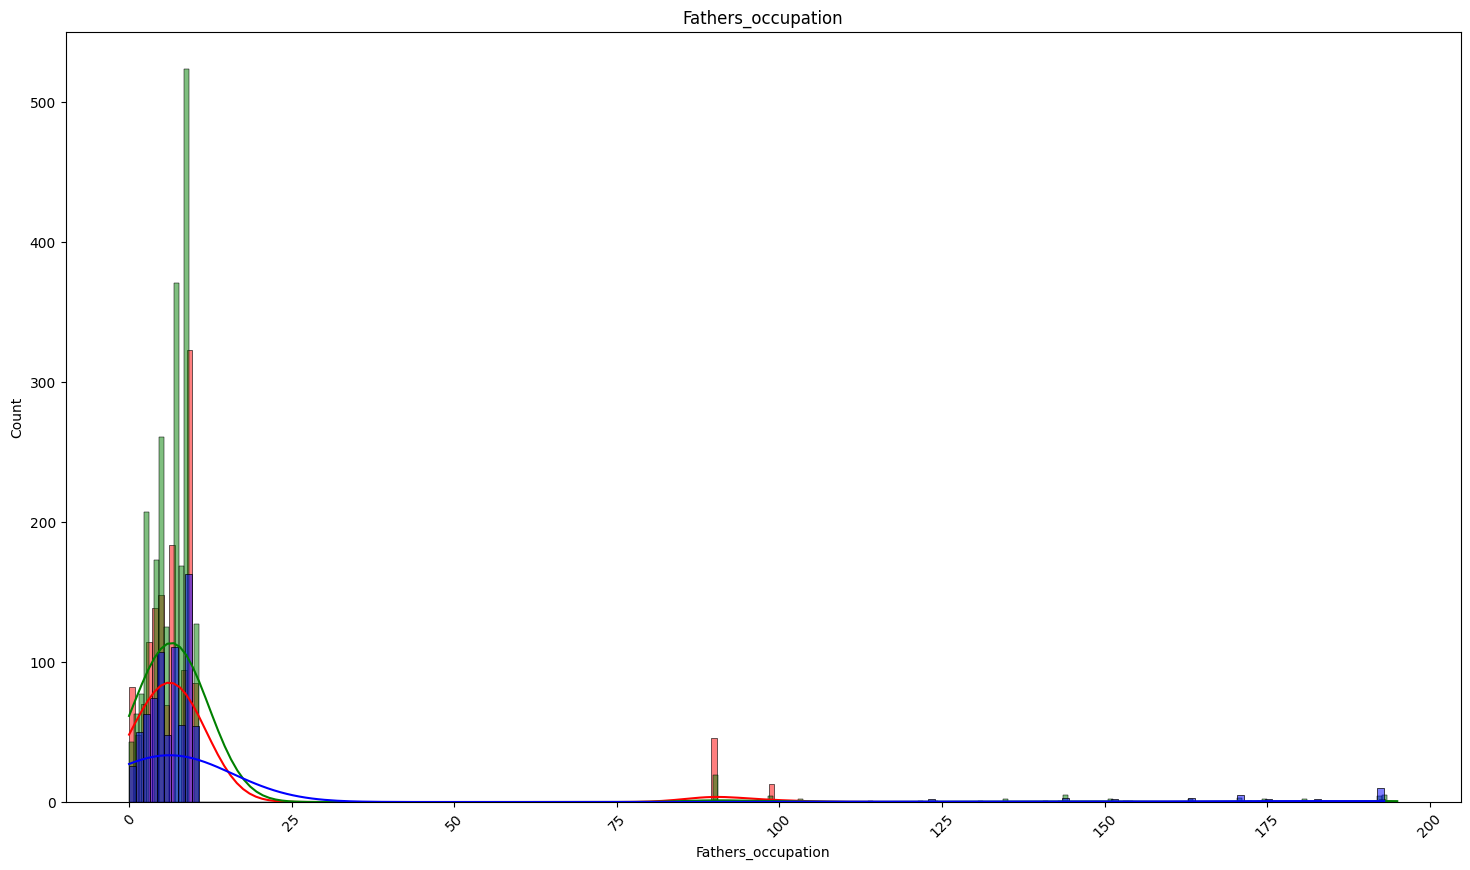

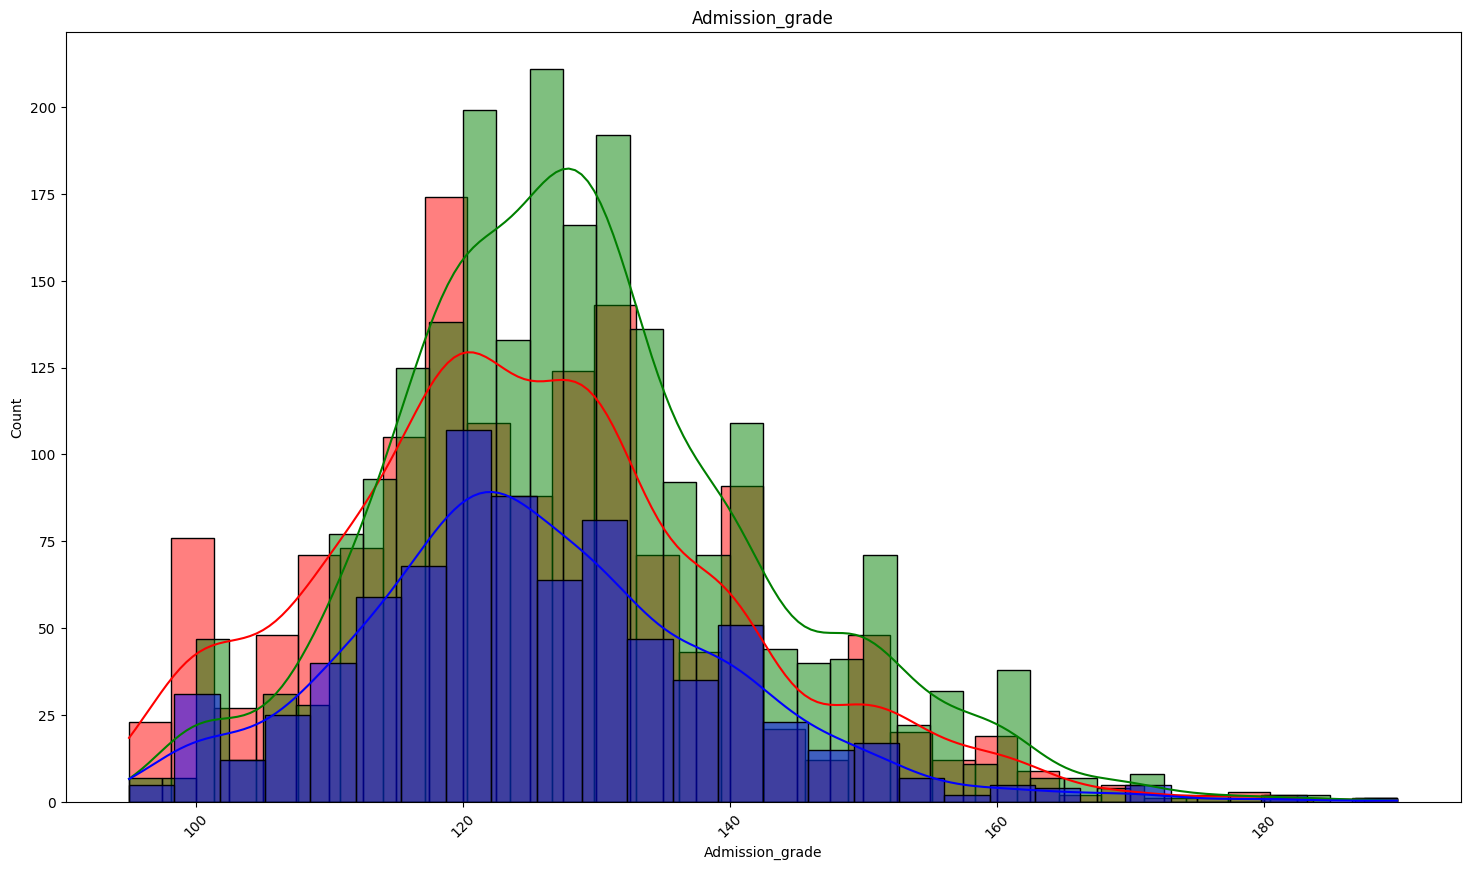

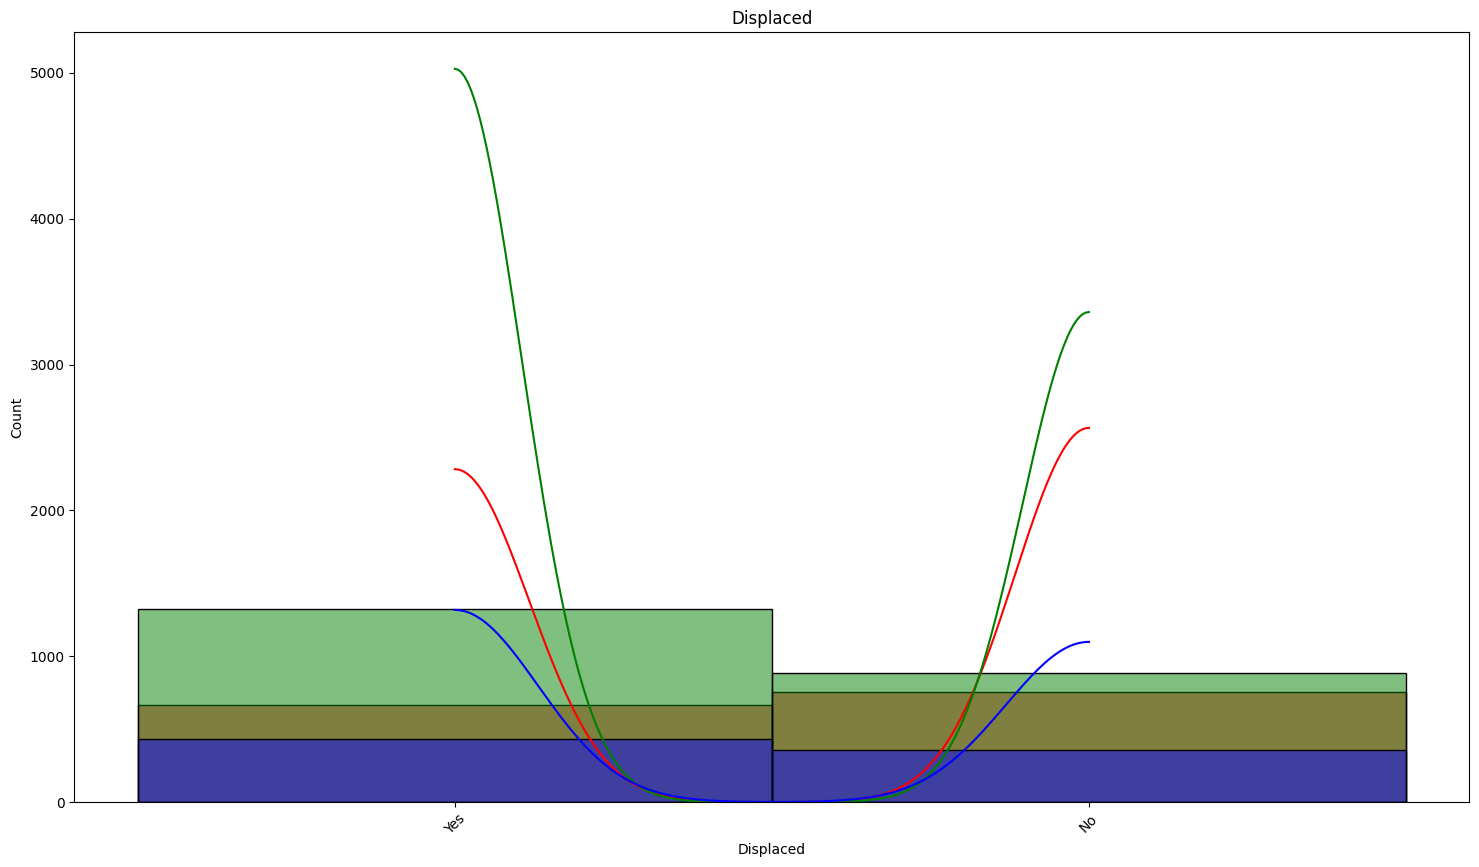

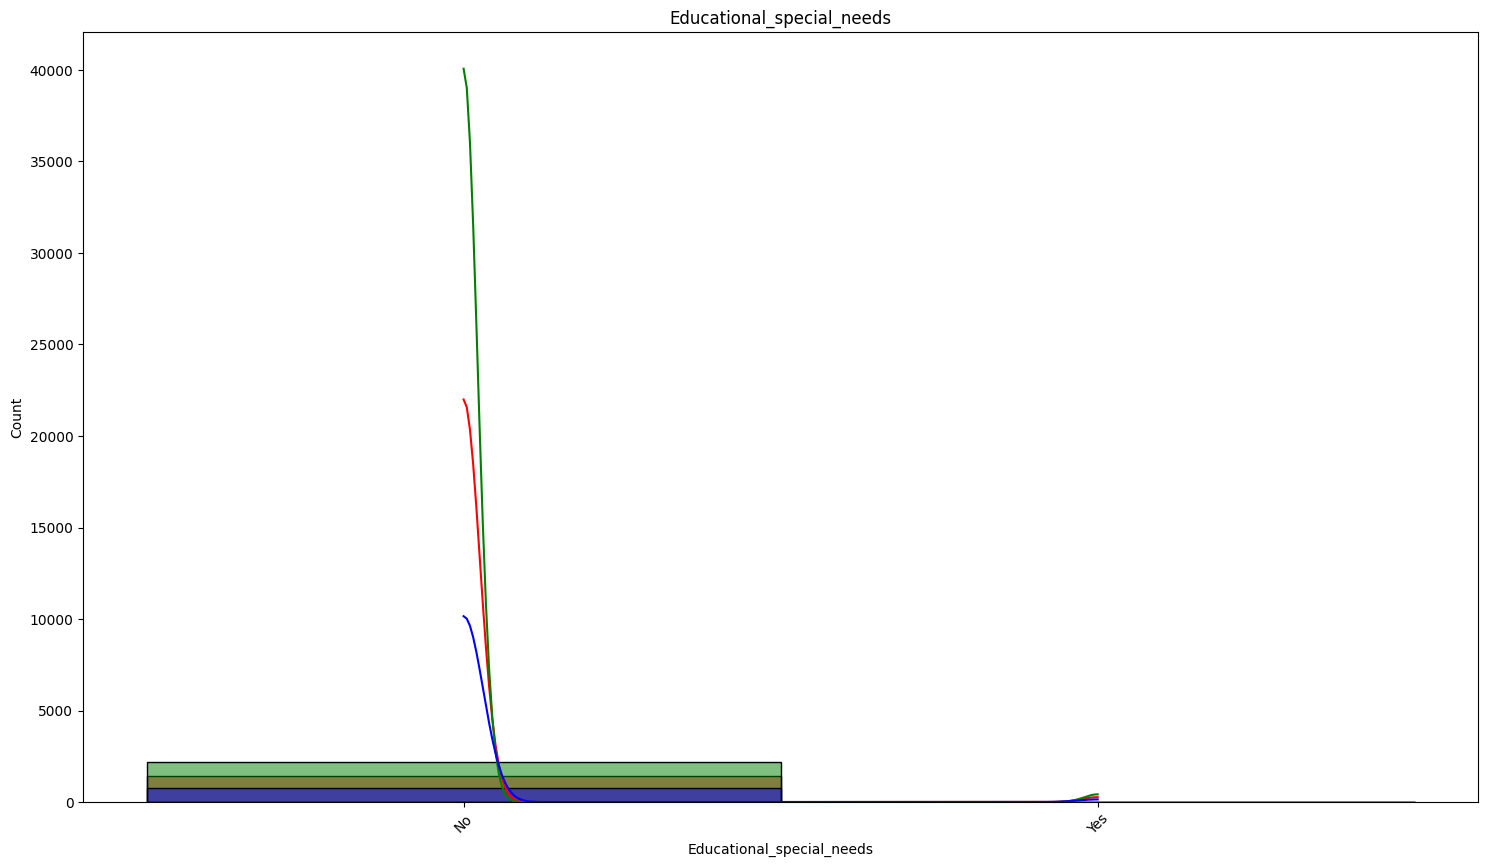

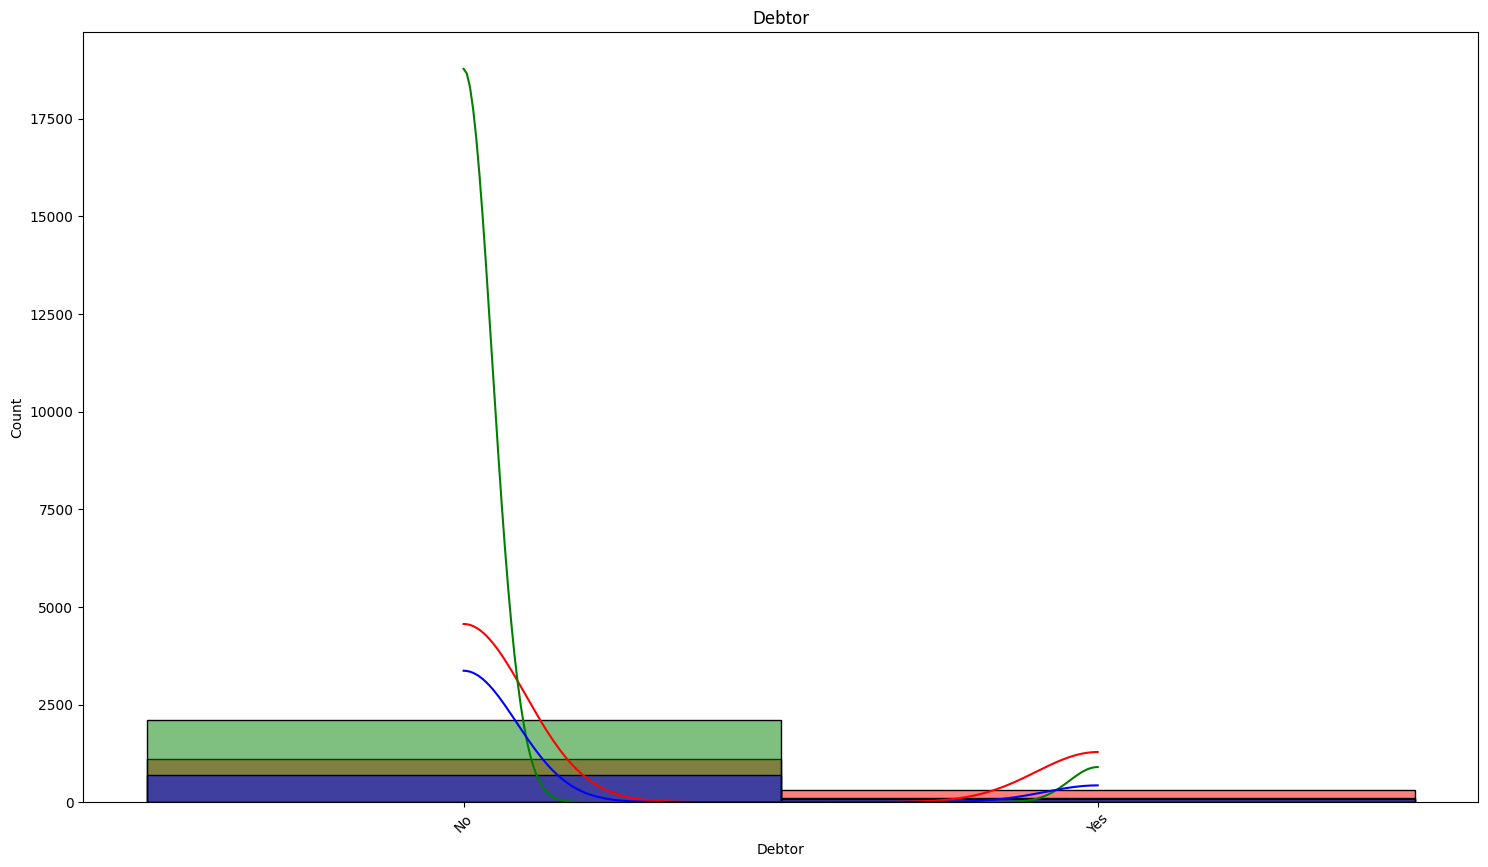

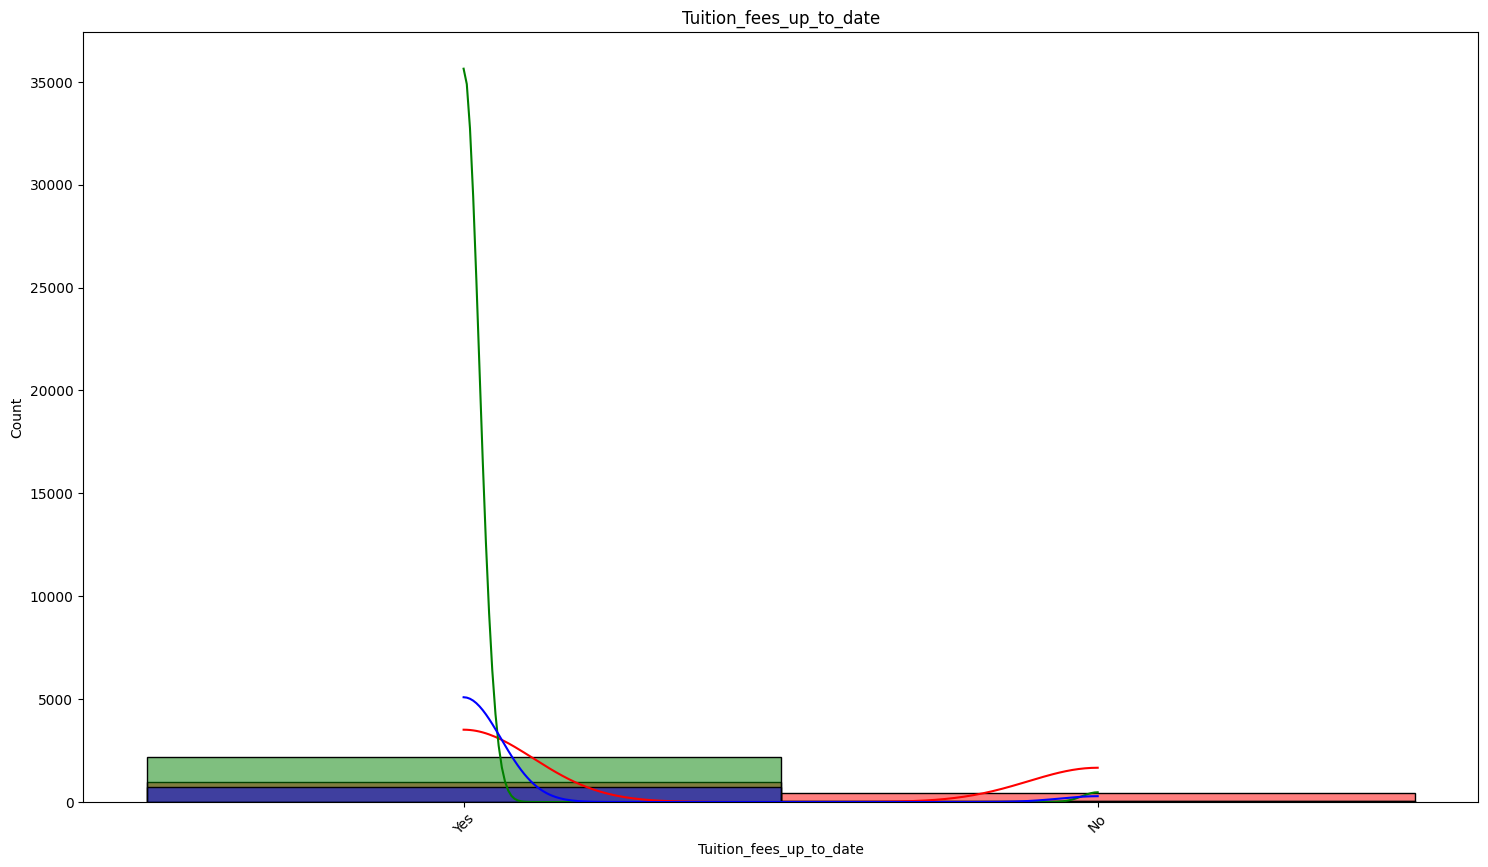

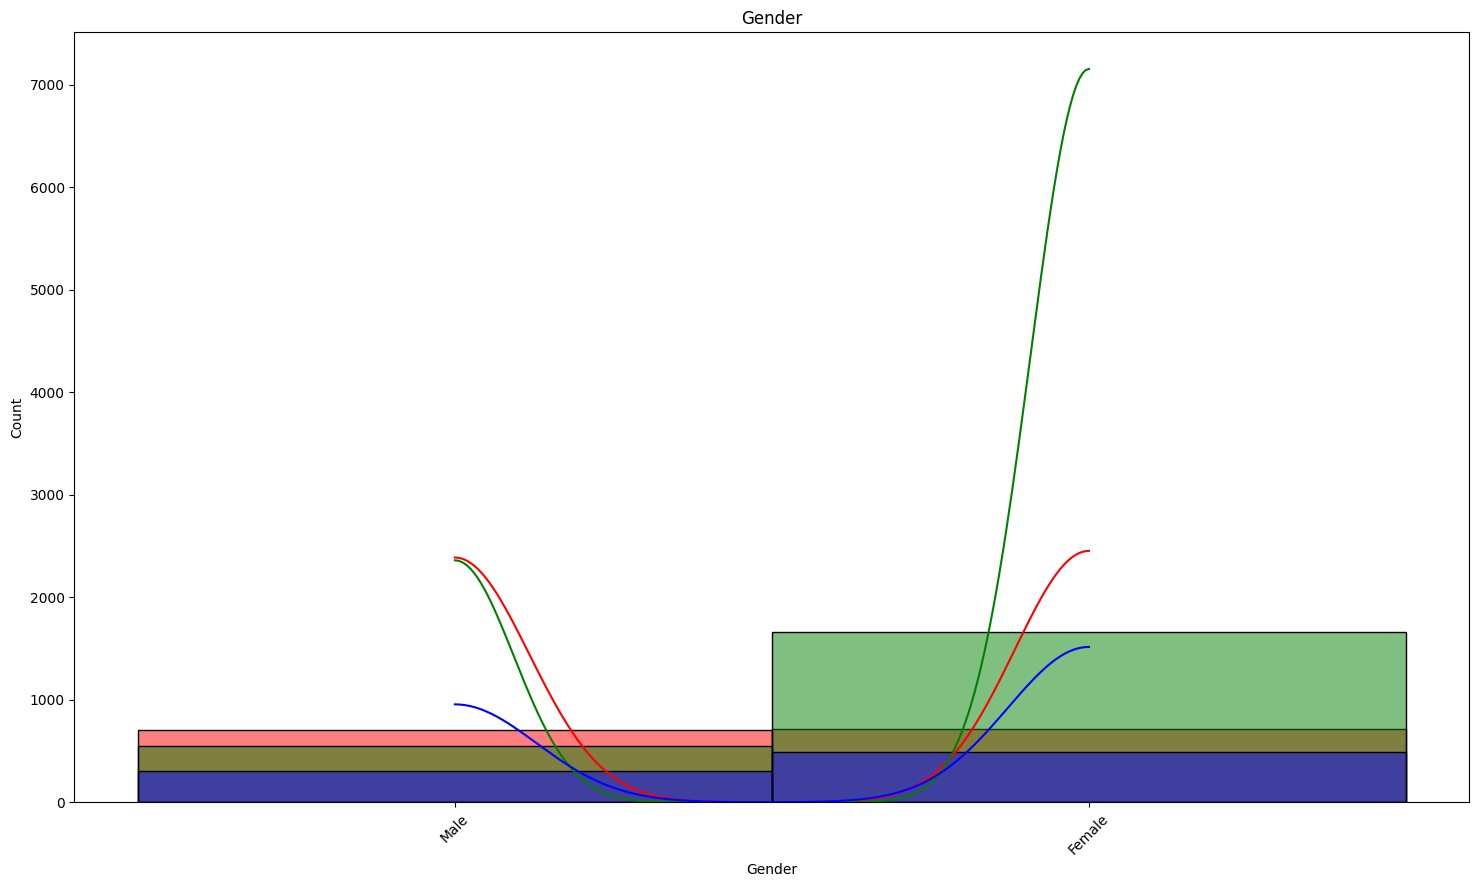

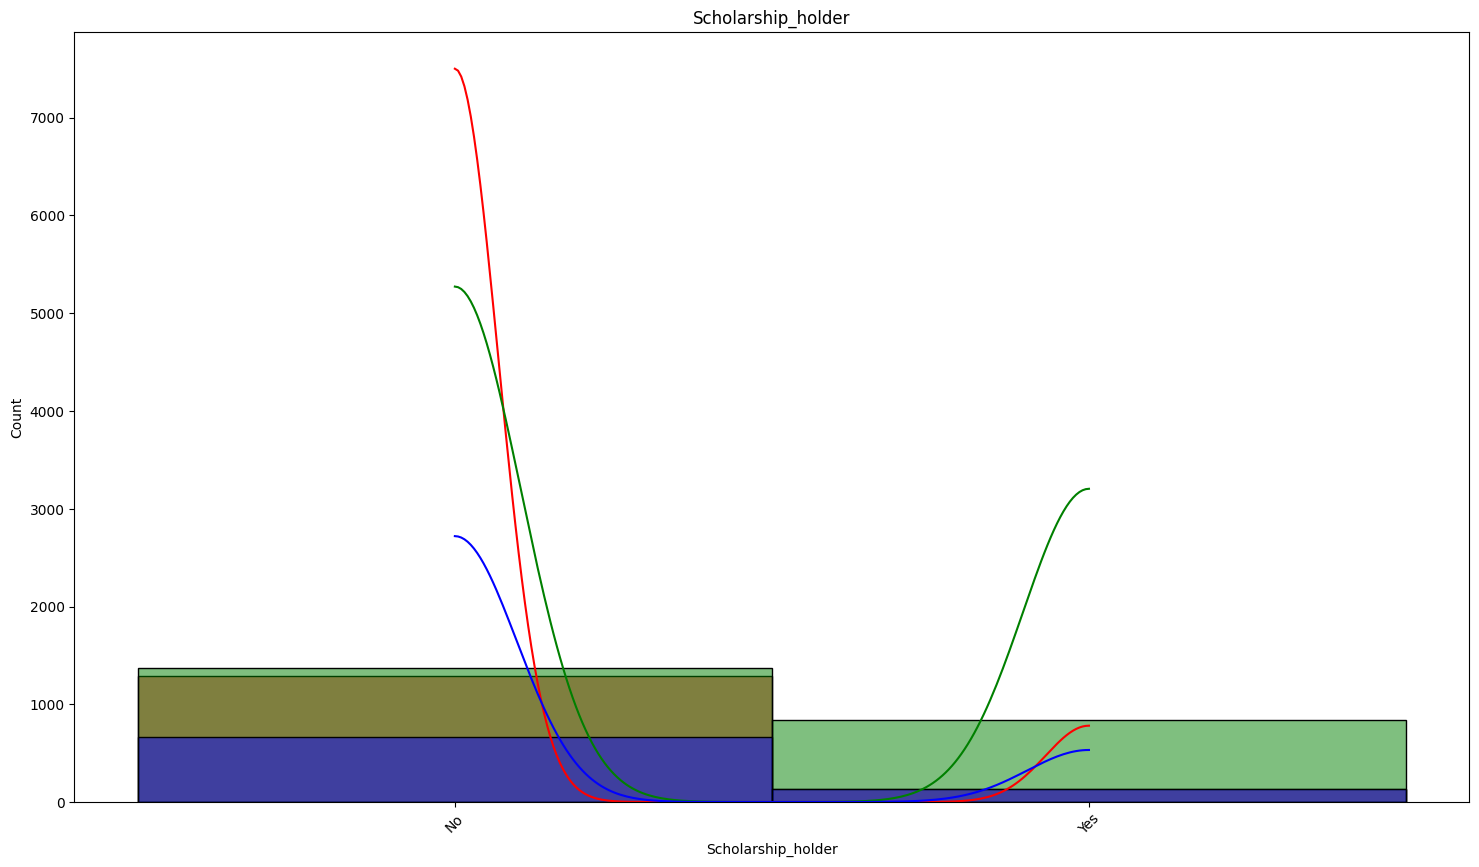

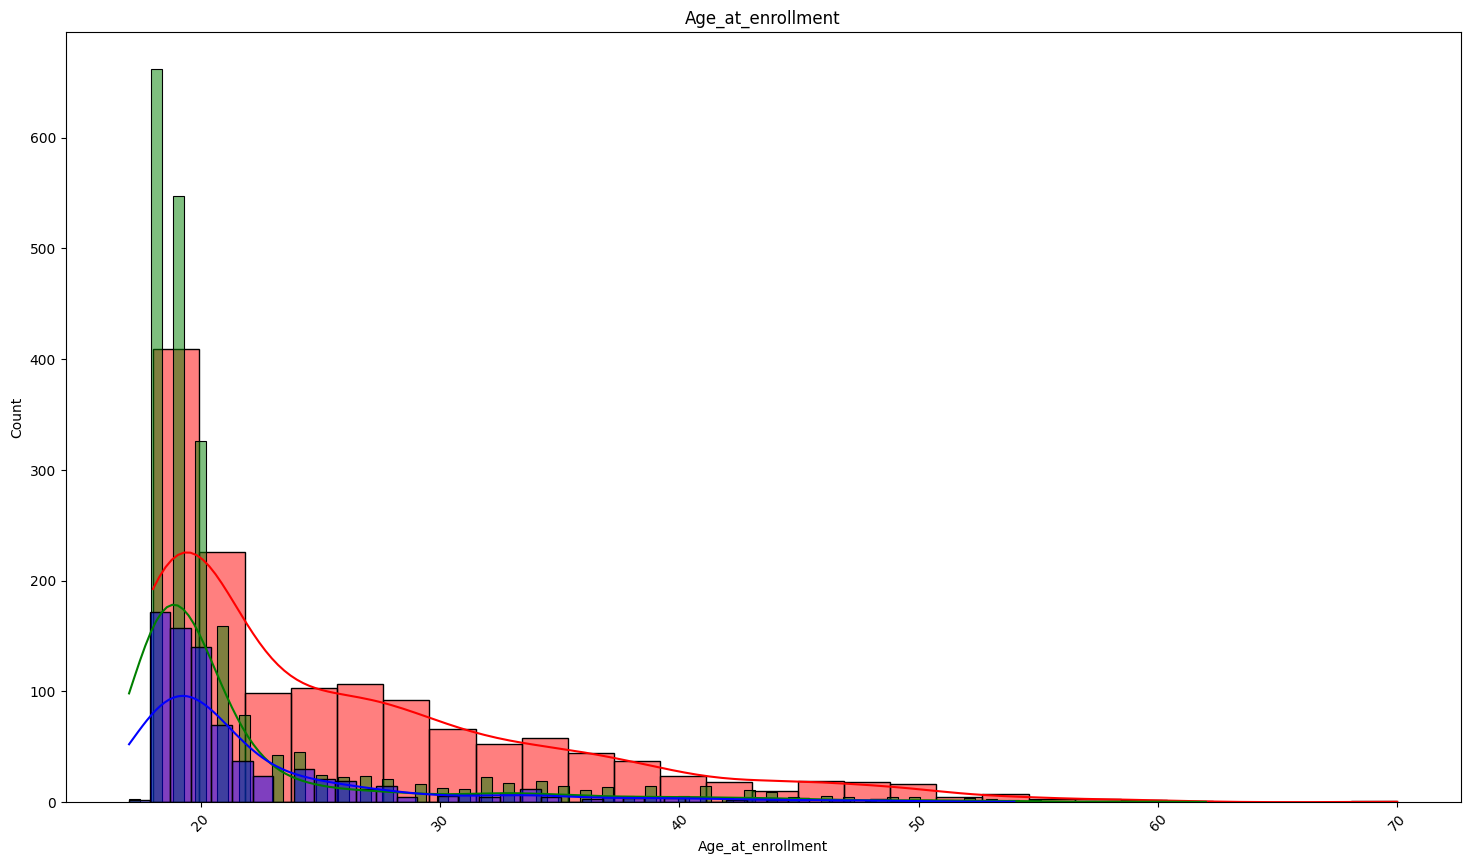

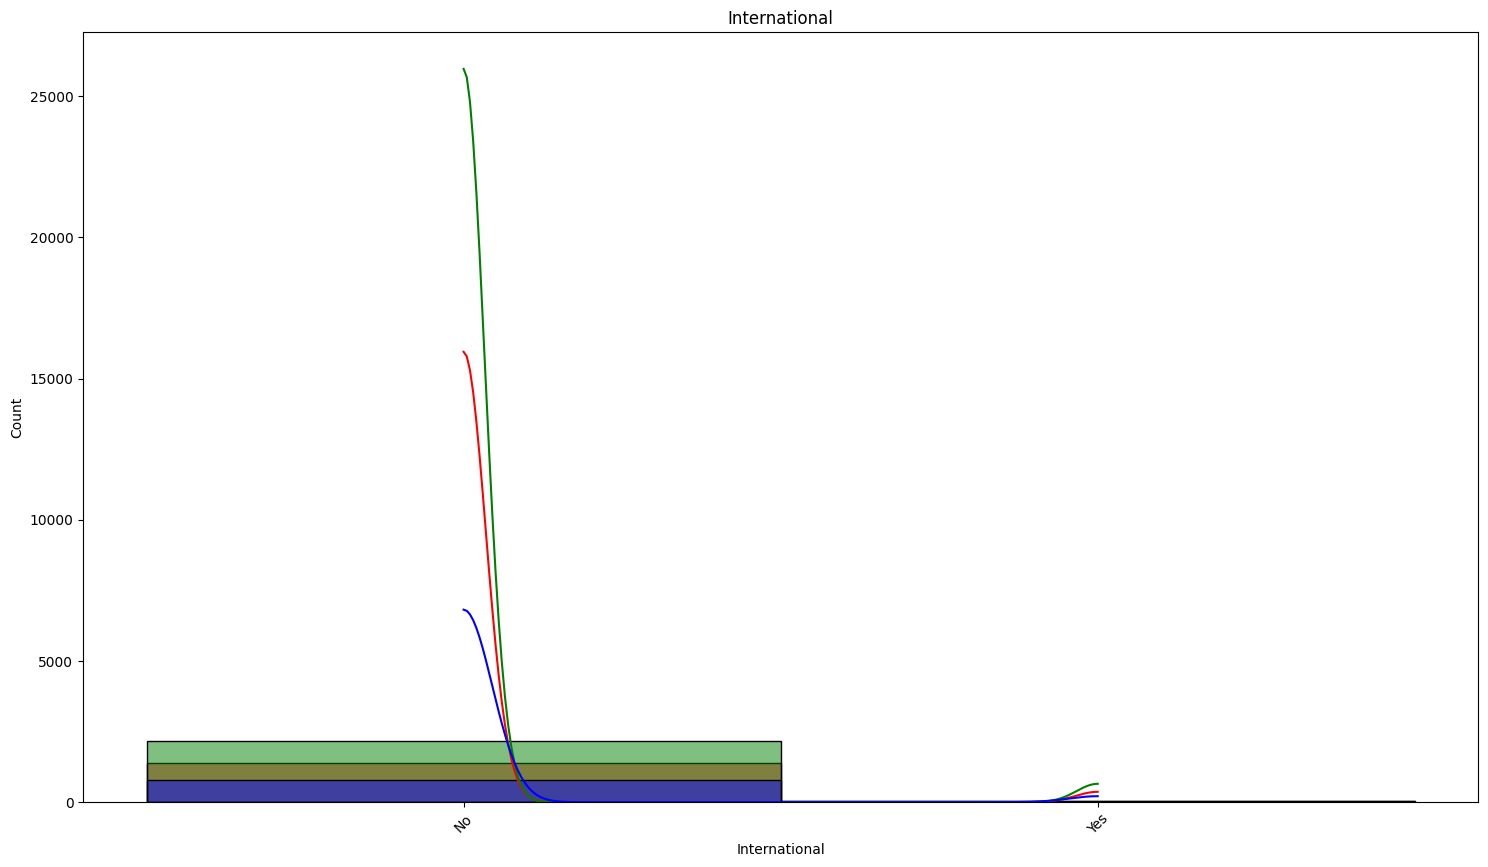

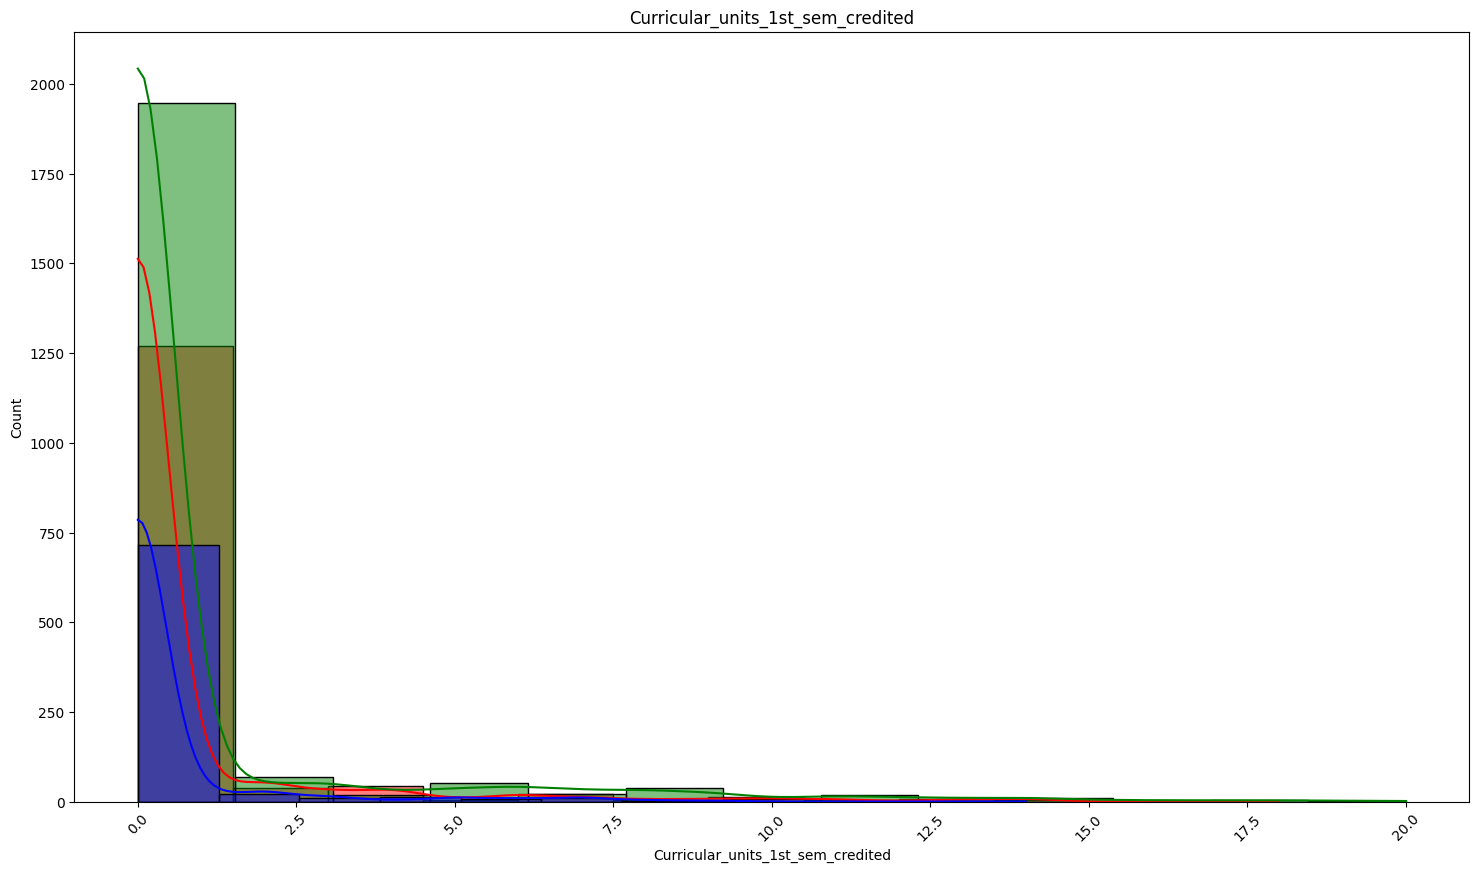

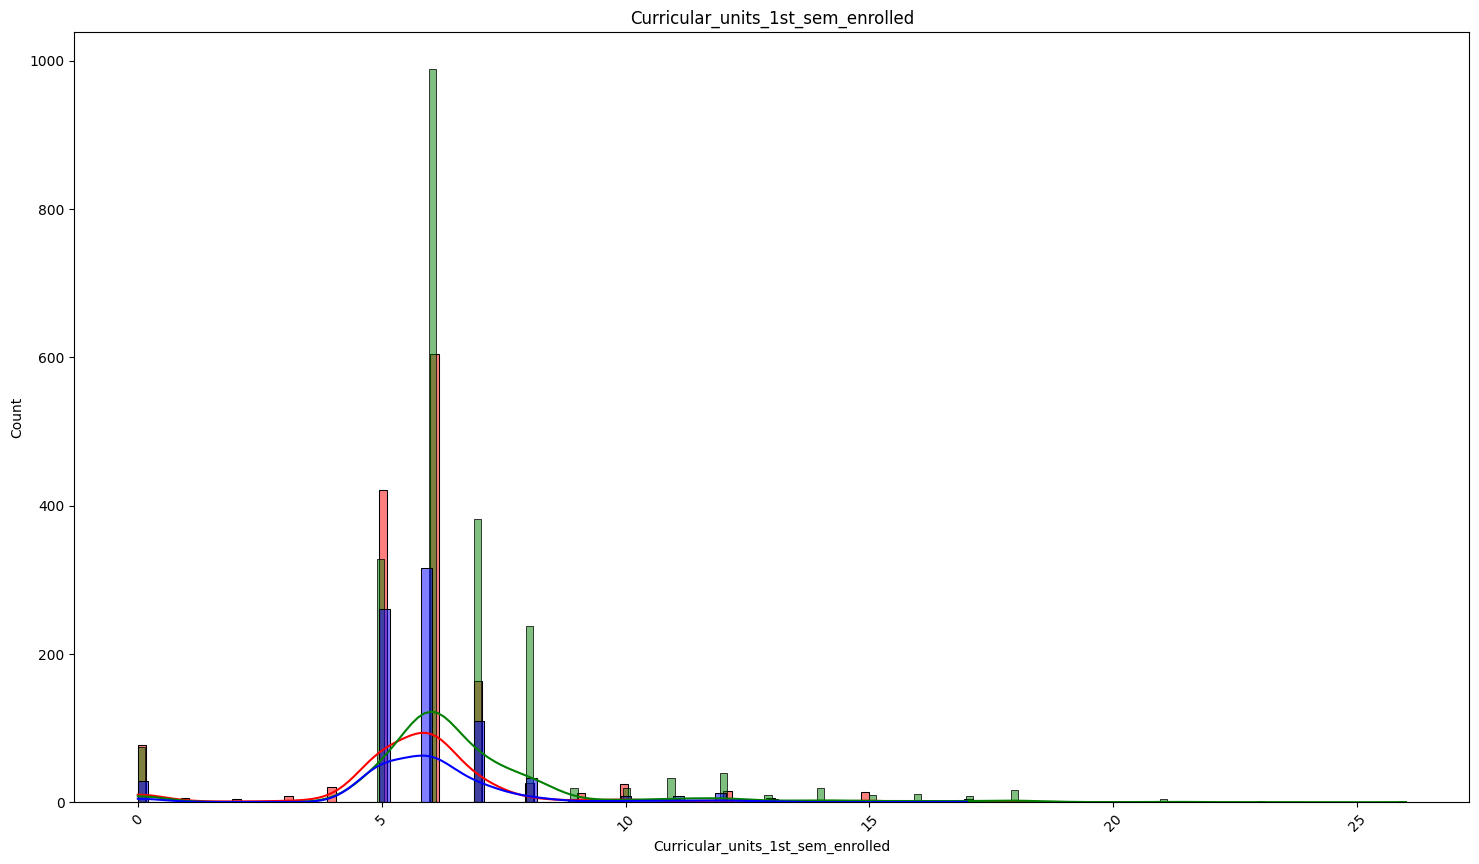

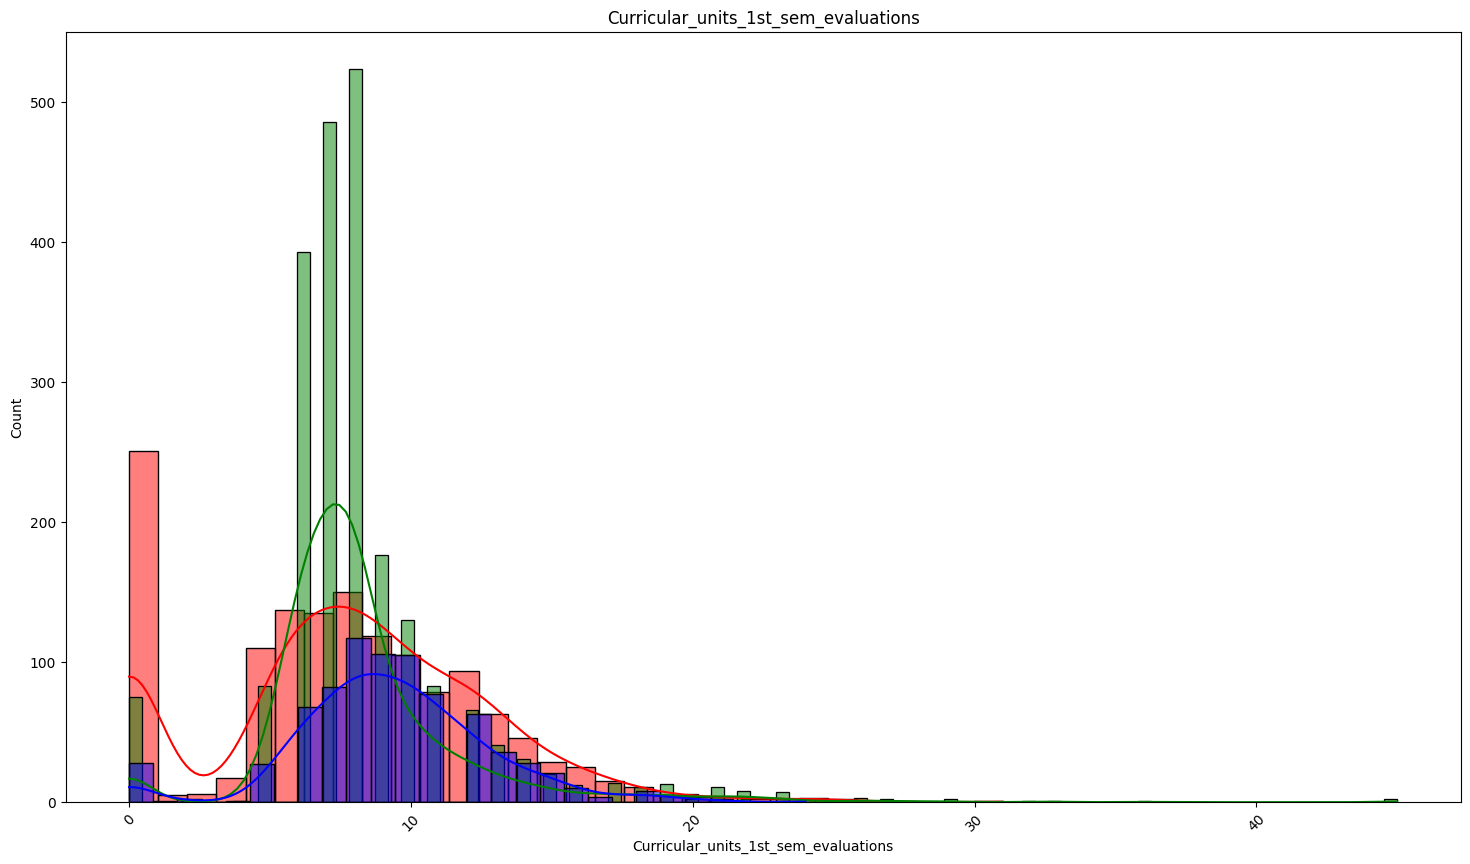

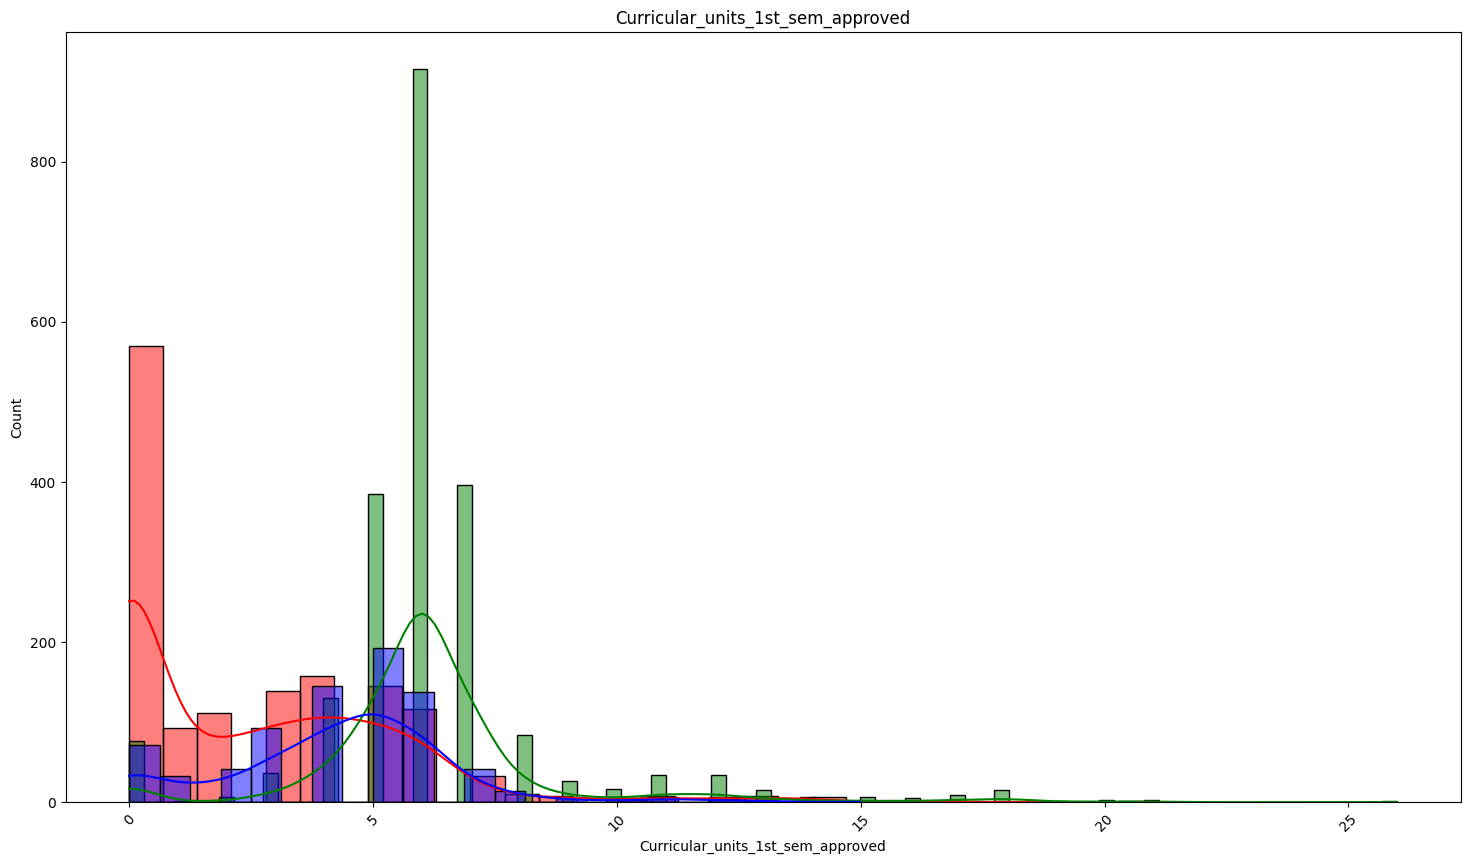

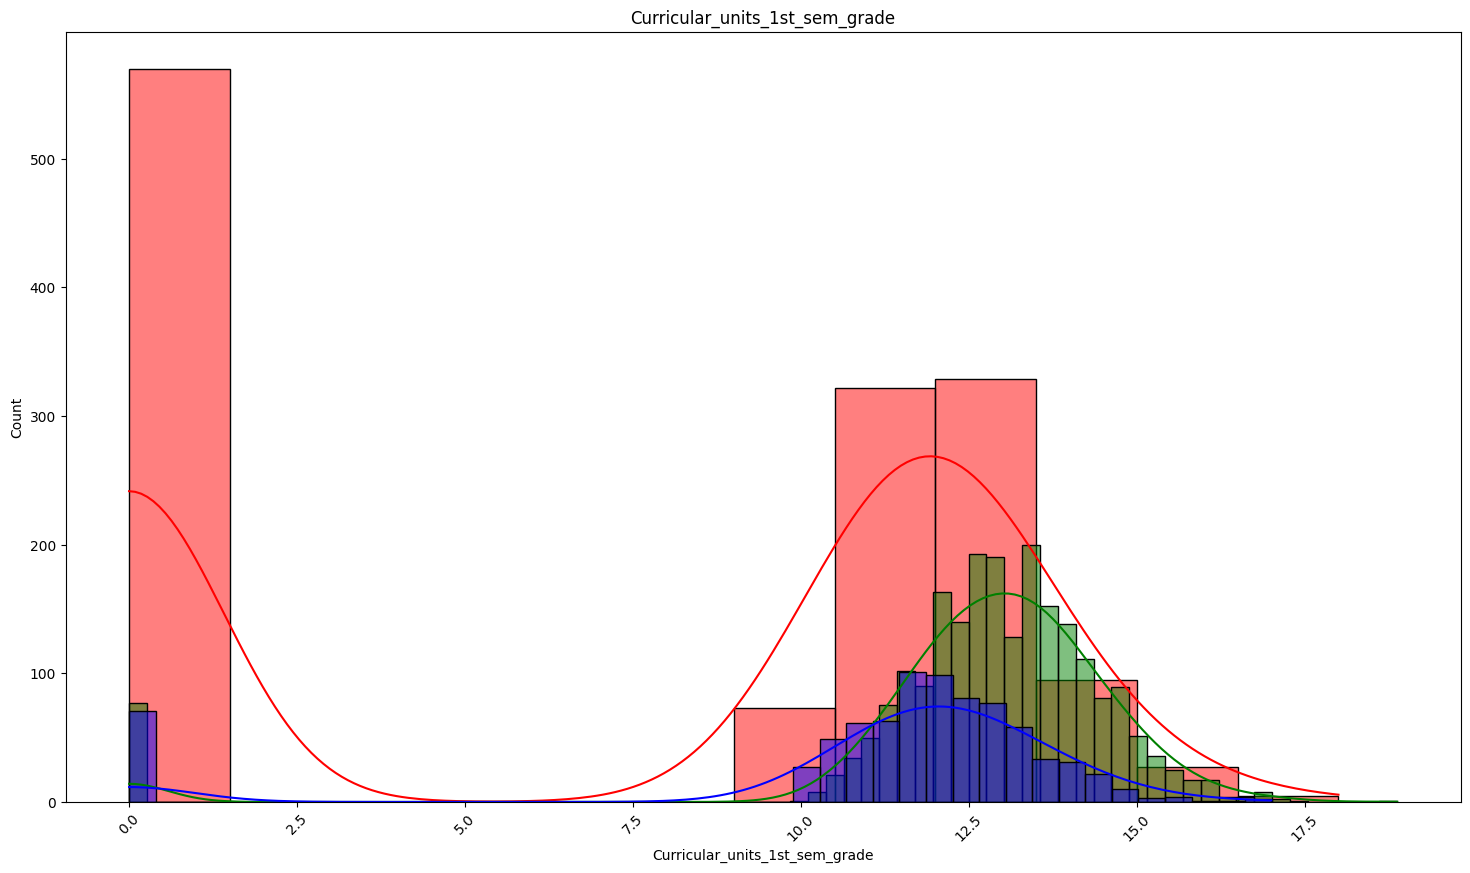

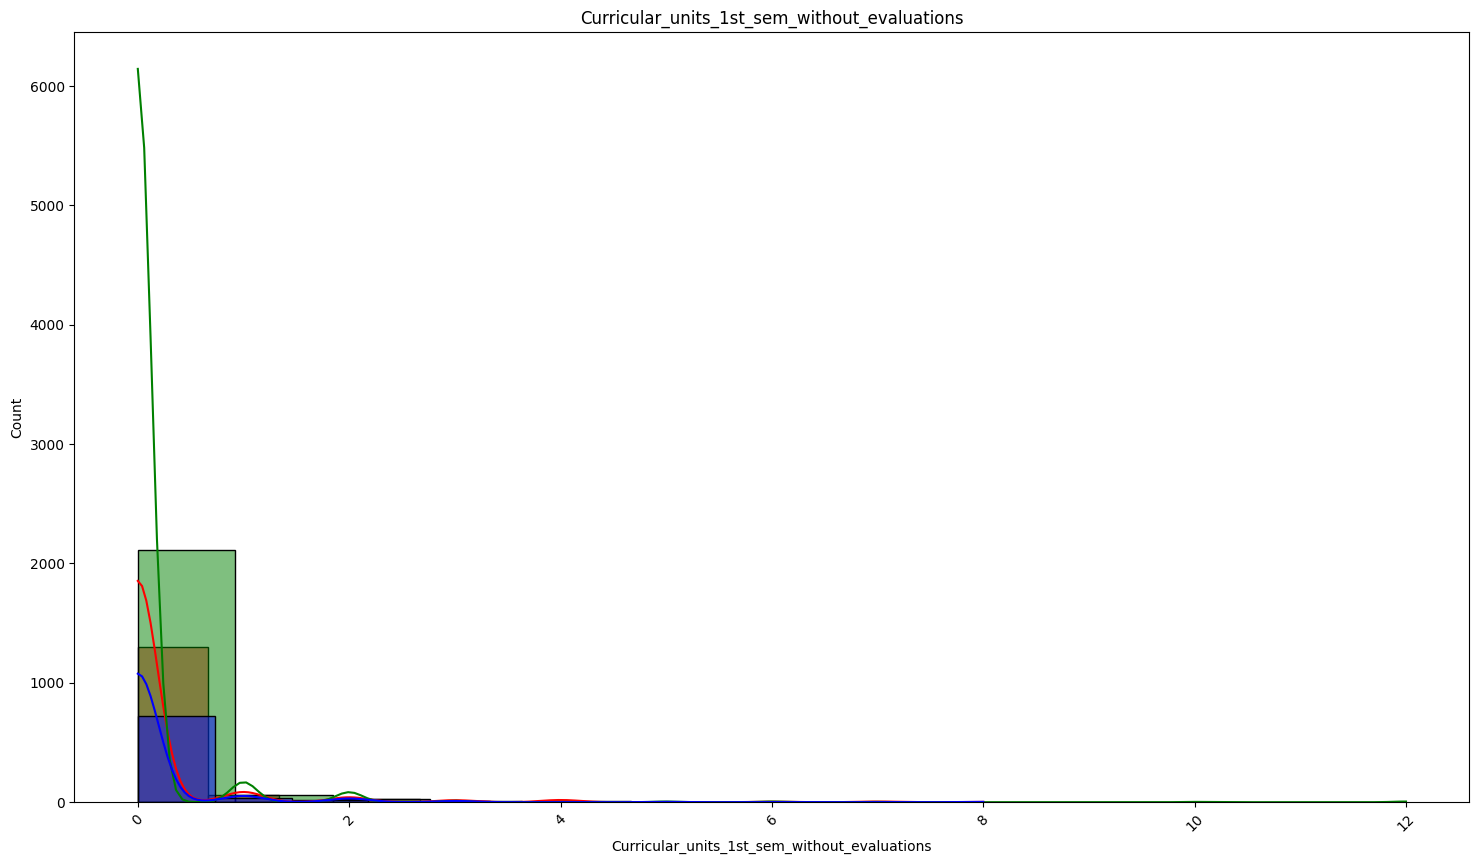

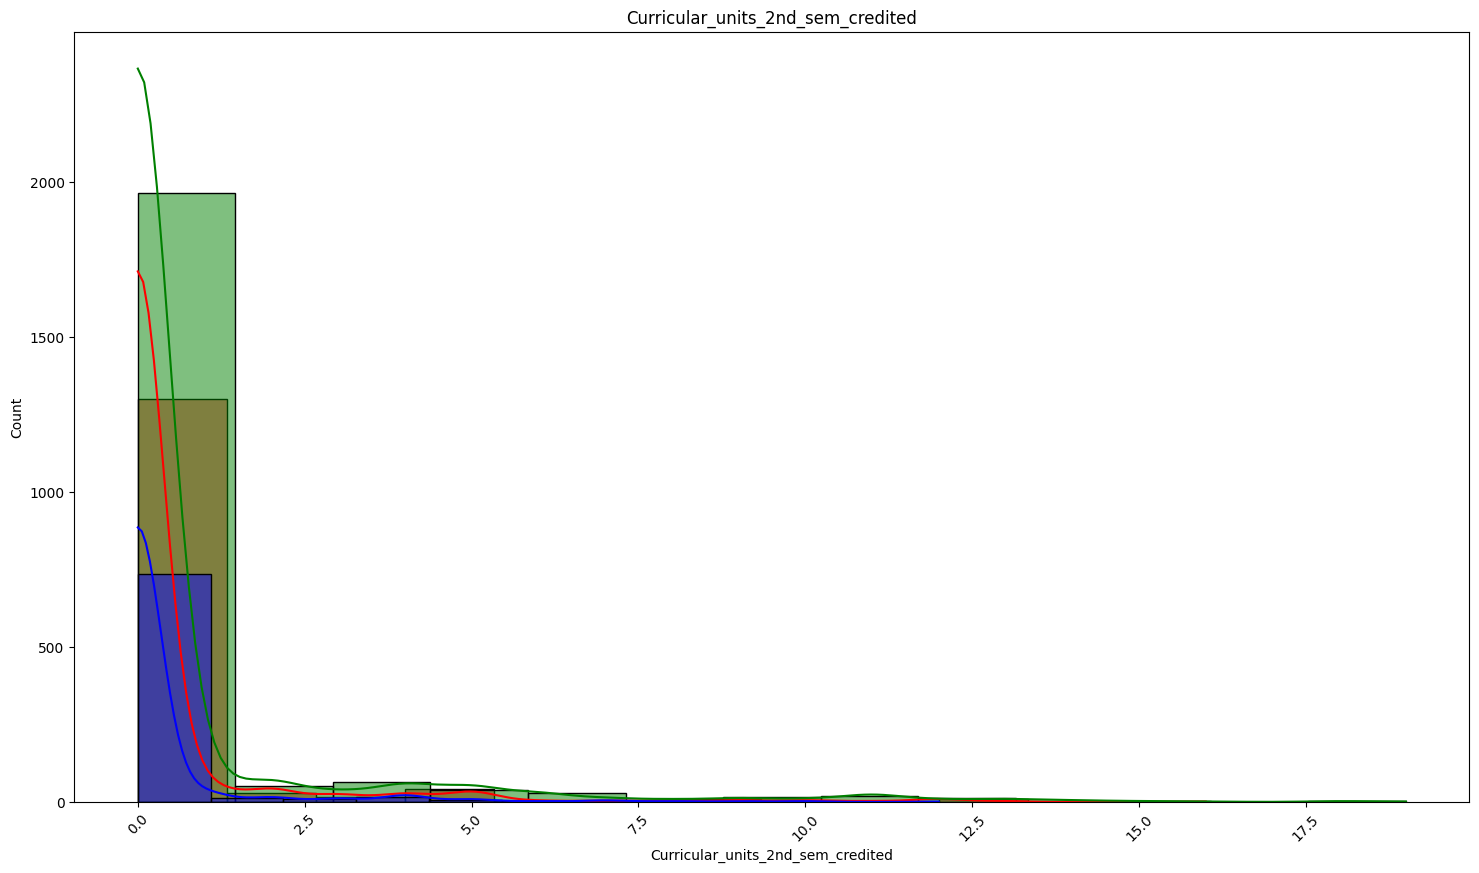

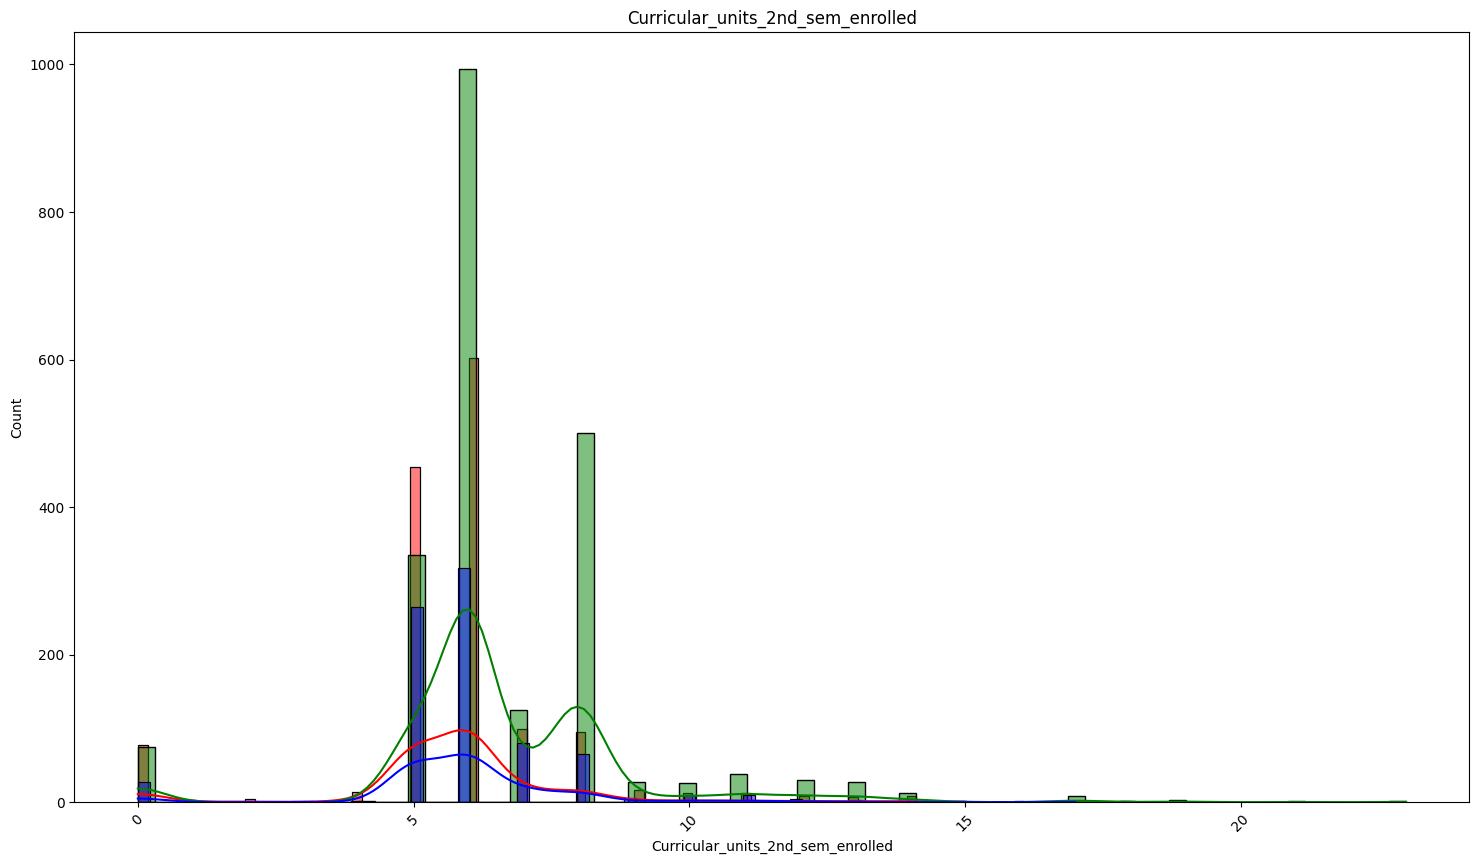

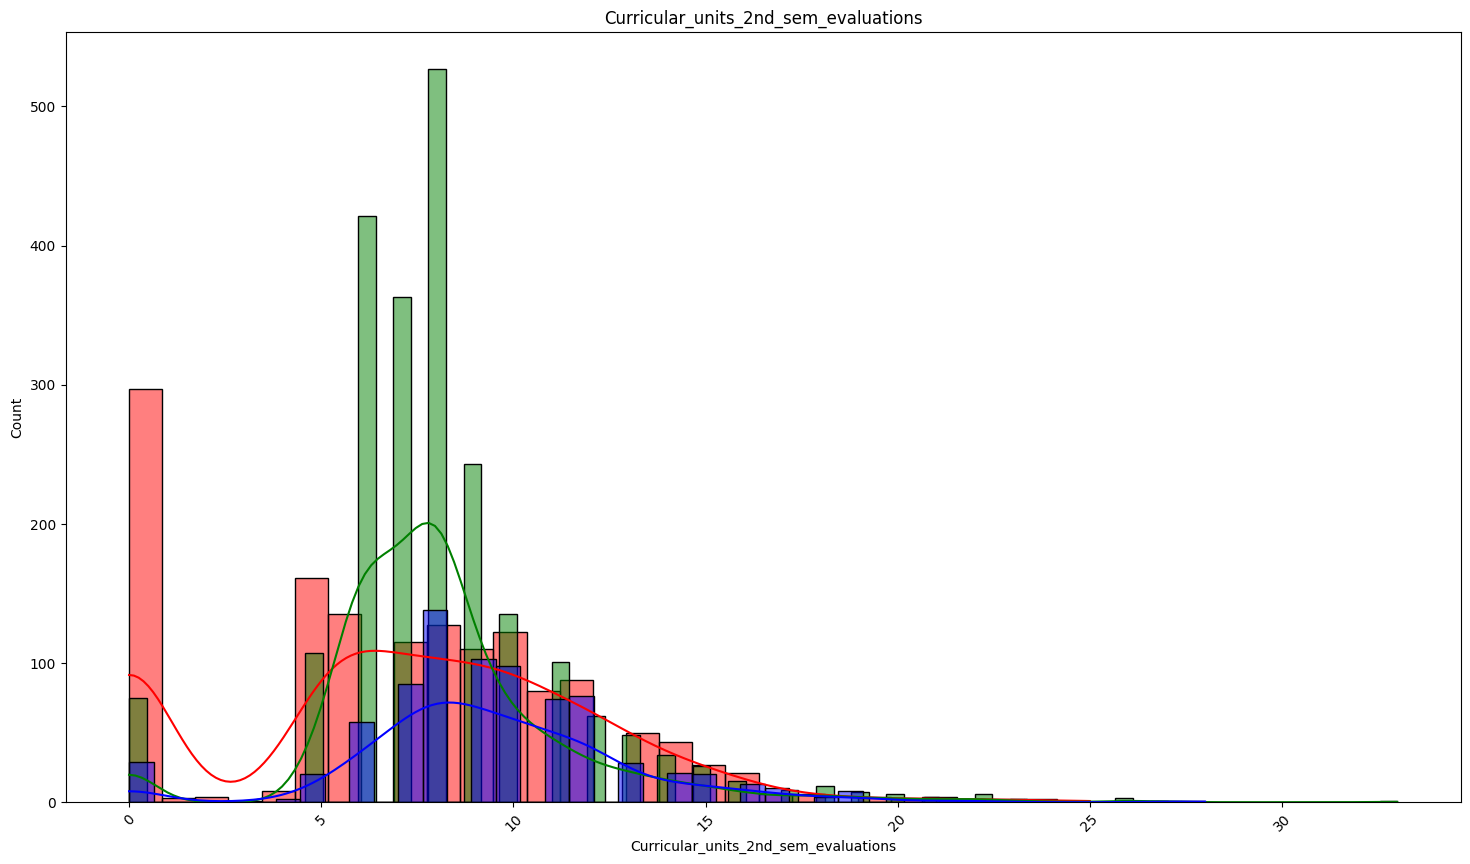

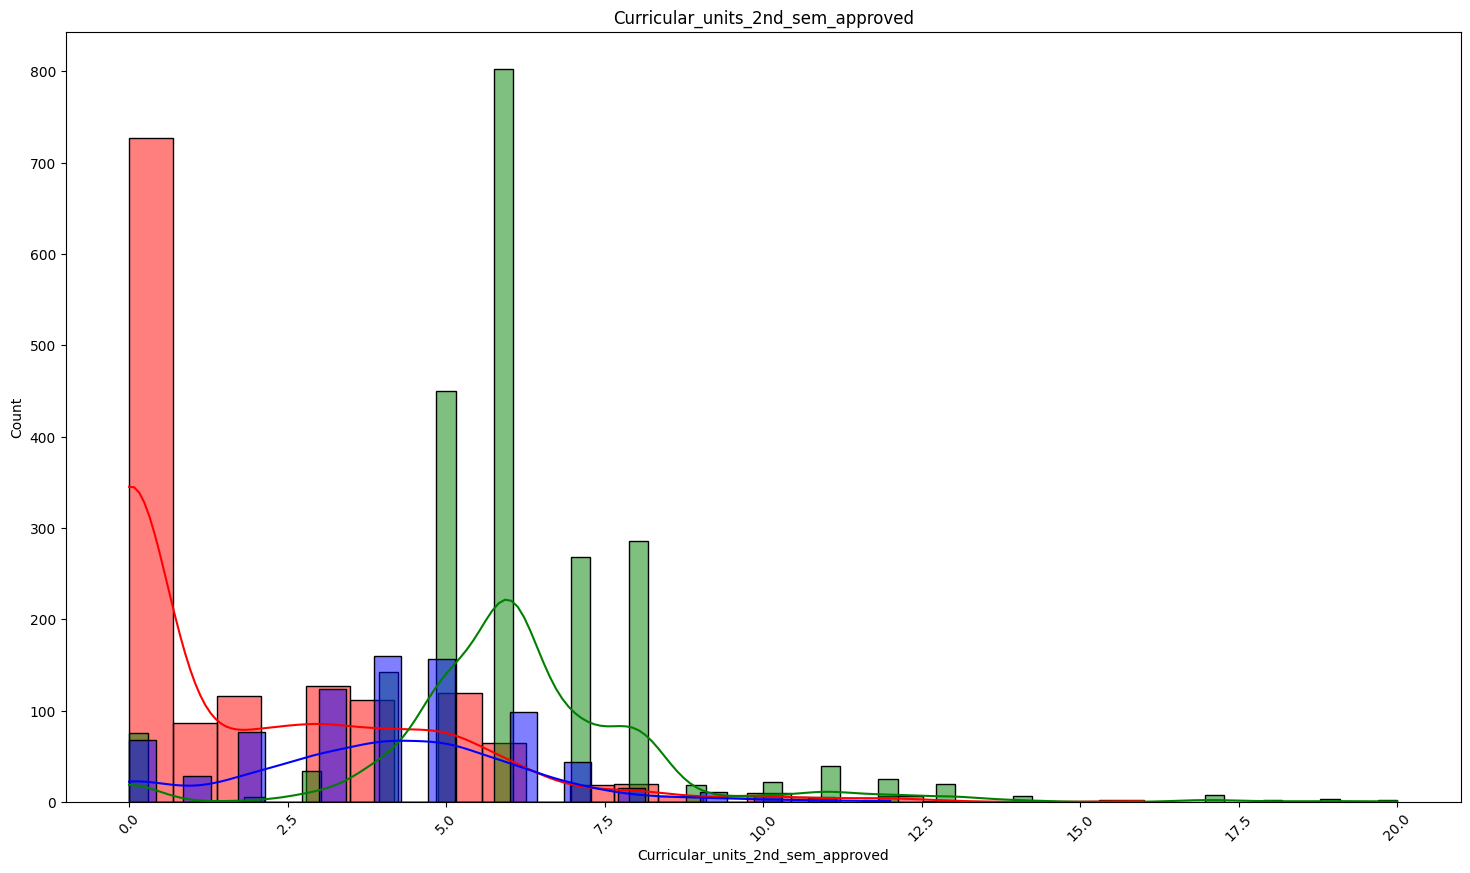

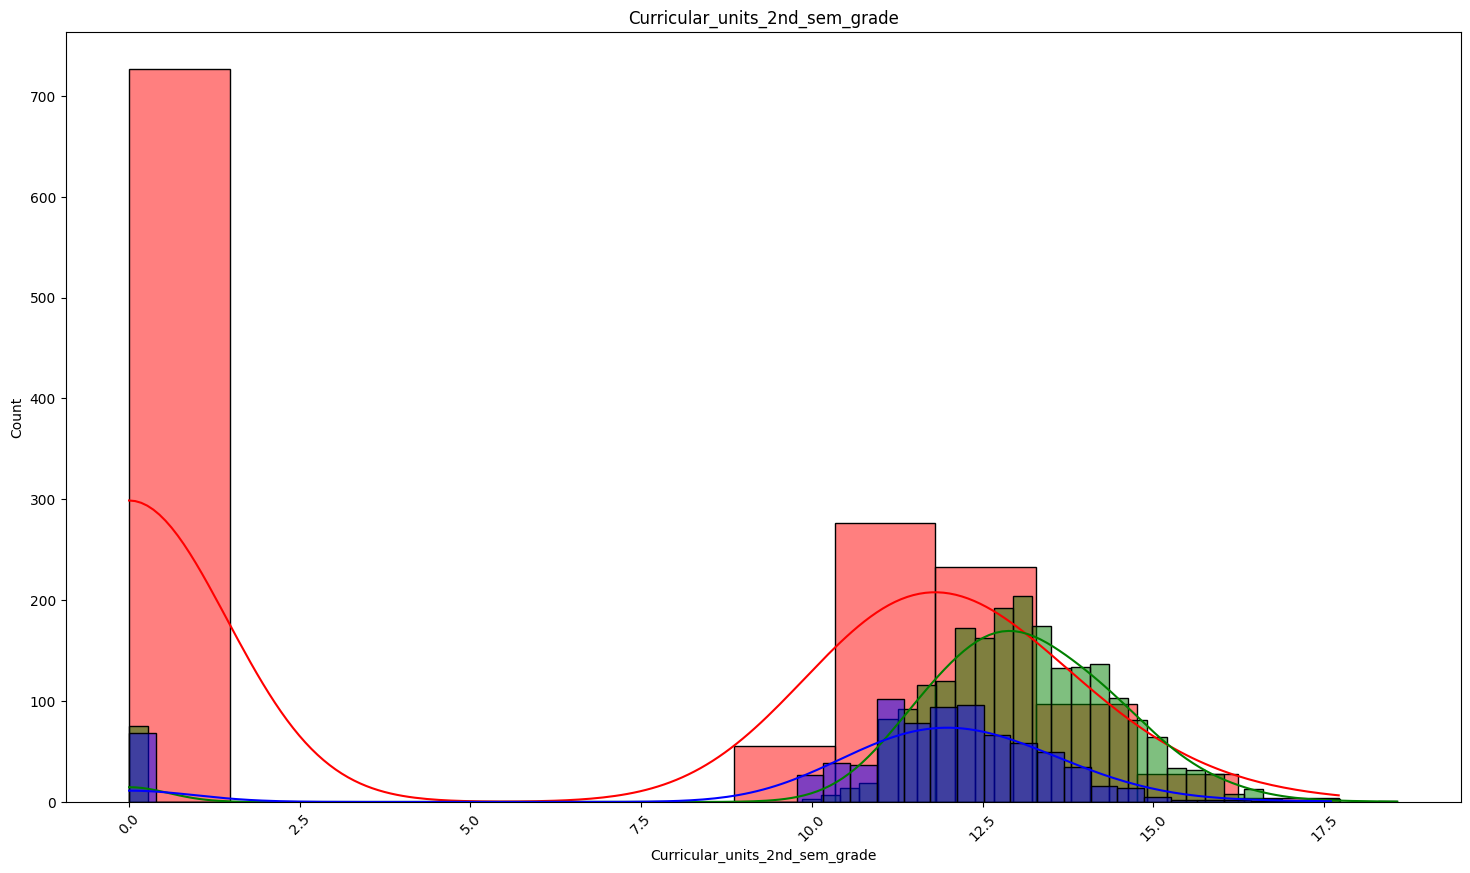

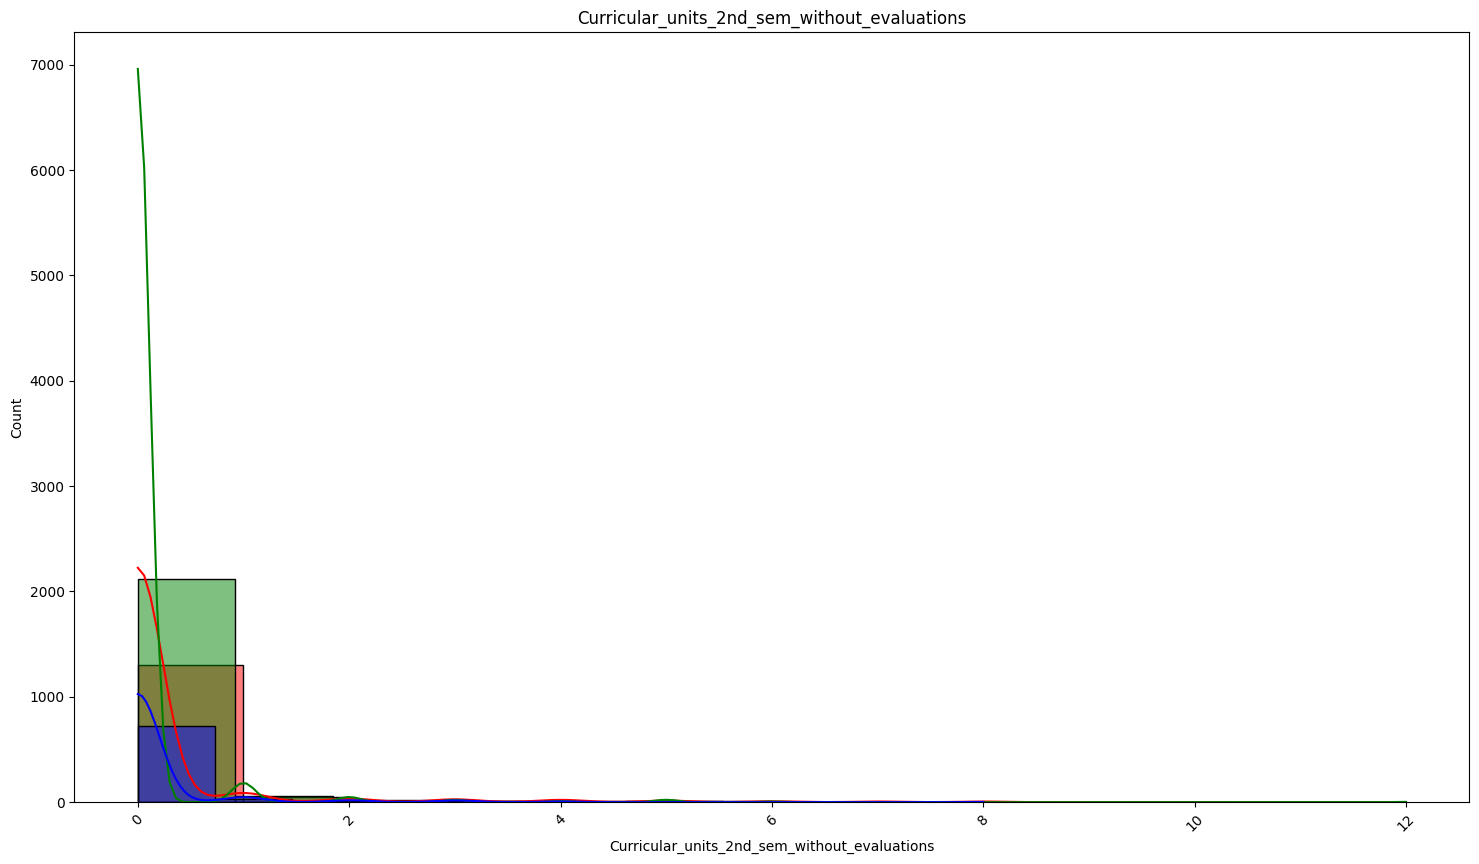

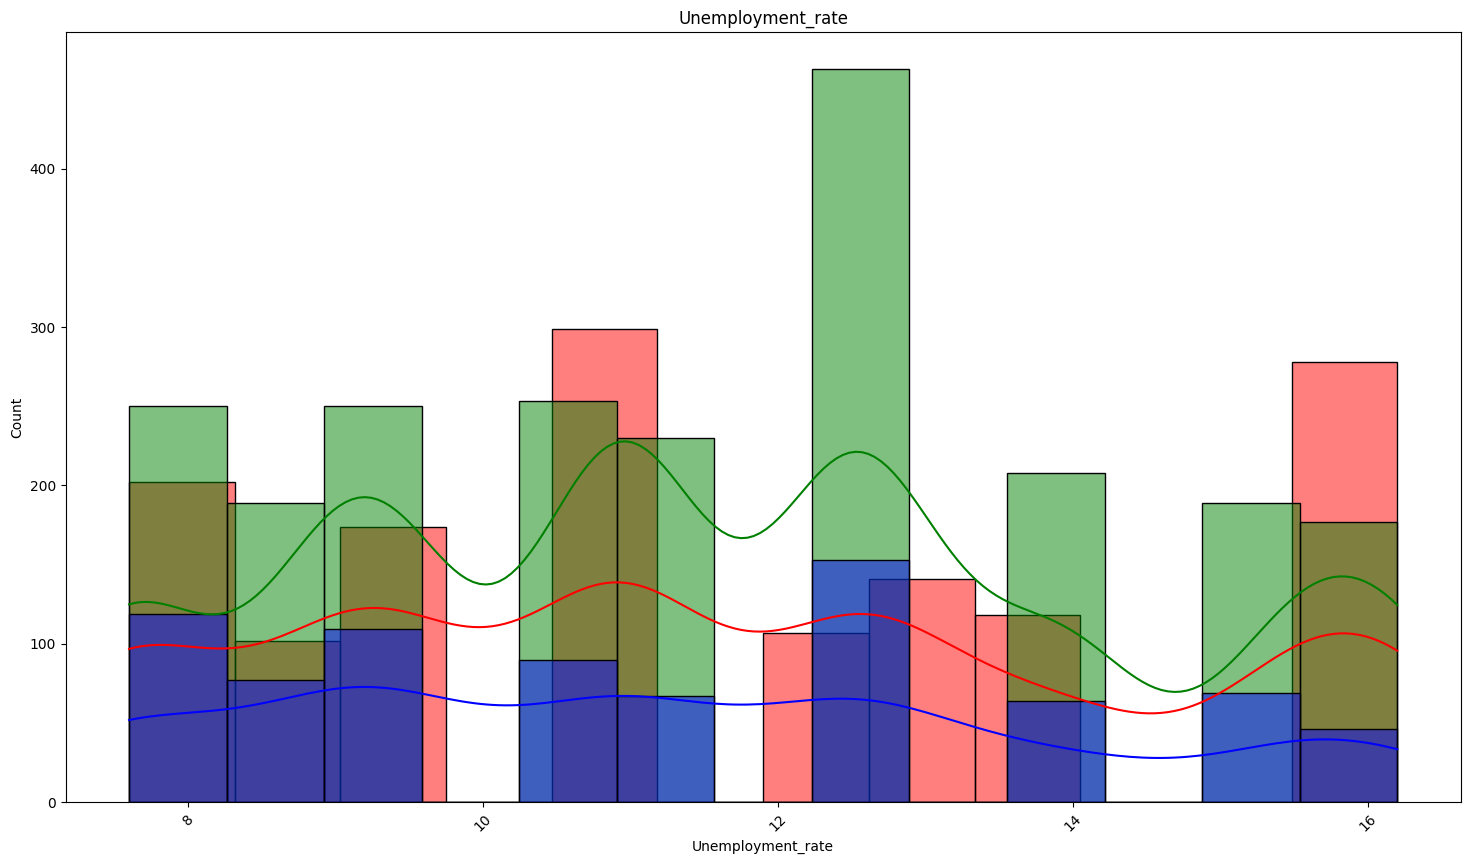

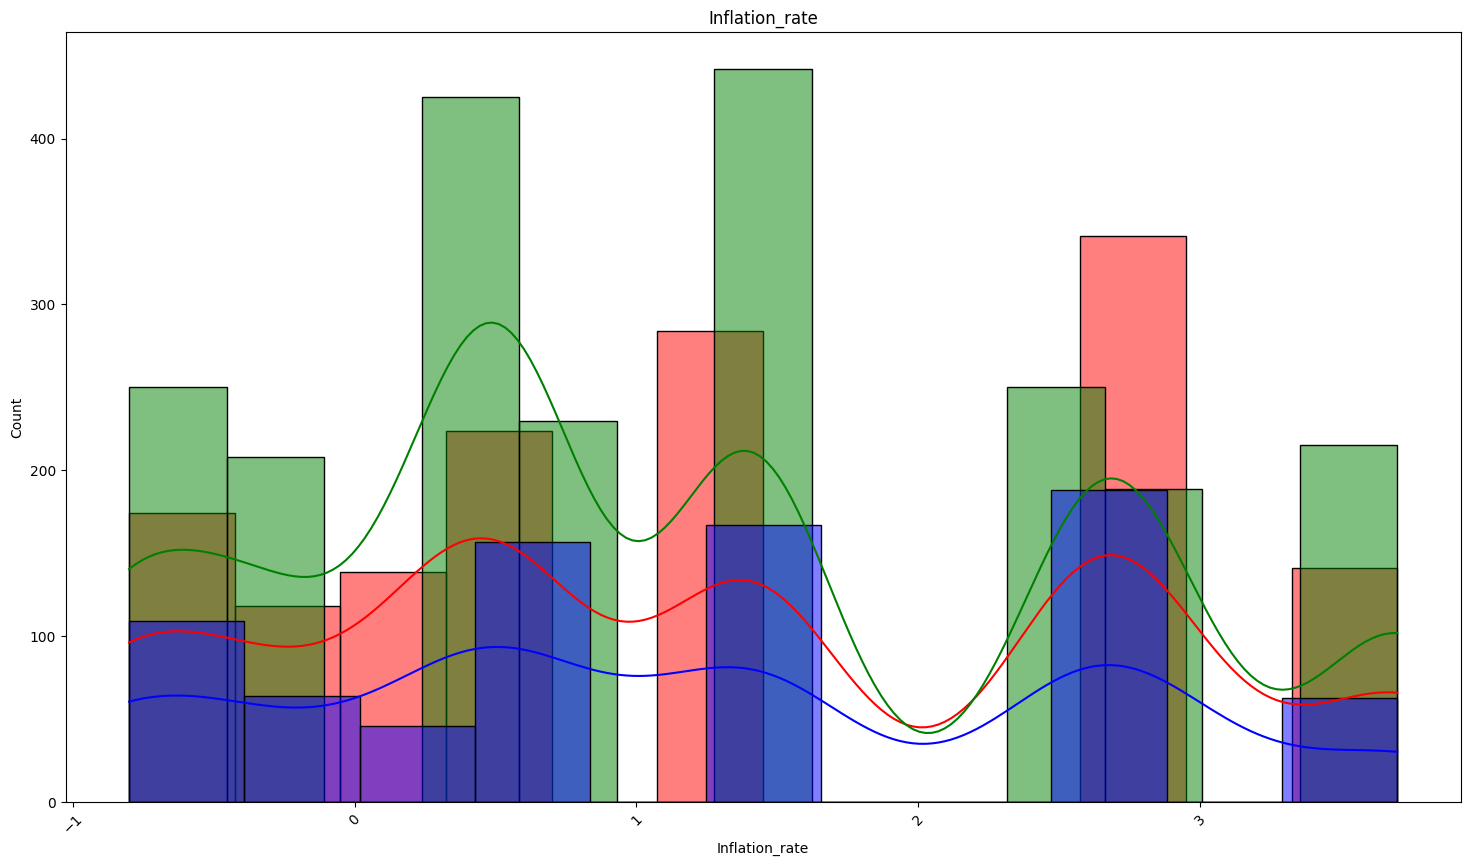

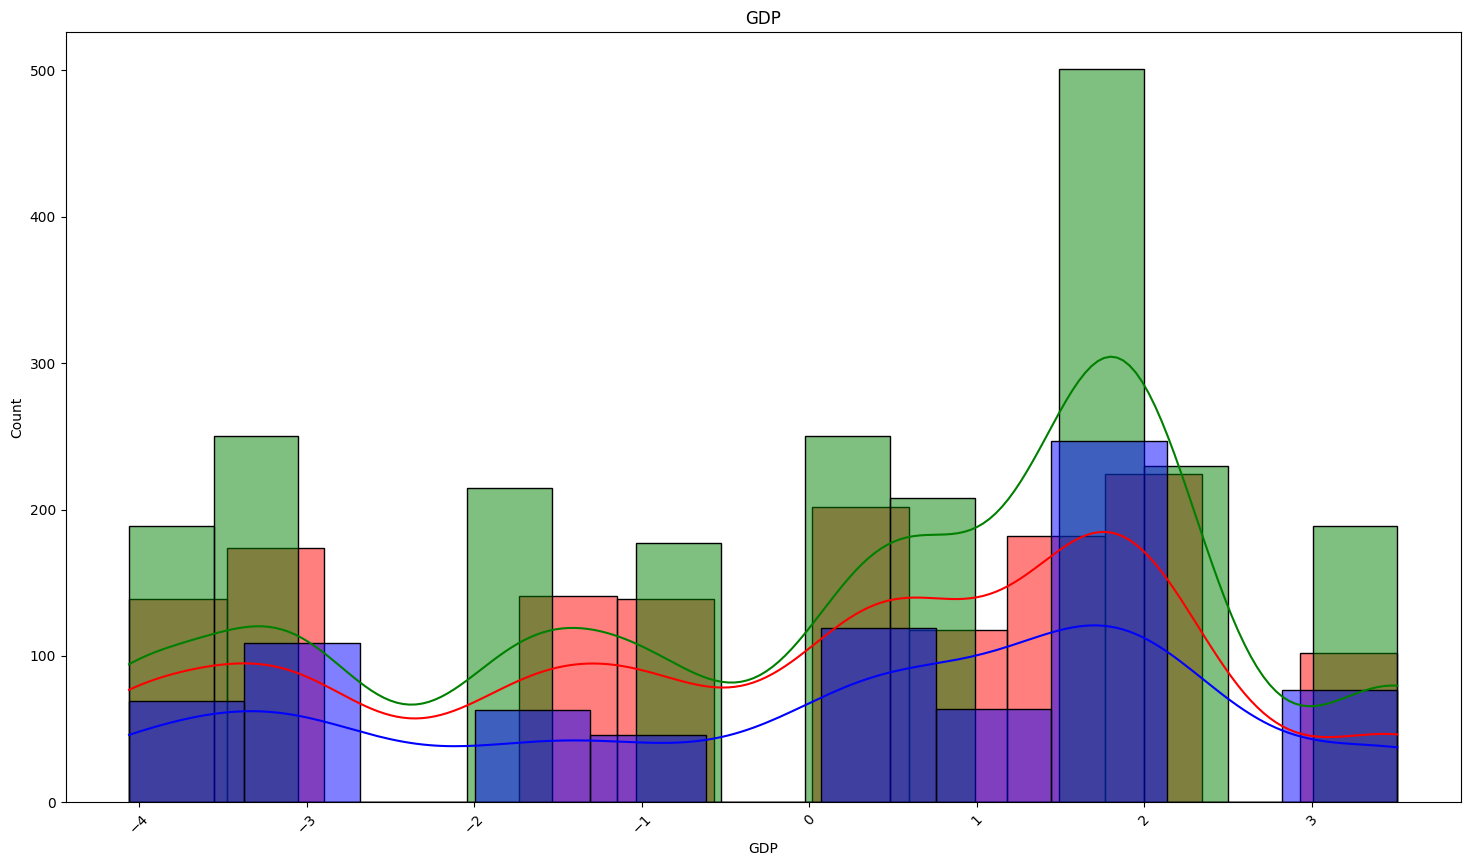

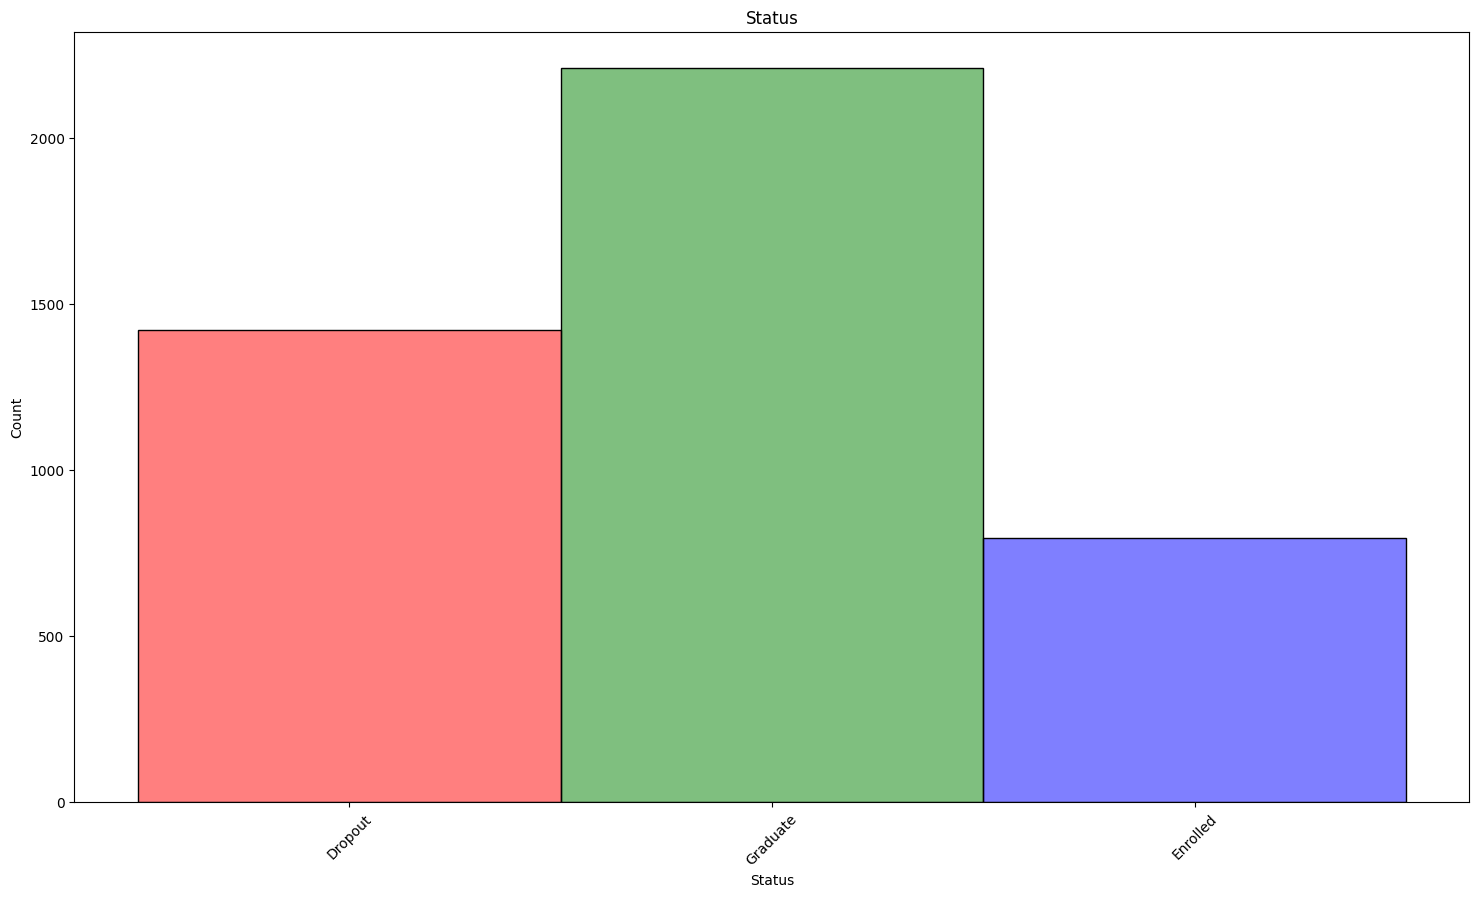

In [54]:
for col in data.columns:
    plt.subplots(figsize=(18,10))
    sns.histplot(data=dropOut, x=col, kde=True, color='red')
    sns.histplot(data=graduate, x=col, kde=True, color='green')
    sns.histplot(data=enrolled, x=col, kde=True, color='blue')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

Dari hasil yang nampak di atas, terdapat perbedaan jumlah pada dataset untuk masing-masing values pada label. Oleh karena itu, perlu adanya proses resampling untuk mengoptimalkan model machine learning

### Saving New Data For Metabase

In [55]:
data.to_pickle('metabase.csv')

## Data Preparation / Preprocessing

### Train Test Split

In [56]:
train_df, test_df = train_test_split(data_ml, test_size=0.2, random_state=42, shuffle=True)
print(train_df.shape)
print(test_df.shape)

(3539, 37)
(885, 37)


### Upsampling Data

In [57]:
minority1 = train_df.loc[train_df['Status']=='Dropout']
minority2 = train_df.loc[train_df['Status']=='Enrolled']
majority = train_df.loc[train_df['Status']=='Graduate']

minority1_upsampled = resample(minority1,
                              replace=True,
                              n_samples=majority.shape[0],
                              random_state=42)

minority2_upsampled = resample(minority2,
                              replace=True,
                              n_samples=majority.shape[0],
                              random_state=42)

train_df = pd.concat([minority1_upsampled, majority, minority2_upsampled])

### Scale the Data

Sebelumnya, dataset dipisah label dan featurenya

In [58]:
X_train = train_df.drop(columns='Status')
y_train = train_df['Status']

X_test = test_df.drop(columns='Status')
y_test = test_df['Status']

Lakukan proses scaling

In [59]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

In [60]:
print(data_ml.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [61]:
column = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Age_at_enrollment', 
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

In [62]:
train_df, test_df = scaling(column, X_train, X_test)

### Encode the Data

In [63]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
joblib.dump(encoder, 'model/encoder_label.joblib')

y_test = encoder.transform(y_test)

### PCA

In [64]:
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)


column = ['Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

train_pca_df = train_df.copy().reset_index(drop=True)
test_pca_df = test_df.copy().reset_index(drop=True)

pca = PCA(n_components=len(column), random_state=123)
pca.fit(train_pca_df[column])
princ_comp = pca.transform(train_pca_df[column])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

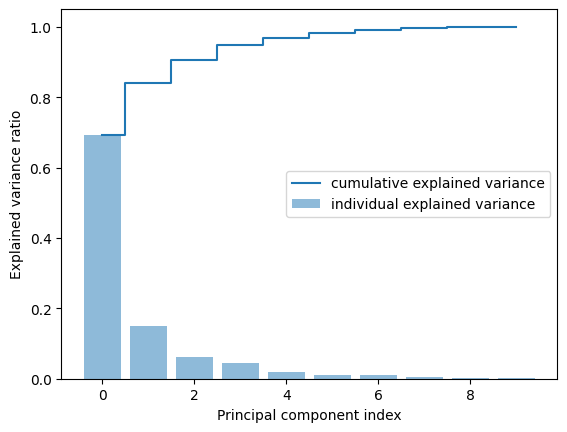

In [65]:
plt.bar(range(len(column)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(column)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [66]:
pca = PCA(n_components=2, random_state=123)
pca.fit(train_pca_df[column])
joblib.dump(pca, "model/pca.joblib")
princ_comp = pca.transform(train_pca_df[column])
train_pca_df[["pc1_1", "pc1_2"]] = pd.DataFrame(princ_comp, columns=["pc1_1", "pc1_2"])
train_pca_df.drop(columns=column, axis=1, inplace=True)
train_pca_df.head()

Marital_status  Application_mode  Application_order    Course  \
0             0.0          0.285714           0.111111  0.013858   
1             0.0          0.732143           0.111111  0.900783   
2             0.0          0.678571           0.111111  0.801466   
3             0.0          0.303571           0.333333  0.967765   
4             0.0          0.107143           0.111111  0.801466   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                0.000000   
1                           1                0.000000   
2                           0                0.000000   
3                           1                0.000000   
4                           0                0.928571   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                      0.431579          0.0               0.880952   
1                      0.368421          0.0               0.047619   
2                      0.473684          0.0               0.857143   
3                      0.252632          0.0               0.880952   
4                      0.263158          0.0               0.857143   

   Fathers_qualification  ...  Scholarship_holder  Age_at_enrollment  \
0               0.860465  ...                   0           0.037736   
1               0.023256  ...                   0           0.358491   
2               0.837209  ...                   0           0.226415   
3               0.860465  ...                   1           0.037736   
4               0.418605  ...                   0           0.358491   

   International  Curricular_units_1st_sem_without_evaluations  \
0              0                                             0   
1              0                                             0   
2              0                                             0   
3              0                                             0   
4              0                                             0   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               15.5   
1                                             0               16.2   
2                                             0               12.4   
3                                             0               12.7   
4                                             0                8.9   

   Inflation_rate   GDP     pc1_1     pc1_2  
0             2.8 -4.06 -0.895336 -0.078264  
1             0.3 -0.92 -0.754951  0.196415  
2             0.5  1.79 -0.344156  0.061967  
3             3.7 -1.70 -0.771891  0.178817  
4             1.4  3.51  0.323779  0.273355  

[5 rows x 28 columns]

In [67]:
test_princ_comp = pca.transform(test_pca_df[column])
test_pca_df[["pc1_1", "pc1_2"]] = pd.DataFrame(test_princ_comp, columns=["pc1_1", "pc1_2"])
test_pca_df.drop(columns=column, axis=1, inplace=True)

### Correlation Graph

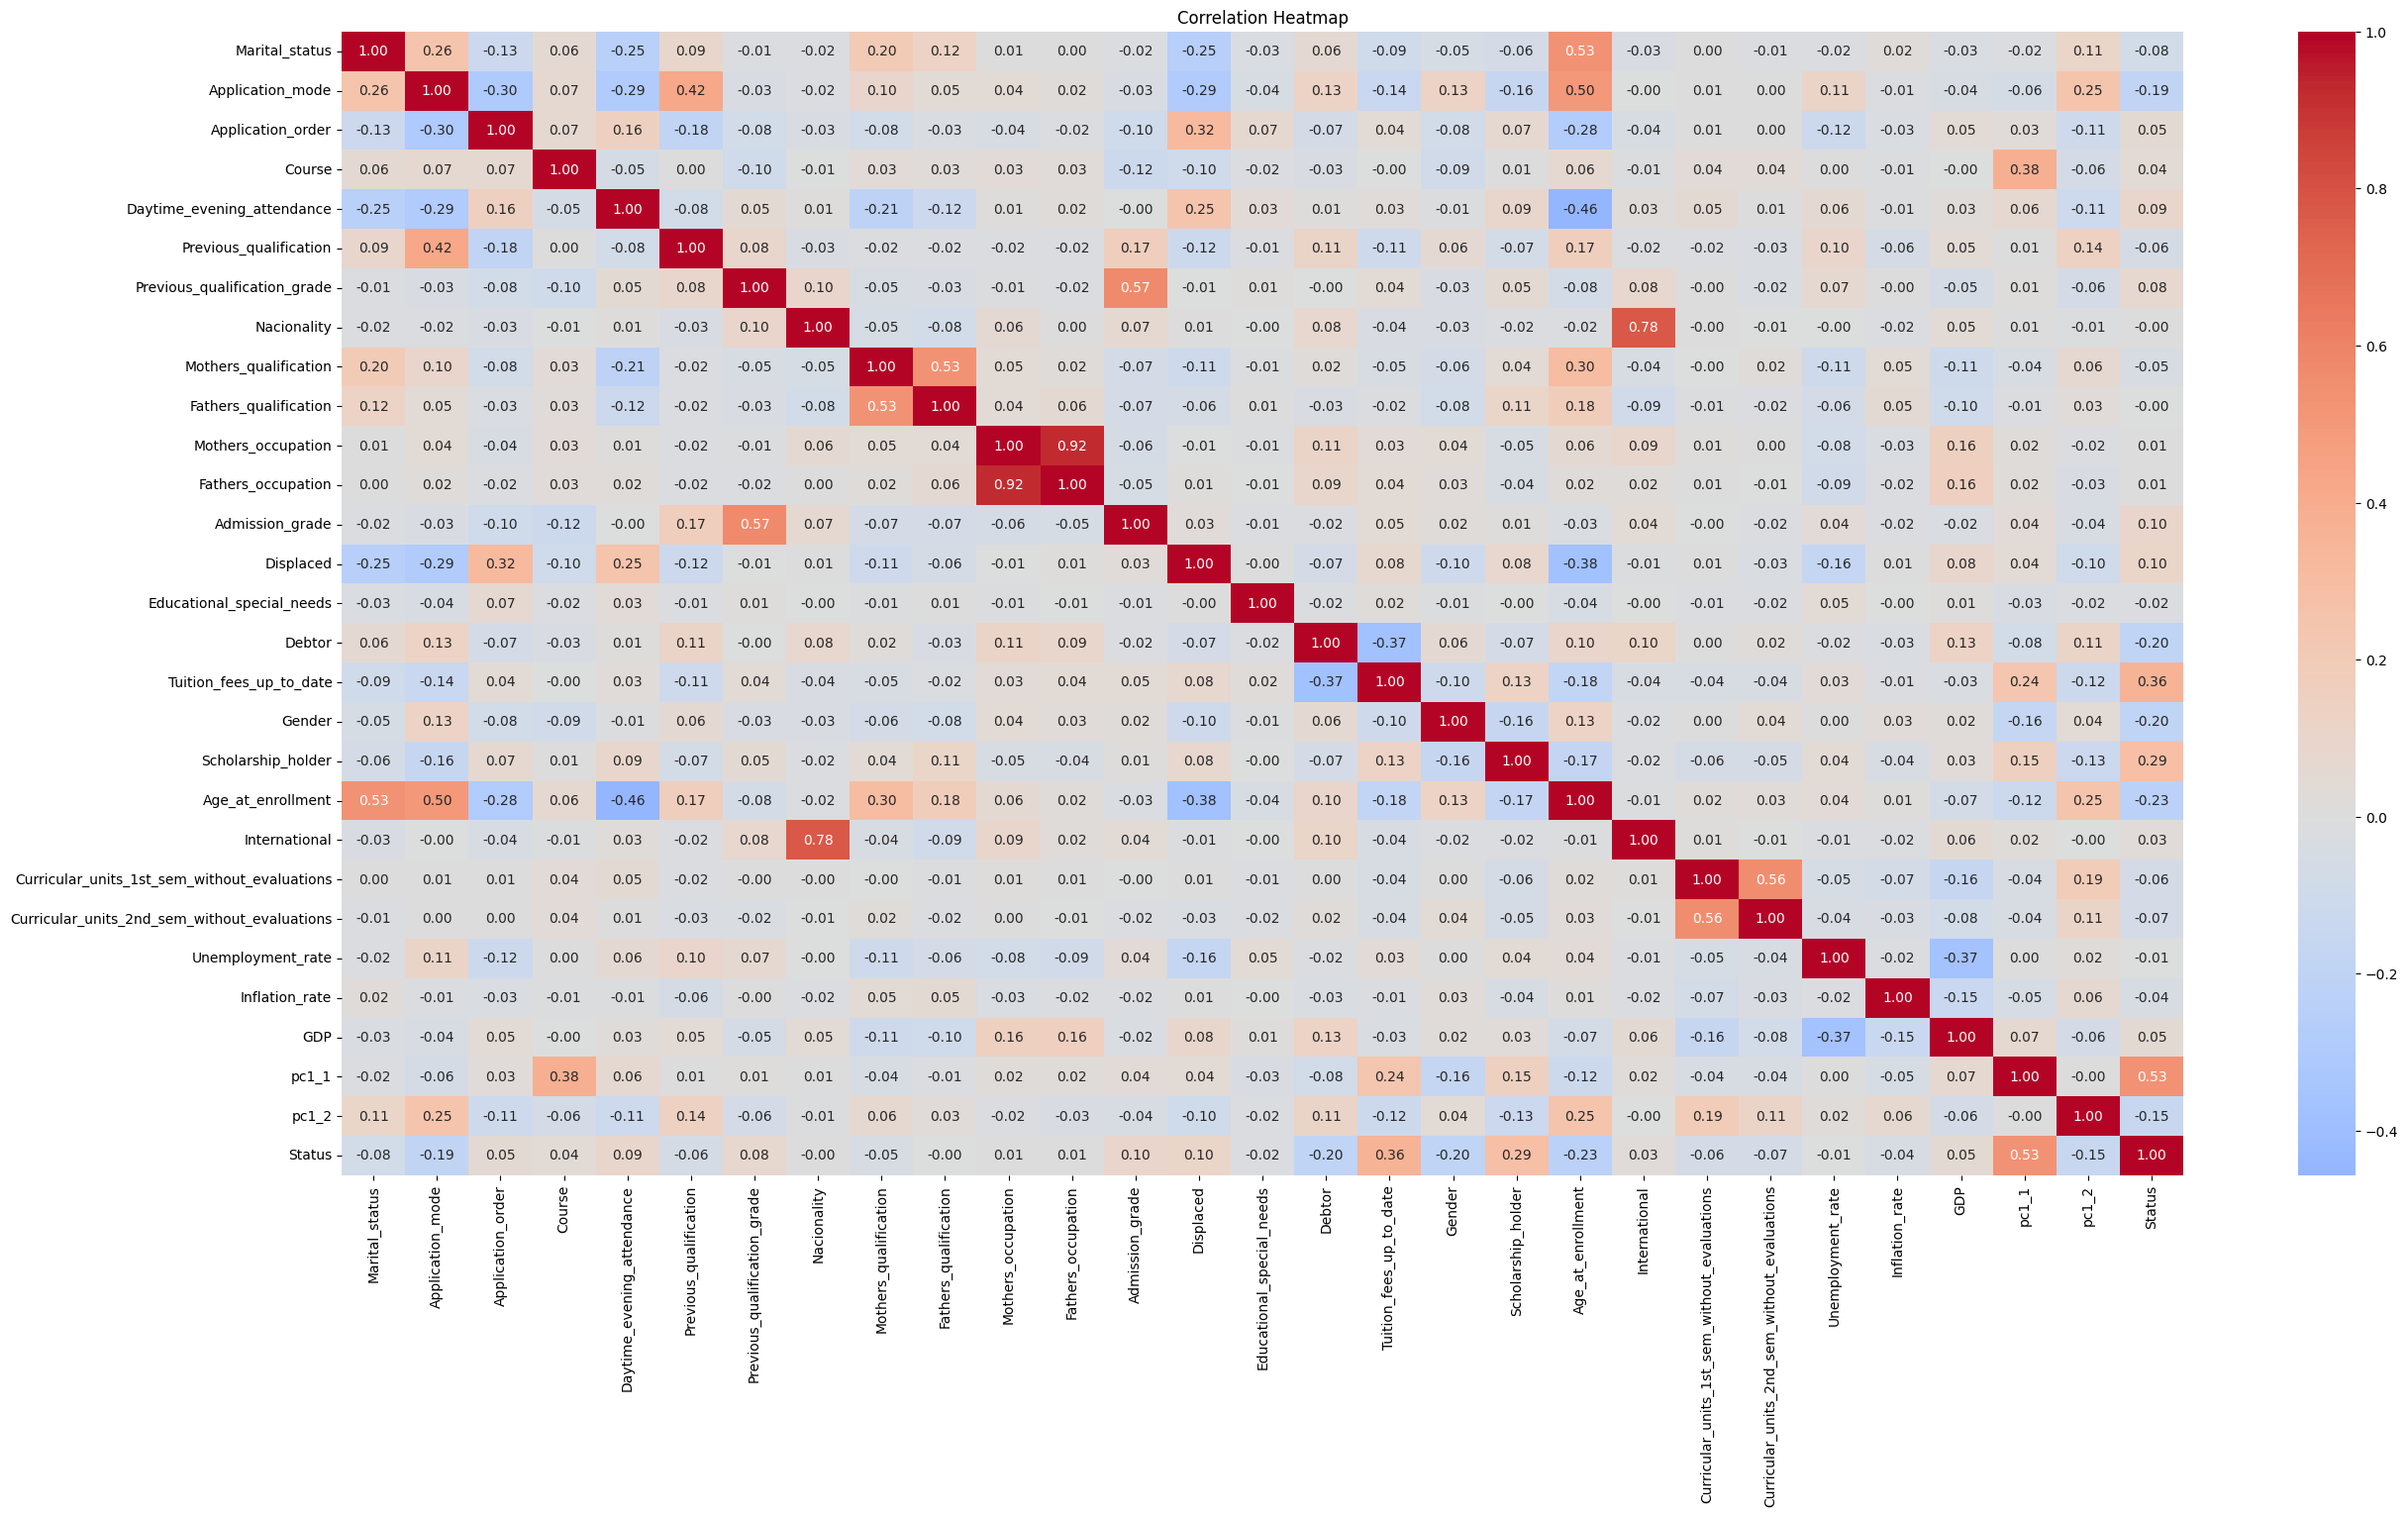

In [68]:
train_pca_df['Status'] = y_train

fig, ax = plt.subplots(figsize=(30,15))
correlation_matrix = train_pca_df.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dari correlation graph, didapatkan beberapa kolom yang tidak berkorelasi, yaitu:
* Nacionality
* Mothers occupation
* Mothers qualification
* Fathers occupation
* Fathers qualification

### Dropping Uncorrelated Columns

In [69]:
train_pca_df = train_pca_df.drop(columns=['Nacionality', 'Mothers_occupation', 'Mothers_qualification', 'Fathers_occupation', 'Fathers_qualification', 'Unemployment_rate', 'Inflation_rate', 'GDP'])
test_pca_df = test_pca_df.drop(columns=['Nacionality', 'Mothers_occupation', 'Mothers_qualification', 'Fathers_occupation', 'Fathers_qualification', 'Unemployment_rate', 'Inflation_rate', 'GDP'])

In [78]:
test_pca_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Admission_grade', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_without_evaluations', 'pc1_1', 'pc1_2'],
      dtype='object')

### New Features and Labels

In [70]:
X_train = train_pca_df.drop(columns='Status').values
X_test = test_pca_df.values

## Modeling

Menggunakan GridSearchCV untuk mencari parameter terbaik model random forest

In [71]:
"""
model = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
CV.fit(X_train, y_train)
"""


"\nmodel = RandomForestClassifier(random_state=123)\n \nparam_grid = { \n    'n_estimators': [200, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [6, 7, 8],\n    'criterion' :['gini', 'entropy']\n}\n \nCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)\nCV.fit(X_train, y_train)\n"

In [72]:
#print('Best parameters: ', CV.best_params_)

Didapatkan best parameter yaitu :
* best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}

In [73]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
joblib.dump(model, 'model/rdf_model.joblib')

['model/rdf_model.joblib']

## Evaluation

Melakukan Prediksi

In [74]:
y_pred = model.predict(X_test)

Evaluasi Confusion Matrix

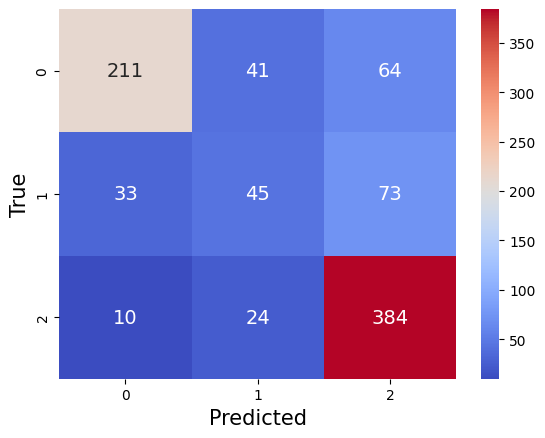

In [75]:
matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
matrix_df = pd.DataFrame(matrix)
sns.heatmap(matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [76]:
print(accuracy_score(y_pred=y_pred, y_true=y_test))

0.7231638418079096
